Collb Link:
https://colab.research.google.com/drive/1StiOctHLXwewa-zWhVFgRQMq1t3U-PaS?usp=sharing

Google doc write up with better layout
https://docs.google.com/document/d/192ji8owzT4E-NNItdKwPigyEss52SI8UjNclhTS0l0k/edit?usp=sharing

(initially wrote on google doc but the layout was changed for some figures after convert into pdf)


# Midterm 


In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [279]:
from google.colab import drive

In [280]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [281]:
df1=pd.read_excel('/content/drive/MyDrive/1340/UN_MigrantStockTotal_2015.xlsx',sheet_name='Table 1', na_values ='..')

In [282]:
df1.drop(df1.index[0:15],inplace=True)
df1.head()
#Problem 1: There are multiple types of data(migrant stock for both sexes, male, and female) in one table
#tidy data principle #4: each table needs to have a singular data type 
#Problem 2: Each row is not a unique observation
#tidy data principle 1: rows are unique observations, each row represents a unique element
#so we need to splict them into three different tables

Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
15          1                                              WORLD        NaN   
16          2                                  Developed regions        (b)   
17          3                                 Developing regions        (c)   
18          4                          Least developed countries        (d)   
19          5  Less developed regions excluding least develop...        NaN   

   Unnamed: 3 Unnamed: 4 Unnamed: 5   Unnamed: 6   Unnamed: 7   Unnamed: 8  \
15        900        NaN  152563212  160801752.0  172703309.0  191269100.0   
16        901        NaN   82378628   92306854.0  103375363.0  117181109.0   
17        902        NaN   70184584   68494898.0   69327946.0   74087991.0   
18        941        NaN   11075966   11711703.0   10077824.0    9809634.0   
19        934        NaN   59105261   56778501.0   59244124.0   64272611.0   

     Unnamed: 9  ...  Unnamed: 13 Unnamed: 14  Unnamed: 15  Unnamed: 16  \
15  221714243.0  ...   87884839.0  97866674.0  114613714.0  126115435.0   
16  132560325.0  ...   50536796.0  57217777.0   64081077.0   67618619.0   
17   89153918.0  ...   37348043.0  40648897.0   50532637.0   58496816.0   
18   10018128.0  ...    5361902.0   5383009.0    5462714.0    6463217.0   
19   79130668.0  ...   31986141.0  35265888.0   45069923.0   52033599.0   

    Unnamed: 17  Unnamed: 18  Unnamed: 19 Unnamed: 20  Unnamed: 21  \
15     74815702   79064275.0   84818470.0  93402426.0  107100529.0   
16     42115231   47214055.0   52838567.0  59963332.0   68479248.0   
17     32700471   31850220.0   31979903.0  33439094.0   38621281.0   
18      5236216    5573685.0    4721920.0   4432371.0    4560536.0   
19     27464255   26276535.0   27257983.0  29006723.0   34060745.0   

    Unnamed: 22  
15  117584801.0  
16   72863336.0  
17   44721465.0  
18    5493028.0  
19   39228437.0  

[5 rows x 23 columns]

In [283]:
column1ist = ['Major area, region, country or area of destination', 'Notes','Country Code','Type of data(a)','1990','1995','2000','2005','2010','2015']

#Separate the main table into three sections, create the first table for "both sexes" category from 1995-2015
table1_both_sexes = df1.iloc[:,1:11]
#rename the column
table1_both_sexes.columns = column1ist



In [284]:
table1_both_sexes.head(10)

Major area, region, country or area of destination Notes Country Code  \
15                                              WORLD   NaN          900   
16                                  Developed regions   (b)          901   
17                                 Developing regions   (c)          902   
18                          Least developed countries   (d)          941   
19  Less developed regions excluding least develop...   NaN          934   
20                                 Sub-Saharan Africa   (e)          947   
21                                             Africa   NaN          903   
22                                     Eastern Africa   NaN          910   
23                                            Burundi   NaN          108   
24                                            Comoros   NaN          174   

   Type of data(a)       1990         1995         2000         2005  \
15             NaN  152563212  160801752.0  172703309.0  191269100.0   
16             NaN   82378628   92306854.0  103375363.0  117181109.0   
17             NaN   70184584   68494898.0   69327946.0   74087991.0   
18             NaN   11075966   11711703.0   10077824.0    9809634.0   
19             NaN   59105261   56778501.0   59244124.0   64272611.0   
20             NaN   14690319   15324570.0   13716539.0   13951086.0   
21             NaN   15690623   16352814.0   14800306.0   15191146.0   
22             NaN    5964031    5022742.0    4844795.0    4745792.0   
23             B R     333110     254853.0     125628.0     172874.0   
24               B      14079      13939.0      13799.0      13209.0   

           2010         2015  
15  221714243.0  243700236.0  
16  132560325.0  140481955.0  
17   89153918.0  103218281.0  
18   10018128.0   11951316.0  
19   79130668.0   91262036.0  
20   15496764.0   18993986.0  
21   16840014.0   20649557.0  
22    4657063.0    6129113.0  
23     235259.0     286810.0  
24      12618.0      12555.0

In [285]:
#Problem3: Column names are values(1990,1995,2000...), not variable names
#Apply tidy data principle: Column names need to be informative, variable names and not values
#Problem 3: Variables are stored in columns, not cells
#tidy data principle 3, which is variables need to be in cells, not rows and columns
#Melt the "both sexes" section
id_vars1 = ['Major area, region, country or area of destination','Notes','Country Code','Type of data(a)']
var_name1 = 'Year'
tidy1_both_sexes =table1_both_sexes.melt(id_vars=id_vars1, var_name=["Year"],value_name="International migrant stock at mid-year (both sexes)")
tidy1_both_sexes.head(10)

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   
5                                 Sub-Saharan Africa   (e)          947   
6                                             Africa   NaN          903   
7                                     Eastern Africa   NaN          910   
8                                            Burundi   NaN          108   
9                                            Comoros   NaN          174   

  Type of data(a)  Year International migrant stock at mid-year (both sexes)  
0             NaN  1990                                          152563212    
1             NaN  1990                                           82378628    
2             NaN  1990                                           70184584    
3             NaN  1990                                           11075966    
4             NaN  1990                                           59105261    
5             NaN  1990                                           14690319    
6             NaN  1990                                           15690623    
7             NaN  1990                                            5964031    
8             B R  1990                                             333110    
9               B  1990                                              14079

In [286]:
#Separate the table into three sections, now create the second table for "male" category from 1995-2015
table1_male = df1.iloc[:,[1,2,3,4,11,12,13,14,15,16]]
#rename the column
table1_male.columns = column1ist

table1_male.head()

Major area, region, country or area of destination Notes Country Code  \
15                                              WORLD   NaN          900   
16                                  Developed regions   (b)          901   
17                                 Developing regions   (c)          902   
18                          Least developed countries   (d)          941   
19  Less developed regions excluding least develop...   NaN          934   

   Type of data(a)      1990        1995        2000        2005         2010  \
15             NaN  77747510  81737477.0  87884839.0  97866674.0  114613714.0   
16             NaN  40263397  45092799.0  50536796.0  57217777.0   64081077.0   
17             NaN  37484113  36644678.0  37348043.0  40648897.0   50532637.0   
18             NaN   5843107   6142712.0   5361902.0   5383009.0    5462714.0   
19             NaN  31641006  30501966.0  31986141.0  35265888.0   45069923.0   

           2015  
15  126115435.0  
16   67618619.0  
17   58496816.0  
18    6463217.0  
19   52033599.0

In [287]:
#Melt the male section
id_vars1 = ['Major area, region, country or area of destination','Notes','Country Code','Type of data(a)']
var_name1 = 'Year'
tidy1_male = table1_male.melt(id_vars=id_vars1, var_name=["Year"],value_name="International migrant stock at mid-year(male)")

tidy1_male.head(10)

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   
5                                 Sub-Saharan Africa   (e)          947   
6                                             Africa   NaN          903   
7                                     Eastern Africa   NaN          910   
8                                            Burundi   NaN          108   
9                                            Comoros   NaN          174   

  Type of data(a)  Year International migrant stock at mid-year(male)  
0             NaN  1990                                      77747510  
1             NaN  1990                                      40263397  
2             NaN  1990                                      37484113  
3             NaN  1990                                       5843107  
4             NaN  1990                                      31641006  
5             NaN  1990                                       7745306  
6             NaN  1990                                       8279564  
7             NaN  1990                                       3071189  
8             B R  1990                                        163267  
9               B  1990                                          6717

In [288]:
#Separate the table into three sections, now create the third table for "female" category from 1995-2015
table1_female = df1.iloc[:,[1,2,3,4,17,18,19,20,21,22]]
#rename the column
table1_female.columns = column1ist

table1_female.head()

Major area, region, country or area of destination Notes Country Code  \
15                                              WORLD   NaN          900   
16                                  Developed regions   (b)          901   
17                                 Developing regions   (c)          902   
18                          Least developed countries   (d)          941   
19  Less developed regions excluding least develop...   NaN          934   

   Type of data(a)      1990        1995        2000        2005         2010  \
15             NaN  74815702  79064275.0  84818470.0  93402426.0  107100529.0   
16             NaN  42115231  47214055.0  52838567.0  59963332.0   68479248.0   
17             NaN  32700471  31850220.0  31979903.0  33439094.0   38621281.0   
18             NaN   5236216   5573685.0   4721920.0   4432371.0    4560536.0   
19             NaN  27464255  26276535.0  27257983.0  29006723.0   34060745.0   

           2015  
15  117584801.0  
16   72863336.0  
17   44721465.0  
18    5493028.0  
19   39228437.0

In [289]:
#Melt the female section
id_vars1 = ['Major area, region, country or area of destination','Notes','Country Code','Type of data(a)']
var_name1 = 'Year'
tidy1_female = table1_female.melt(id_vars=id_vars1, var_name=["Year"],value_name="International migrant stock at mid-year(female)")

tidy1_female.head(10)

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   
5                                 Sub-Saharan Africa   (e)          947   
6                                             Africa   NaN          903   
7                                     Eastern Africa   NaN          910   
8                                            Burundi   NaN          108   
9                                            Comoros   NaN          174   

  Type of data(a)  Year International migrant stock at mid-year(female)  
0             NaN  1990                                        74815702  
1             NaN  1990                                        42115231  
2             NaN  1990                                        32700471  
3             NaN  1990                                         5236216  
4             NaN  1990                                        27464255  
5             NaN  1990                                         6945013  
6             NaN  1990                                         7411059  
7             NaN  1990                                         2892842  
8             B R  1990                                          169843  
9               B  1990                                            7362

In [290]:
#Problem 5: One type of observational unit in different tables.
#We can consider female/male as the same data type,which is different from both sexes(the sum),
  #so according to principle 5, a single observational units must be in 1 table
  #we can combine the data type with the same observational unit into the same table
#Merge male and female table into a new table
id_vars2 = ['Major area, region, country or area of destination','Notes','Country Code','Type of data(a)','Year']
tidy_mf1=tidy1_male.merge(tidy1_female, on=id_vars2 )

tidy_mf1.head(10)

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   
5                                 Sub-Saharan Africa   (e)          947   
6                                             Africa   NaN          903   
7                                     Eastern Africa   NaN          910   
8                                            Burundi   NaN          108   
9                                            Comoros   NaN          174   

  Type of data(a)  Year International migrant stock at mid-year(male)  \
0             NaN  1990                                      77747510   
1             NaN  1990                                      40263397   
2             NaN  1990                                      37484113   
3             NaN  1990                                       5843107   
4             NaN  1990                                      31641006   
5             NaN  1990                                       7745306   
6             NaN  1990                                       8279564   
7             NaN  1990                                       3071189   
8             B R  1990                                        163267   
9               B  1990                                          6717   

  International migrant stock at mid-year(female)  
0                                        74815702  
1                                        42115231  
2                                        32700471  
3                                         5236216  
4                                        27464255  
5                                         6945013  
6                                         7411059  
7                                         2892842  
8                                          169843  
9                                            7362

In [291]:

tidy_mf1.rename(columns={"International migrant stock at mid-year (male)": "Male", "International migrant stock at mid-year (female)": "Female"},inplace=True)
tidy_mf1.head()

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   

  Type of data(a)  Year International migrant stock at mid-year(male)  \
0             NaN  1990                                      77747510   
1             NaN  1990                                      40263397   
2             NaN  1990                                      37484113   
3             NaN  1990                                       5843107   
4             NaN  1990                                      31641006   

  International migrant stock at mid-year(female)  
0                                        74815702  
1                                        42115231  
2                                        32700471  
3                                         5236216  
4                                        27464255

In [292]:
#Problem 6: there are two oberservation in one row
#Tidy data principle: Each row is a unique observation
id_vars2 = ['Major area, region, country or area of destination','Notes','Country Code','Type of data(a)','Year']
tidy_gender1=tidy_mf1.melt(id_vars=id_vars2, var_name=["Sex"],value_name="International migrant stock at mid-year")
#shorten the Gender name
tidy_gender1.replace(to_replace =["International migrant stock at mid-year(female)","International migrant stock at mid-year(male)"],
                     value =["Female","Male"], inplace=True)
tidy_gender1.head(10)

Major area, region, country or area of destination Notes  Country Code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   
5                                 Sub-Saharan Africa   (e)           947   
6                                             Africa   NaN           903   
7                                     Eastern Africa   NaN           910   
8                                            Burundi   NaN           108   
9                                            Comoros   NaN           174   

  Type of data(a)  Year   Sex  International migrant stock at mid-year  
0             NaN  1990  Male                               77747510.0  
1             NaN  1990  Male                               40263397.0  
2             NaN  1990  Male                               37484113.0  
3             NaN  1990  Male                                5843107.0  
4             NaN  1990  Male                               31641006.0  
5             NaN  1990  Male                                7745306.0  
6             NaN  1990  Male                                8279564.0  
7             NaN  1990  Male                                3071189.0  
8             B R  1990  Male                                 163267.0  
9               B  1990  Male                                   6717.0

In [293]:
#Problem 7: there are multiple variables(major area, region, country) stored in 1 column
#tidy data principle #2: each column needs to consist of one and only one variable
#so we need to split the table into three sections
tidy_gender1.head(10)

Major area, region, country or area of destination Notes  Country Code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   
5                                 Sub-Saharan Africa   (e)           947   
6                                             Africa   NaN           903   
7                                     Eastern Africa   NaN           910   
8                                            Burundi   NaN           108   
9                                            Comoros   NaN           174   

  Type of data(a)  Year   Sex  International migrant stock at mid-year  
0             NaN  1990  Male                               77747510.0  
1             NaN  1990  Male                               40263397.0  
2             NaN  1990  Male                               37484113.0  
3             NaN  1990  Male                                5843107.0  
4             NaN  1990  Male                               31641006.0  
5             NaN  1990  Male                                7745306.0  
6             NaN  1990  Male                                8279564.0  
7             NaN  1990  Male                                3071189.0  
8             B R  1990  Male                                 163267.0  
9               B  1990  Male                                   6717.0

In [294]:
df_an=pd.read_excel('/content/drive/MyDrive/1340/UN_MigrantStockTotal_2015.xlsx',sheet_name='ANNEX')

In [295]:
df_an.drop(df_an.index[0:14],inplace=True)
column_an=['Country code','Country or area','Sort order','Major area','Code','Sort order', 'Region','Code','Sort order','Developed region','Least developed country	Sub-Saharan ','Sub-Saharan Africa']
df_an.columns=column_an
df_an.head()

Country code Country or area Sort order Major area Code Sort order  \
14            4     Afghanistan         99       Asia  935         71   
15            8         Albania        154     Europe  908        127   
16           12         Algeria         40     Africa  903          7   
17           16  American Samoa        257    Oceania  909        238   
18           20         Andorra        155     Europe  908        127   

             Region  Code Sort order Developed region  \
14    Southern Asia  5501         98               No   
15  Southern Europe   925        153              Yes   
16  Northern Africa   912         39               No   
17        Polynesia   957        256               No   
18  Southern Europe   925        153              Yes   

   Least developed country\tSub-Saharan  Sub-Saharan Africa  
14                                   Yes                 No  
15                                    No                 No  
16                                    No                 No  
17                                    No                 No  
18                                    No                 No

In [296]:
#orgnize all country names
country=df_an['Country or area']
#orgnize all major area names
maj_area=df_an['Major area']
maj_area.drop_duplicates(keep='first',inplace=True)
#orgnize all region names
region=df_an['Region']
region.drop_duplicates(keep='first',inplace=True)


/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:2136: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [297]:
#define selectrow function for future use
def selectrow(table,column_name,row_name):
  new_tabl=table[table[column_name].isin(row_name)]
  return new_tabl

In [298]:
#The first section, the international migrants stock at mid-year by Gender(male/female) in different countries
tidy_gender_country=selectrow(tidy_gender1,column_name="Major area, region, country or area of destination", row_name=country)
tidy_gender_country1=tidy_gender_country.rename(columns={"Major area, region, country or area of destination": "Country"}, inplace=True)
tidy_gender_country.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Notes  Country Code Type of data(a)  Year   Sex  \
8      Burundi   NaN           108             B R  1990  Male   
9      Comoros   NaN           174               B  1990  Male   
10    Djibouti   NaN           262             B R  1990  Male   
11     Eritrea   NaN           232               I  1990  Male   
12    Ethiopia   NaN           231             B R  1990  Male   
13       Kenya   NaN           404             B R  1990  Male   
14  Madagascar   NaN           450               C  1990  Male   
15      Malawi   NaN           454             B R  1990  Male   
16   Mauritius   (1)           480               C  1990  Male   
17     Mayotte   NaN           175               B  1990  Male   

    International migrant stock at mid-year  
8                                  163267.0  
9                                    6717.0  
10                                  64242.0  
11                                   6228.0  
12                                 607284.0  
13                                 160852.0  
14                                  13348.0  
15                                 546520.0  
16                                   1763.0  
17                                   8780.0

In [299]:
#Problem: the index section needs to be reset 
#Define the reset index function for future use
def re_index(table):
  table=table.reset_index()
  table.index=table.index+1
  table=table.drop(columns=['index'])
  return table

In [300]:
tidy_gender_country=re_index(tidy_gender_country)
tidy_gender_country.head(10)
#Drop the row if the value column has missing data
tidy_gender_country1 = tidy_gender_country.dropna(subset=["International migrant stock at mid-year"])
#Now the first section is tidy:
  #columns are unique measurements
  #Rows that are unique observations
  #rows*columns observation unit 
tidy_gender_country1.head(10)

Country Notes  Country Code Type of data(a)  Year   Sex  \
1      Burundi   NaN           108             B R  1990  Male   
2      Comoros   NaN           174               B  1990  Male   
3     Djibouti   NaN           262             B R  1990  Male   
4      Eritrea   NaN           232               I  1990  Male   
5     Ethiopia   NaN           231             B R  1990  Male   
6        Kenya   NaN           404             B R  1990  Male   
7   Madagascar   NaN           450               C  1990  Male   
8       Malawi   NaN           454             B R  1990  Male   
9    Mauritius   (1)           480               C  1990  Male   
10     Mayotte   NaN           175               B  1990  Male   

    International migrant stock at mid-year  
1                                  163267.0  
2                                    6717.0  
3                                   64242.0  
4                                    6228.0  
5                                  607284.0  
6                                  160852.0  
7                                   13348.0  
8                                  546520.0  
9                                    1763.0  
10                                   8780.0

In [301]:
#Follow the same step for the second section, the international migrants stock at mid-year by Gender(male/female) in different major areas
tidy_gender_maj_area=selectrow(tidy_gender1,column_name="Major area, region, country or area of destination", row_name=maj_area)
tidy_gender_maj_area1=tidy_gender_maj_area.rename(columns={"Major area, region, country or area of destination": "Major Area"}, inplace=True)
tidy_gender_maj_area=re_index(tidy_gender_maj_area)
#Drop missing data 
tidy_gender_maj_area1 = tidy_gender_maj_area.dropna(subset=["International migrant stock at mid-year"])
#Drop type of data for major area
tidy_gender_maj_area1=tidy_gender_maj_area1.drop(columns=['Type of data(a)'])
tidy_gender_maj_area1.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Major Area Notes  Country Code  Year   Sex  \
1                            Africa   NaN           903  1990  Male   
2                              Asia   NaN           935  1990  Male   
3                            Europe   NaN           908  1990  Male   
4   Latin America and the Caribbean   NaN           904  1990  Male   
5                  Northern America   NaN           905  1990  Male   
6                           Oceania   NaN           909  1990  Male   
7                            Africa   NaN           903  1995  Male   
8                              Asia   NaN           935  1995  Male   
9                            Europe   NaN           908  1995  Male   
10  Latin America and the Caribbean   NaN           904  1995  Male   

    International migrant stock at mid-year  
1                                 8279564.0  
2                                26011875.0  
3                                23946673.0  
4                                 3597037.0  
5                                13497319.0  
6                                 2415042.0  
7                                 8616931.0  
8                                25197522.0  
9                                25635806.0  
10                                3349769.0

In [302]:
#The third section, the international migrants stock at mid-year by Gender(male/female) in different regions
tidy_gender_region=selectrow(tidy_gender1,column_name="Major area, region, country or area of destination", row_name=region)
tidy_gender_region1=tidy_gender_region.rename(columns={"Major area, region, country or area of destination": "Region"}, inplace=True)
tidy_gender_region=re_index(tidy_gender_region)
tidy_gender_region1 = tidy_gender_region.dropna(subset=["International migrant stock at mid-year"])
#Drop type of data for region
tidy_gender_region1=tidy_gender_region1.drop(columns=['Type of data(a)'])
tidy_gender_region1.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Region Notes  Country Code  Year   Sex  \
1       Eastern Africa   NaN           910  1990  Male   
2        Middle Africa   NaN           911  1990  Male   
3      Northern Africa   NaN           912  1990  Male   
4      Southern Africa   NaN           913  1990  Male   
5       Western Africa   NaN           914  1990  Male   
6         Central Asia   NaN          5500  1990  Male   
7         Eastern Asia   NaN           906  1990  Male   
8   South-Eastern Asia   NaN           920  1990  Male   
9        Southern Asia   NaN          5501  1990  Male   
10        Western Asia   NaN           922  1990  Male   

    International migrant stock at mid-year  
1                                 3071189.0  
2                                  744494.0  
3                                 1230643.0  
4                                  840899.0  
5                                 2392339.0  
6                                 2972500.0  
7                                 2005886.0  
8                                 1511104.0  
9                                10601061.0  
10                                8921324.0

In [303]:
#After tidy data for Male and Female data, we need to go back and proceed the same steps for the both sexes section
tidy1_both_sexes.head(10)

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   
5                                 Sub-Saharan Africa   (e)          947   
6                                             Africa   NaN          903   
7                                     Eastern Africa   NaN          910   
8                                            Burundi   NaN          108   
9                                            Comoros   NaN          174   

  Type of data(a)  Year International migrant stock at mid-year (both sexes)  
0             NaN  1990                                          152563212    
1             NaN  1990                                           82378628    
2             NaN  1990                                           70184584    
3             NaN  1990                                           11075966    
4             NaN  1990                                           59105261    
5             NaN  1990                                           14690319    
6             NaN  1990                                           15690623    
7             NaN  1990                                            5964031    
8             B R  1990                                             333110    
9               B  1990                                              14079

In [304]:
#The first section, the international migrants stock at mid-year for both sexes in different countries
tidy_both_country=selectrow(tidy1_both_sexes,column_name="Major area, region, country or area of destination", row_name=country)
tidy_both_country1=tidy_both_country.rename(columns={'Major area, region, country or area of destination': 'Country'}, inplace=True)
tidy_both_country=re_index(tidy_both_country)
#drop the row if the value column has missing value
tidy_both_country1 = tidy_both_country.dropna(subset=["International migrant stock at mid-year (both sexes)"])
tidy_both_country1.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Notes Country Code Type of data(a)  Year  \
1      Burundi   NaN          108             B R  1990   
2      Comoros   NaN          174               B  1990   
3     Djibouti   NaN          262             B R  1990   
4      Eritrea   NaN          232               I  1990   
5     Ethiopia   NaN          231             B R  1990   
6        Kenya   NaN          404             B R  1990   
7   Madagascar   NaN          450               C  1990   
8       Malawi   NaN          454             B R  1990   
9    Mauritius   (1)          480               C  1990   
10     Mayotte   NaN          175               B  1990   

   International migrant stock at mid-year (both sexes)  
1                                              333110    
2                                               14079    
3                                              122221    
4                                               11848    
5                                             1155390    
6                                              297292    
7                                               23917    
8                                             1127724    
9                                                3613    
10                                              15229

In [305]:
#The second section, the international migrants stock at mid-year for both sexes in different major areas
tidy_both_area=selectrow(tidy1_both_sexes,column_name="Major area, region, country or area of destination", row_name=maj_area)
tidy_both_area.rename(columns={"Major area, region, country or area of destination": "Major Area"}, inplace=True)
tidy_both_area=re_index(tidy_both_area)
tidy_both_area1 = tidy_both_area.dropna(subset=["International migrant stock at mid-year (both sexes)"])
#Drop type of data for major area
tidy_both_area1=tidy_both_area1.drop(columns=['Type of data(a)'])
tidy_both_area1.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Major Area Notes Country Code  Year  \
1                            Africa   NaN          903  1990   
2                              Asia   NaN          935  1990   
3                            Europe   NaN          908  1990   
4   Latin America and the Caribbean   NaN          904  1990   
5                  Northern America   NaN          905  1990   
6                           Oceania   NaN          909  1990   
7                            Africa   NaN          903  1995   
8                              Asia   NaN          935  1995   
9                            Europe   NaN          908  1995   
10  Latin America and the Caribbean   NaN          904  1995   

   International migrant stock at mid-year (both sexes)  
1                                            15690623    
2                                            48142261    
3                                            49219200    
4                                             7169728    
5                                            27610542    
6                                             4730858    
7                                          16352814.0    
8                                          46548225.0    
9                                          52842663.0    
10                                          6694640.0

In [306]:
#The third section, the international migrants stock at mid-year by Gender(male/female) in different regions
tidy_both_region=selectrow(tidy1_both_sexes,column_name="Major area, region, country or area of destination", row_name=region)
tidy_both_region1=tidy_both_region.rename(columns={"Major area, region, country or area of destination": "Region"}, inplace=True)
tidy_both_region=re_index(tidy_both_region)
tidy_both_region1 = tidy_both_region.dropna(subset=["International migrant stock at mid-year (both sexes)"])
#Drop type of data for major area
tidy_both_region1=tidy_both_region1.drop(columns=['Type of data(a)'])
tidy_both_region1.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Region Notes Country Code  Year  \
1       Eastern Africa   NaN          910  1990   
2        Middle Africa   NaN          911  1990   
3      Northern Africa   NaN          912  1990   
4      Southern Africa   NaN          913  1990   
5       Western Africa   NaN          914  1990   
6         Central Asia   NaN         5500  1990   
7         Eastern Asia   NaN          906  1990   
8   South-Eastern Asia   NaN          920  1990   
9        Southern Asia   NaN         5501  1990   
10        Western Asia   NaN          922  1990   

   International migrant stock at mid-year (both sexes)  
1                                             5964031    
2                                             1460530    
3                                             2403200    
4                                             1392359    
5                                             4470503    
6                                             6630683    
7                                             3959345    
8                                             2876616    
9                                            19436343    
10                                           15239274

In [307]:
df2=pd.read_excel('/content/drive/MyDrive/1340/UN_MigrantStockTotal_2015.xlsx',sheet_name='Table 2',na_values ='..')

In [308]:
df2.drop(df2.index[0:15],inplace=True)
df2.head()

Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
15          1                                              WORLD        NaN   
16          2                                  Developed regions        (b)   
17          3                                 Developing regions        (c)   
18          4                          Least developed countries        (d)   
19          5  Less developed regions excluding least develop...        NaN   

   Unnamed: 3   Unnamed: 4   Unnamed: 5   Unnamed: 6   Unnamed: 7  \
15        900  5309667.699  5735123.084  6126622.121  6519635.850   
16        901  1144463.062  1169761.211  1188811.731  1208919.509   
17        902  4165204.637  4565361.873  4937810.390  5310716.341   
18        941   510057.629   585189.354   664386.087   752804.951   
19        934  3655147.008  3980172.519  4273424.303  4557911.390   

     Unnamed: 8   Unnamed: 9  ...  Unnamed: 12  Unnamed: 13  Unnamed: 14  \
15  6929725.043  7349472.099  ...  3084537.662  3285082.249  3493956.904   
16  1233375.711  1251351.086  ...   578010.218   587962.213   599955.476   
17  5696349.332  6098121.013  ...  2506527.444  2697120.036  2894001.428   
18   847254.847   954157.804  ...   331482.475   375757.715   422397.532   
19  4849094.485  5143963.209  ...  2175044.969  2321362.321  2471603.896   

    Unnamed: 15  Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  \
15  3707205.753  2639243.998  2848487.191  3042084.459  3234553.601   
16   609297.148   589207.436   601492.755   610801.513   620957.296   
17  3097908.605  2050036.562  2246994.436  2431282.946  2613596.305   
18   476031.179   256015.073   293162.612   332903.612   377047.236   
19  2621877.426  1794021.489  1953831.824  2098379.334  2236549.069   

    Unnamed: 20  Unnamed: 21  
15  3435768.139  3642266.346  
16   633420.235   642053.938  
17  2802347.904  3000212.408  
18   424857.315   478126.625  
19  2377490.589  2522085.783  

[5 rows x 22 columns]

In [309]:
column1ist2 = ['Major area, region, country or area of destination', 'Notes','Country Code','1990','1995','2000','2005','2010','2015']
#Separate the table into three sections, create the first table for "both sexes" category from 1995-2015
table2_both_sexes = df2.iloc[:,1:10]
#rename the column
table2_both_sexes.columns = column1ist2

In [310]:
table2_both_sexes.head(10)

Major area, region, country or area of destination Notes Country Code  \
15                                              WORLD   NaN          900   
16                                  Developed regions   (b)          901   
17                                 Developing regions   (c)          902   
18                          Least developed countries   (d)          941   
19  Less developed regions excluding least develop...   NaN          934   
20                                 Sub-Saharan Africa   (e)          947   
21                                             Africa   NaN          903   
22                                     Eastern Africa   NaN          910   
23                                            Burundi   NaN          108   
24                                            Comoros   NaN          174   

           1990         1995         2000         2005         2010  \
15  5309667.699  5735123.084  6126622.121  6519635.850  6929725.043   
16  1144463.062  1169761.211  1188811.731  1208919.509  1233375.711   
17  4165204.637  4565361.873  4937810.390  5310716.341  5696349.332   
18   510057.629   585189.354   664386.087   752804.951   847254.847   
19  3655147.008  3980172.519  4273424.303  4557911.390  4849094.485   
20   491497.691   562978.224   642172.298   733321.659   840390.129   
21   631614.304   720416.386   814063.149   920238.945  1044106.862   
22   198231.687   225309.503   259372.541   297636.467   342742.625   
23     5613.141     6239.030     6767.073     7934.213     9461.117   
24      415.144      479.574      547.696      618.632      698.695   

           2015  
15  7349472.099  
16  1251351.086  
17  6098121.013  
18   954157.804  
19  5143963.209  
20   962286.754  
21  1186178.282  
22   394477.339  
23    11178.921  
24      788.474

In [311]:
#Problem: Column names are values not variable names
#Apply tidy data principle: Column names need to be informative, variable names and not values
#Melt the "both sexes" section
id2_vars1 = ['Major area, region, country or area of destination','Notes','Country Code']
var_name1 = 'Year'
tidy2_both_sexes =table2_both_sexes.melt(id_vars=id2_vars1, var_name=["Year"],value_name="Total population of both sexes at mid-year (thousands)")
tidy2_both_sexes.head(10)

Major area, region, country or area of destination Notes Country Code  Year  \
0                                              WORLD   NaN          900  1990   
1                                  Developed regions   (b)          901  1990   
2                                 Developing regions   (c)          902  1990   
3                          Least developed countries   (d)          941  1990   
4  Less developed regions excluding least develop...   NaN          934  1990   
5                                 Sub-Saharan Africa   (e)          947  1990   
6                                             Africa   NaN          903  1990   
7                                     Eastern Africa   NaN          910  1990   
8                                            Burundi   NaN          108  1990   
9                                            Comoros   NaN          174  1990   

  Total population of both sexes at mid-year (thousands)  
0                                        5309667.699      
1                                        1144463.062      
2                                        4165204.637      
3                                         510057.629      
4                                        3655147.008      
5                                         491497.691      
6                                         631614.304      
7                                         198231.687      
8                                           5613.141      
9                                            415.144

In [312]:
#Separate the table into three sections, create the second table for "male" category from 1995-2015
table2_male = df2.iloc[:,[1,2,3,10,11,12,13,14,15]]
#rename the column
table2_male.columns = column1ist2

table2_male.head()

Major area, region, country or area of destination Notes Country Code  \
15                                              WORLD   NaN          900   
16                                  Developed regions   (b)          901   
17                                 Developing regions   (c)          902   
18                          Least developed countries   (d)          941   
19  Less developed regions excluding least develop...   NaN          934   

           1990         1995         2000         2005         2010  \
15  2670423.701  2886635.893  3084537.662  3285082.249  3493956.904   
16   555255.626   568268.456   578010.218   587962.213   599955.476   
17  2115168.075  2318367.437  2506527.444  2697120.036  2894001.428   
18   254042.556   292026.742   331482.475   375757.715   422397.532   
19  1861125.519  2026340.695  2175044.969  2321362.321  2471603.896   

           2015  
15  3707205.753  
16   609297.148  
17  3097908.605  
18   476031.179  
19  2621877.426

In [313]:
#Melt the male section
id2_vars1 = ['Major area, region, country or area of destination','Notes','Country Code']
var_name1 = 'Year'
tidy2_male =table2_male.melt(id_vars=id2_vars1, var_name=["Year"],value_name="Total male population at mid-year (thousands)")
tidy2_male.head(10)

Major area, region, country or area of destination Notes Country Code  Year  \
0                                              WORLD   NaN          900  1990   
1                                  Developed regions   (b)          901  1990   
2                                 Developing regions   (c)          902  1990   
3                          Least developed countries   (d)          941  1990   
4  Less developed regions excluding least develop...   NaN          934  1990   
5                                 Sub-Saharan Africa   (e)          947  1990   
6                                             Africa   NaN          903  1990   
7                                     Eastern Africa   NaN          910  1990   
8                                            Burundi   NaN          108  1990   
9                                            Comoros   NaN          174  1990   

  Total male population at mid-year (thousands)  
0                                   2670423.701  
1                                    555255.626  
2                                   2115168.075  
3                                    254042.556  
4                                   1861125.519  
5                                    244590.537  
6                                    315071.378  
7                                     98208.646  
8                                      2755.028  
9                                       208.212

In [314]:
#Separate the table into three sections, create the third table for "female" category from 1995-2015
table2_female = df2.iloc[:,[1,2,3,16,17,18,19,20,21]]
#rename the column
table2_female.columns = column1ist2

table2_female.head()

Major area, region, country or area of destination Notes Country Code  \
15                                              WORLD   NaN          900   
16                                  Developed regions   (b)          901   
17                                 Developing regions   (c)          902   
18                          Least developed countries   (d)          941   
19  Less developed regions excluding least develop...   NaN          934   

           1990         1995         2000         2005         2010  \
15  2639243.998  2848487.191  3042084.459  3234553.601  3435768.139   
16   589207.436   601492.755   610801.513   620957.296   633420.235   
17  2050036.562  2246994.436  2431282.946  2613596.305  2802347.904   
18   256015.073   293162.612   332903.612   377047.236   424857.315   
19  1794021.489  1953831.824  2098379.334  2236549.069  2377490.589   

           2015  
15  3642266.346  
16   642053.938  
17  3000212.408  
18   478126.625  
19  2522085.783

In [315]:
#Melt the female section
id2_vars1 = ['Major area, region, country or area of destination','Notes','Country Code']
var_name1 = 'Year'
tidy2_female =table2_female.melt(id_vars=id2_vars1, var_name=["Year"],value_name="Total female population at mid-year (thousands)")
tidy2_female.head(10)

Major area, region, country or area of destination Notes Country Code  Year  \
0                                              WORLD   NaN          900  1990   
1                                  Developed regions   (b)          901  1990   
2                                 Developing regions   (c)          902  1990   
3                          Least developed countries   (d)          941  1990   
4  Less developed regions excluding least develop...   NaN          934  1990   
5                                 Sub-Saharan Africa   (e)          947  1990   
6                                             Africa   NaN          903  1990   
7                                     Eastern Africa   NaN          910  1990   
8                                            Burundi   NaN          108  1990   
9                                            Comoros   NaN          174  1990   

  Total female population at mid-year (thousands)  
0                                     2639243.998  
1                                      589207.436  
2                                     2050036.562  
3                                      256015.073  
4                                     1794021.489  
5                                      246907.154  
6                                      316542.926  
7                                      100023.041  
8                                        2858.113  
9                                         206.932

In [316]:
#Merge male table and female table into a new table
id2_vars2 = ['Major area, region, country or area of destination','Notes','Country Code','Year']
tidy_mf2=tidy2_male.merge(tidy2_female, on=id2_vars2 )

tidy_mf2.head(10)

Major area, region, country or area of destination Notes Country Code  Year  \
0                                              WORLD   NaN          900  1990   
1                                  Developed regions   (b)          901  1990   
2                                 Developing regions   (c)          902  1990   
3                          Least developed countries   (d)          941  1990   
4  Less developed regions excluding least develop...   NaN          934  1990   
5                                 Sub-Saharan Africa   (e)          947  1990   
6                                             Africa   NaN          903  1990   
7                                     Eastern Africa   NaN          910  1990   
8                                            Burundi   NaN          108  1990   
9                                            Comoros   NaN          174  1990   

  Total male population at mid-year (thousands)  \
0                                   2670423.701   
1                                    555255.626   
2                                   2115168.075   
3                                    254042.556   
4                                   1861125.519   
5                                    244590.537   
6                                    315071.378   
7                                     98208.646   
8                                      2755.028   
9                                       208.212   

  Total female population at mid-year (thousands)  
0                                     2639243.998  
1                                      589207.436  
2                                     2050036.562  
3                                      256015.073  
4                                     1794021.489  
5                                      246907.154  
6                                      316542.926  
7                                      100023.041  
8                                        2858.113  
9                                         206.932

In [317]:
#Problem: there are two oberservation in one row
#Tidy data principle: Each row is a unique observation
#Need to melt the two variables into "Sex"
tidy_mf2.rename(columns={"Total male population at mid-year (thousands)": "Male", "Total female population at mid-year (thousands)": "Female"},inplace=True)
tidy_mf2.head()

Major area, region, country or area of destination Notes Country Code  Year  \
0                                              WORLD   NaN          900  1990   
1                                  Developed regions   (b)          901  1990   
2                                 Developing regions   (c)          902  1990   
3                          Least developed countries   (d)          941  1990   
4  Less developed regions excluding least develop...   NaN          934  1990   

          Male       Female  
0  2670423.701  2639243.998  
1   555255.626   589207.436  
2  2115168.075  2050036.562  
3   254042.556   256015.073  
4  1861125.519  1794021.489

In [318]:
#Melt
id2_vars2 = ['Major area, region, country or area of destination','Notes','Country Code','Year']
tidy_gender2=tidy_mf2.melt(id_vars=id2_vars2, var_name=["Sex"],value_name="Total population at mid-year (thousands)")

tidy_gender2.head(10)

Major area, region, country or area of destination Notes Country Code  Year  \
0                                              WORLD   NaN          900  1990   
1                                  Developed regions   (b)          901  1990   
2                                 Developing regions   (c)          902  1990   
3                          Least developed countries   (d)          941  1990   
4  Less developed regions excluding least develop...   NaN          934  1990   
5                                 Sub-Saharan Africa   (e)          947  1990   
6                                             Africa   NaN          903  1990   
7                                     Eastern Africa   NaN          910  1990   
8                                            Burundi   NaN          108  1990   
9                                            Comoros   NaN          174  1990   

    Sex Total population at mid-year (thousands)  
0  Male                              2670423.701  
1  Male                               555255.626  
2  Male                              2115168.075  
3  Male                               254042.556  
4  Male                              1861125.519  
5  Male                               244590.537  
6  Male                               315071.378  
7  Male                                98208.646  
8  Male                                 2755.028  
9  Male                                  208.212

In [319]:
tidy_gender2.tail()

Major area, region, country or area of destination Notes Country Code  \
3175                                              Samoa   NaN          882   
3176                                            Tokelau   NaN          772   
3177                                              Tonga   NaN          776   
3178                                             Tuvalu   NaN          798   
3179                          Wallis and Futuna Islands   NaN          876   

      Year     Sex Total population at mid-year (thousands)  
3175  2015  Female                                   93.584  
3176  2015  Female                                      NaN  
3177  2015  Female                                   52.931  
3178  2015  Female                                      NaN  
3179  2015  Female                                      NaN

In [320]:
#Problem: there are multiple variables(major area, region, country) stored in 1 column
#tidy data principle #2: each column needs to consist of one and only one variable
#so we need to split the table into three sections: major area, region, country
tidy_gender2.head(10)

Major area, region, country or area of destination Notes Country Code  Year  \
0                                              WORLD   NaN          900  1990   
1                                  Developed regions   (b)          901  1990   
2                                 Developing regions   (c)          902  1990   
3                          Least developed countries   (d)          941  1990   
4  Less developed regions excluding least develop...   NaN          934  1990   
5                                 Sub-Saharan Africa   (e)          947  1990   
6                                             Africa   NaN          903  1990   
7                                     Eastern Africa   NaN          910  1990   
8                                            Burundi   NaN          108  1990   
9                                            Comoros   NaN          174  1990   

    Sex Total population at mid-year (thousands)  
0  Male                              2670423.701  
1  Male                               555255.626  
2  Male                              2115168.075  
3  Male                               254042.556  
4  Male                              1861125.519  
5  Male                               244590.537  
6  Male                               315071.378  
7  Male                                98208.646  
8  Male                                 2755.028  
9  Male                                  208.212

In [321]:
df_an=pd.read_excel('/content/drive/MyDrive/1340/UN_MigrantStockTotal_2015.xlsx',sheet_name='ANNEX')

In [322]:
df_an.drop(df_an.index[0:14],inplace=True)
column_an=['Country code','Country or area','Sort order','Major area','Code','Sort order', 'Region','Code','Sort order','Developed region','Least developed country	Sub-Saharan ','Sub-Saharan Africa']
df_an.columns=column_an
df_an.head()

Country code Country or area Sort order Major area Code Sort order  \
14            4     Afghanistan         99       Asia  935         71   
15            8         Albania        154     Europe  908        127   
16           12         Algeria         40     Africa  903          7   
17           16  American Samoa        257    Oceania  909        238   
18           20         Andorra        155     Europe  908        127   

             Region  Code Sort order Developed region  \
14    Southern Asia  5501         98               No   
15  Southern Europe   925        153              Yes   
16  Northern Africa   912         39               No   
17        Polynesia   957        256               No   
18  Southern Europe   925        153              Yes   

   Least developed country\tSub-Saharan  Sub-Saharan Africa  
14                                   Yes                 No  
15                                    No                 No  
16                                    No                 No  
17                                    No                 No  
18                                    No                 No

In [323]:
#orgnize all country names
country=df_an['Country or area']
#orgnize all major area names
maj_area=df_an['Major area']
maj_area.drop_duplicates(keep='first',inplace=True)
#orgnize all region names
region=df_an['Region']
region.drop_duplicates(keep='first',inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:2136: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [324]:
#Now create the first table, the Total population at mid-year (thousands) by Gender(male/female) in different countries
tidy2_gender_country=selectrow(tidy_gender2,column_name="Major area, region, country or area of destination", row_name=country)
tidy2_gender_country2=tidy2_gender_country.rename(columns={"Major area, region, country or area of destination": "Country"}, inplace=True)
tidy2_gender_country.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Notes Country Code  Year   Sex  \
8      Burundi   NaN          108  1990  Male   
9      Comoros   NaN          174  1990  Male   
10    Djibouti   NaN          262  1990  Male   
11     Eritrea   NaN          232  1990  Male   
12    Ethiopia   NaN          231  1990  Male   
13       Kenya   NaN          404  1990  Male   
14  Madagascar   NaN          450  1990  Male   
15      Malawi   NaN          454  1990  Male   
16   Mauritius   (1)          480  1990  Male   
17     Mayotte   NaN          175  1990  Male   

   Total population at mid-year (thousands)  
8                                  2755.028  
9                                   208.212  
10                                  295.933  
11                                 1558.486  
12                                23965.647  
13                                 11678.27  
14                                 5764.586  
15                                 4623.172  
16                                  526.544  
17                                   48.455

In [325]:
#Problem: the index section needs to be reset 

#reset index for tidy2_gender_country
tidy2_gender_country=re_index(tidy2_gender_country)
tidy2_gender_country.head(10)

Country Notes Country Code  Year   Sex  \
1      Burundi   NaN          108  1990  Male   
2      Comoros   NaN          174  1990  Male   
3     Djibouti   NaN          262  1990  Male   
4      Eritrea   NaN          232  1990  Male   
5     Ethiopia   NaN          231  1990  Male   
6        Kenya   NaN          404  1990  Male   
7   Madagascar   NaN          450  1990  Male   
8       Malawi   NaN          454  1990  Male   
9    Mauritius   (1)          480  1990  Male   
10     Mayotte   NaN          175  1990  Male   

   Total population at mid-year (thousands)  
1                                  2755.028  
2                                   208.212  
3                                   295.933  
4                                  1558.486  
5                                 23965.647  
6                                  11678.27  
7                                  5764.586  
8                                  4623.172  
9                                   526.544  
10                                   48.455

In [326]:
#Final step: Drop the row if the value column has missing data
tidy_gender_country22 = tidy2_gender_country.dropna(subset=["Total population at mid-year (thousands)"])
#Now the first section is tidy: Total population at mid-year (thousands) in different countries
  #columns are unique measurements
  #Rows that are unique observations
  #rows*columns observation unit 
tidy_gender_country22.head(10)

Country Notes Country Code  Year   Sex  \
1      Burundi   NaN          108  1990  Male   
2      Comoros   NaN          174  1990  Male   
3     Djibouti   NaN          262  1990  Male   
4      Eritrea   NaN          232  1990  Male   
5     Ethiopia   NaN          231  1990  Male   
6        Kenya   NaN          404  1990  Male   
7   Madagascar   NaN          450  1990  Male   
8       Malawi   NaN          454  1990  Male   
9    Mauritius   (1)          480  1990  Male   
10     Mayotte   NaN          175  1990  Male   

   Total population at mid-year (thousands)  
1                                  2755.028  
2                                   208.212  
3                                   295.933  
4                                  1558.486  
5                                 23965.647  
6                                  11678.27  
7                                  5764.586  
8                                  4623.172  
9                                   526.544  
10                                   48.455

In [327]:
#Follow the same step for the second section, the Total population at mid-year (thousands) by Gender(male/female) in different major areas
tidy2_gender_maj_area=selectrow(tidy_gender2,column_name="Major area, region, country or area of destination", row_name=maj_area)
#rename column
tidy2_gender_maj_area2=tidy2_gender_maj_area.rename(columns={"Major area, region, country or area of destination": "Major Area"}, inplace=True)
#reset index
tidy2_gender_maj_area=re_index(tidy2_gender_maj_area)
#Drop missing value
tidy_gender_maj_area22 = tidy2_gender_maj_area.dropna(subset=["Total population at mid-year (thousands)"])
tidy_gender_maj_area22.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Major Area Notes Country Code  Year   Sex  \
1                            Africa   NaN          903  1990  Male   
2                              Asia   NaN          935  1990  Male   
3                            Europe   NaN          908  1990  Male   
4   Latin America and the Caribbean   NaN          904  1990  Male   
5                  Northern America   NaN          905  1990  Male   
6                           Oceania   NaN          909  1990  Male   
7                            Africa   NaN          903  1995  Male   
8                              Asia   NaN          935  1995  Male   
9                            Europe   NaN          908  1995  Male   
10  Latin America and the Caribbean   NaN          904  1995  Male   

   Total population at mid-year (thousands)  
1                                315071.378  
2                               1634734.677  
3                                347356.281  
4                                221989.776  
5                                137757.875  
6                                 13513.714  
7                                359408.818  
8                               1774573.634  
9                                350900.684  
10                               241691.088

In [328]:
#The third section, the Total population at mid-year (thousands) by Gender(male/female) in different regions
tidy2_gender_region=selectrow(tidy_gender2,column_name="Major area, region, country or area of destination", row_name=region)
tidy2_gender_region2=tidy2_gender_region.rename(columns={"Major area, region, country or area of destination": "Region"}, inplace=True)
tidy2_gender_region=re_index(tidy2_gender_region)
tidy_gender_region22 = tidy2_gender_region.dropna(subset=['Total population at mid-year (thousands)'])
tidy2_gender_region.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Region Notes Country Code  Year   Sex  \
1       Eastern Africa   NaN          910  1990  Male   
2        Middle Africa   NaN          911  1990  Male   
3      Northern Africa   NaN          912  1990  Male   
4      Southern Africa   NaN          913  1990  Male   
5       Western Africa   NaN          914  1990  Male   
6         Central Asia   NaN         5500  1990  Male   
7         Eastern Asia   NaN          906  1990  Male   
8   South-Eastern Asia   NaN          920  1990  Male   
9        Southern Asia   NaN         5501  1990  Male   
10        Western Asia   NaN          922  1990  Male   

   Total population at mid-year (thousands)  
1                                 98208.646  
2                                 35035.128  
3                                 70480.841  
4                                   20760.4  
5                                 90586.363  
6                                 24731.701  
7                                  698498.4  
8                                222338.082  
9                                613752.446  
10                                75414.048

In [329]:
#After tidy data for Male and Female data, we need to go back and proceed the same steps for the both sexes section
tidy2_both_sexes.head(10)

Major area, region, country or area of destination Notes Country Code  Year  \
0                                              WORLD   NaN          900  1990   
1                                  Developed regions   (b)          901  1990   
2                                 Developing regions   (c)          902  1990   
3                          Least developed countries   (d)          941  1990   
4  Less developed regions excluding least develop...   NaN          934  1990   
5                                 Sub-Saharan Africa   (e)          947  1990   
6                                             Africa   NaN          903  1990   
7                                     Eastern Africa   NaN          910  1990   
8                                            Burundi   NaN          108  1990   
9                                            Comoros   NaN          174  1990   

  Total population of both sexes at mid-year (thousands)  
0                                        5309667.699      
1                                        1144463.062      
2                                        4165204.637      
3                                         510057.629      
4                                        3655147.008      
5                                         491497.691      
6                                         631614.304      
7                                         198231.687      
8                                           5613.141      
9                                            415.144

In [330]:
#The first section, the Total population of both sexes at mid-year (thousands) for both sexes in different countries
tidy2_both_country=selectrow(tidy2_both_sexes,column_name="Major area, region, country or area of destination", row_name=country)
tidy2_both_country2=tidy2_both_country.rename(columns={'Major area, region, country or area of destination': 'Country'}, inplace=True)
tidy2_both_country=re_index(tidy2_both_country)
#drop the row if the value column has missing value
tidy_both_country22 = tidy2_both_country.dropna(subset=['Total population of both sexes at mid-year (thousands)'])
tidy_both_country22.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Notes Country Code  Year  \
1      Burundi   NaN          108  1990   
2      Comoros   NaN          174  1990   
3     Djibouti   NaN          262  1990   
4      Eritrea   NaN          232  1990   
5     Ethiopia   NaN          231  1990   
6        Kenya   NaN          404  1990   
7   Madagascar   NaN          450  1990   
8       Malawi   NaN          454  1990   
9    Mauritius   (1)          480  1990   
10     Mayotte   NaN          175  1990   

   Total population of both sexes at mid-year (thousands)  
1                                            5613.141      
2                                             415.144      
3                                             588.356      
4                                            3139.083      
5                                           48057.094      
6                                           23446.229      
7                                           11545.782      
8                                            9408.998      
9                                            1055.865      
10                                              94.78

In [331]:
#The second section, the Total population of both sexes at mid-year (thousands) for both sexes in different major areas
tidy2_both_area=selectrow(tidy2_both_sexes,column_name="Major area, region, country or area of destination", row_name=maj_area)
tidy2_both_area.rename(columns={"Major area, region, country or area of destination": "Major Area"}, inplace=True)
tidy2_both_area=re_index(tidy2_both_area)
tidy_both_area22 = tidy2_both_area.dropna(subset=['Total population of both sexes at mid-year (thousands)'])
tidy_both_area22.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Major Area Notes Country Code  Year  \
1                            Africa   NaN          903  1990   
2                              Asia   NaN          935  1990   
3                            Europe   NaN          908  1990   
4   Latin America and the Caribbean   NaN          904  1990   
5                  Northern America   NaN          905  1990   
6                           Oceania   NaN          909  1990   
7                            Africa   NaN          903  1995   
8                              Asia   NaN          935  1995   
9                            Europe   NaN          908  1995   
10  Latin America and the Caribbean   NaN          904  1995   

   Total population of both sexes at mid-year (thousands)  
1                                          631614.304      
2                                         3202474.692      
3                                          721086.311      
4                                          446888.767      
5                                          280633.063      
6                                           26970.562      
7                                          720416.386      
8                                         3474848.677      
9                                           727778.44      
10                                         487325.927

In [332]:
#The third section, the Total population of both sexes at mid-year (thousands) for both sexes in different regions
tidy2_both_region=selectrow(tidy2_both_sexes,column_name="Major area, region, country or area of destination", row_name=region)
tidy2_both_region1=tidy2_both_region.rename(columns={"Major area, region, country or area of destination": "Region"}, inplace=True)
tidy2_both_region=re_index(tidy2_both_region)
tidy_both_region22 = tidy2_both_region.dropna(subset=['Total population of both sexes at mid-year (thousands)'])
tidy_both_region22.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Region Notes Country Code  Year  \
1       Eastern Africa   NaN          910  1990   
2        Middle Africa   NaN          911  1990   
3      Northern Africa   NaN          912  1990   
4      Southern Africa   NaN          913  1990   
5       Western Africa   NaN          914  1990   
6         Central Asia   NaN         5500  1990   
7         Eastern Asia   NaN          906  1990   
8   South-Eastern Asia   NaN          920  1990   
9        Southern Asia   NaN         5501  1990   
10        Western Asia   NaN          922  1990   

   Total population of both sexes at mid-year (thousands)  
1                                          198231.687      
2                                           70886.433      
3                                          140116.613      
4                                           42049.013      
5                                          180330.558      
6                                           50405.063      
7                                         1368591.934      
8                                           445665.26      
9                                         1189260.506      
10                                         148551.929

Table 2 tidy data organization ends, moving to Table 3

In [333]:
df3=pd.read_excel('/content/drive/MyDrive/1340/UN_MigrantStockTotal_2015.xlsx',sheet_name='Table 3',na_values ='..')

In [334]:
df3.drop(df3.index[0:15],inplace=True)
df3.head()

Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
15          1                                              WORLD        NaN   
16          2                                  Developed regions        (b)   
17          3                                 Developing regions        (c)   
18          4                          Least developed countries        (d)   
19          5  Less developed regions excluding least develop...        NaN   

   Unnamed: 3 Unnamed: 4 Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
15        900        NaN    2.87331    2.803806    2.818899    2.933739   
16        901        NaN   7.198015    7.891085    8.695688    9.693045   
17        902        NaN   1.685021    1.500317    1.404022    1.395066   
18        941        NaN   2.171513    2.001353    1.516863    1.303078   
19        934        NaN   1.617042    1.426534    1.386338    1.410133   

    Unnamed: 9  ...  Unnamed: 13 Unnamed: 14  Unnamed: 15  Unnamed: 16  \
15    3.199467  ...     2.849206    2.979124     3.280341     3.401900   
16   10.747765  ...     8.743236    9.731540    10.680972    11.097807   
17    1.565106  ...     1.490031    1.507122     1.746117     1.888268   
18    1.182422  ...     1.617552    1.432574     1.293264     1.357730   
19    1.631865  ...     1.470597    1.519189     1.823509     1.984593   

    Unnamed: 17  Unnamed: 18  Unnamed: 19 Unnamed: 20  Unnamed: 21  \
15      2.83474     2.775658     2.788169    2.887645     3.117222   
16     7.147777     7.849480     8.650694    9.656595    10.811029   
17     1.595116     1.417459     1.315351    1.279428     1.378176   
18     2.045276     1.901226     1.418405    1.175548     1.073428   
19     1.530877     1.344872     1.299002    1.296941     1.432634   

    Unnamed: 22  
15     3.228342  
16    11.348476  
17     1.490610  
18     1.148865  
19     1.555397  

[5 rows x 23 columns]

In [335]:
column1ist = ['Major area, region, country or area of destination', 'Notes','Country Code','Type of data(a)','1990','1995','2000','2005','2010','2015']


#Separate the table into three sections, create the first table for "both sexes" category from 1995-2015
table3_both_sexes = df3.iloc[:,1:11]
#rename the column
table3_both_sexes.columns = column1ist

In [336]:
table3_both_sexes.head(10)

Major area, region, country or area of destination Notes Country Code  \
15                                              WORLD   NaN          900   
16                                  Developed regions   (b)          901   
17                                 Developing regions   (c)          902   
18                          Least developed countries   (d)          941   
19  Less developed regions excluding least develop...   NaN          934   
20                                 Sub-Saharan Africa   (e)          947   
21                                             Africa   NaN          903   
22                                     Eastern Africa   NaN          910   
23                                            Burundi   NaN          108   
24                                            Comoros   NaN          174   

   Type of data(a)      1990      1995      2000      2005       2010  \
15             NaN   2.87331  2.803806  2.818899  2.933739   3.199467   
16             NaN  7.198015  7.891085  8.695688  9.693045  10.747765   
17             NaN  1.685021  1.500317  1.404022  1.395066   1.565106   
18             NaN  2.171513  2.001353  1.516863  1.303078   1.182422   
19             NaN  1.617042  1.426534  1.386338  1.410133   1.631865   
20             NaN  2.988889  2.722054  2.135959  1.902451   1.843996   
21             NaN   2.48421  2.269911  1.818078  1.650783   1.612863   
22             NaN  3.008616  2.229263  1.867890  1.594493   1.358764   
23             B R  5.934467  4.084818  1.856460  2.178842   2.486588   
24               B  3.391353  2.906538  2.519463  2.135195   1.805938   

         2015  
15   3.315888  
16  11.226422  
17   1.692624  
18   1.252551  
19   1.774158  
20   1.973838  
21   1.740848  
22   1.553730  
23   2.565632  
24   1.592316

In [337]:
#Problem: Column names are values not variable names
#Apply tidy data principle: Column names need to be informative, variable names and not values
#Melt the "both sexes" section
id_vars1 = ['Major area, region, country or area of destination','Notes','Country Code','Type of data(a)']
var_name1 = 'Year'
tidy3_both_sexes =table3_both_sexes.melt(id_vars=id_vars1, var_name=["Year"],value_name="International migrant stock as a percentage of the total population(both sexes)")
tidy3_both_sexes.head(10)

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   
5                                 Sub-Saharan Africa   (e)          947   
6                                             Africa   NaN          903   
7                                     Eastern Africa   NaN          910   
8                                            Burundi   NaN          108   
9                                            Comoros   NaN          174   

  Type of data(a)  Year  \
0             NaN  1990   
1             NaN  1990   
2             NaN  1990   
3             NaN  1990   
4             NaN  1990   
5             NaN  1990   
6             NaN  1990   
7             NaN  1990   
8             B R  1990   
9               B  1990   

  International migrant stock as a percentage of the total population(both sexes)  
0                                            2.87331                               
1                                           7.198015                               
2                                           1.685021                               
3                                           2.171513                               
4                                           1.617042                               
5                                           2.988889                               
6                                            2.48421                               
7                                           3.008616                               
8                                           5.934467                               
9                                           3.391353

In [338]:
#Separate the table into three sections, create the second table for "male" category from 1995-2015
table3_male = df3.iloc[:,[1,2,3,4,11,12,13,14,15,16]]
#rename the column
table3_male.columns = column1ist

table3_male.head()

Major area, region, country or area of destination Notes Country Code  \
15                                              WORLD   NaN          900   
16                                  Developed regions   (b)          901   
17                                 Developing regions   (c)          902   
18                          Least developed countries   (d)          941   
19  Less developed regions excluding least develop...   NaN          934   

   Type of data(a)      1990      1995      2000      2005       2010  \
15             NaN   2.91143  2.831583  2.849206  2.979124   3.280341   
16             NaN  7.251326  7.935123  8.743236  9.731540  10.680972   
17             NaN  1.772158  1.580624  1.490031  1.507122   1.746117   
18             NaN   2.30005  2.103476  1.617552  1.432574   1.293264   
19             NaN  1.700101  1.505273  1.470597  1.519189   1.823509   

         2015  
15   3.401900  
16  11.097807  
17   1.888268  
18   1.357730  
19   1.984593

In [339]:
#Melt the male section
id_vars1 = ['Major area, region, country or area of destination','Notes','Country Code','Type of data(a)']
var_name1 = 'Year'
tidy3_male = table3_male.melt(id_vars=id_vars1, var_name=["Year"],value_name="International migrant stock as a percentage of the total population(male)")

tidy3_male.head(10)

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   
5                                 Sub-Saharan Africa   (e)          947   
6                                             Africa   NaN          903   
7                                     Eastern Africa   NaN          910   
8                                            Burundi   NaN          108   
9                                            Comoros   NaN          174   

  Type of data(a)  Year  \
0             NaN  1990   
1             NaN  1990   
2             NaN  1990   
3             NaN  1990   
4             NaN  1990   
5             NaN  1990   
6             NaN  1990   
7             NaN  1990   
8             B R  1990   
9               B  1990   

  International migrant stock as a percentage of the total population(male)  
0                                            2.91143                         
1                                           7.251326                         
2                                           1.772158                         
3                                            2.30005                         
4                                           1.700101                         
5                                           3.166642                         
6                                           2.627838                         
7                                           3.127208                         
8                                           5.926147                         
9                                           3.226039

In [340]:
#Separate the table into three sections, create the third table for "female" category from 1995-2015
table3_female = df3.iloc[:,[1,2,3,4,17,18,19,20,21,22]]
#rename the column
table3_female.columns = column1ist

table3_female.head()

Major area, region, country or area of destination Notes Country Code  \
15                                              WORLD   NaN          900   
16                                  Developed regions   (b)          901   
17                                 Developing regions   (c)          902   
18                          Least developed countries   (d)          941   
19  Less developed regions excluding least develop...   NaN          934   

   Type of data(a)      1990      1995      2000      2005       2010  \
15             NaN   2.83474  2.775658  2.788169  2.887645   3.117222   
16             NaN  7.147777  7.849480  8.650694  9.656595  10.811029   
17             NaN  1.595116  1.417459  1.315351  1.279428   1.378176   
18             NaN  2.045276  1.901226  1.418405  1.175548   1.073428   
19             NaN  1.530877  1.344872  1.299002  1.296941   1.432634   

         2015  
15   3.228342  
16  11.348476  
17   1.490610  
18   1.148865  
19   1.555397

In [341]:
#Melt the female section
id_vars1 = ['Major area, region, country or area of destination','Notes','Country Code','Type of data(a)']
var_name1 = 'Year'
tidy3_female = table3_female.melt(id_vars=id_vars1, var_name=["Year"],value_name="International migrant stock as a percentage of the total population(female)")

tidy3_female.head(10)

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   
5                                 Sub-Saharan Africa   (e)          947   
6                                             Africa   NaN          903   
7                                     Eastern Africa   NaN          910   
8                                            Burundi   NaN          108   
9                                            Comoros   NaN          174   

  Type of data(a)  Year  \
0             NaN  1990   
1             NaN  1990   
2             NaN  1990   
3             NaN  1990   
4             NaN  1990   
5             NaN  1990   
6             NaN  1990   
7             NaN  1990   
8             B R  1990   
9               B  1990   

  International migrant stock as a percentage of the total population(female)  
0                                            2.83474                           
1                                           7.147777                           
2                                           1.595116                           
3                                           2.045276                           
4                                           1.530877                           
5                                           2.812803                           
6                                           2.341249                           
7                                           2.892176                           
8                                           5.942487                           
9                                            3.55769

In [342]:
#Merge male and female table into a new table
id_vars2 = ['Major area, region, country or area of destination','Notes','Country Code','Type of data(a)','Year']
tidy_mf3=tidy3_male.merge(tidy3_female, on=id_vars2 )

tidy_mf3.head(10)

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   
5                                 Sub-Saharan Africa   (e)          947   
6                                             Africa   NaN          903   
7                                     Eastern Africa   NaN          910   
8                                            Burundi   NaN          108   
9                                            Comoros   NaN          174   

  Type of data(a)  Year  \
0             NaN  1990   
1             NaN  1990   
2             NaN  1990   
3             NaN  1990   
4             NaN  1990   
5             NaN  1990   
6             NaN  1990   
7             NaN  1990   
8             B R  1990   
9               B  1990   

  International migrant stock as a percentage of the total population(male)  \
0                                            2.91143                          
1                                           7.251326                          
2                                           1.772158                          
3                                            2.30005                          
4                                           1.700101                          
5                                           3.166642                          
6                                           2.627838                          
7                                           3.127208                          
8                                           5.926147                          
9                                           3.226039                          

  International migrant stock as a percentage of the total population(female)  
0                                            2.83474                           
1                                           7.147777                           
2                                           1.595116                           
3                                           2.045276                           
4                                           1.530877                           
5                                           2.812803                           
6                                           2.341249                           
7                                           2.892176                           
8                                           5.942487                           
9                                            3.55769

In [343]:
#Problem: there are two oberservation in one row
#Tidy data principle: Each row is a unique observation

tidy_mf3.rename(columns={"International migrant stock as a percentage of the total population(male)": "Male", "International migrant stock as a percentage of the total population(female)": "Female"},inplace=True)
tidy_mf3.head()

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   

  Type of data(a)  Year      Male    Female  
0             NaN  1990   2.91143   2.83474  
1             NaN  1990  7.251326  7.147777  
2             NaN  1990  1.772158  1.595116  
3             NaN  1990   2.30005  2.045276  
4             NaN  1990  1.700101  1.530877

In [344]:
#Problem: there are two oberservation in one row
#Tidy data principle: Each row is a unique observation
id_vars2 = ['Major area, region, country or area of destination','Notes','Country Code','Type of data(a)','Year']
tidy_gender3=tidy_mf3.melt(id_vars=id_vars2, var_name=["Sex"],value_name="International migrant stock as a percentage of the total population")

tidy_gender3.head(10)

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   
5                                 Sub-Saharan Africa   (e)          947   
6                                             Africa   NaN          903   
7                                     Eastern Africa   NaN          910   
8                                            Burundi   NaN          108   
9                                            Comoros   NaN          174   

  Type of data(a)  Year   Sex  \
0             NaN  1990  Male   
1             NaN  1990  Male   
2             NaN  1990  Male   
3             NaN  1990  Male   
4             NaN  1990  Male   
5             NaN  1990  Male   
6             NaN  1990  Male   
7             NaN  1990  Male   
8             B R  1990  Male   
9               B  1990  Male   

  International migrant stock as a percentage of the total population  
0                                            2.91143                   
1                                           7.251326                   
2                                           1.772158                   
3                                            2.30005                   
4                                           1.700101                   
5                                           3.166642                   
6                                           2.627838                   
7                                           3.127208                   
8                                           5.926147                   
9                                           3.226039

In [345]:
tidy_gender3.tail()

Major area, region, country or area of destination Notes Country Code  \
3175                                              Samoa   NaN          882   
3176                                            Tokelau   NaN          772   
3177                                              Tonga   NaN          776   
3178                                             Tuvalu   NaN          798   
3179                          Wallis and Futuna Islands   NaN          876   

     Type of data(a)  Year     Sex  \
3175               B  2015  Female   
3176               B  2015  Female   
3177               B  2015  Female   
3178               C  2015  Female   
3179               B  2015  Female   

     International migrant stock as a percentage of the total population  
3175                                           2.628654                   
3176                                                NaN                   
3177                                           4.919612                   
3178                                                NaN                   
3179                                                NaN

In [346]:
#Problem: there are multiple variables(major area, region, country) stored in 1 column
#tidy data principle #2: each column needs to consist of one and only one variable
#so we need to split the table into three sections: major area, region, country
#The first section, International migrant stock as a percentage of the total population by Gender(male/female) in different countries
tidy3_gender_country=selectrow(tidy_gender3,column_name="Major area, region, country or area of destination", row_name=country)
tidy3_gender_country3=tidy3_gender_country.rename(columns={"Major area, region, country or area of destination": "Country"}, inplace=True)
tidy3_gender_country.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Notes Country Code Type of data(a)  Year   Sex  \
8      Burundi   NaN          108             B R  1990  Male   
9      Comoros   NaN          174               B  1990  Male   
10    Djibouti   NaN          262             B R  1990  Male   
11     Eritrea   NaN          232               I  1990  Male   
12    Ethiopia   NaN          231             B R  1990  Male   
13       Kenya   NaN          404             B R  1990  Male   
14  Madagascar   NaN          450               C  1990  Male   
15      Malawi   NaN          454             B R  1990  Male   
16   Mauritius   (1)          480               C  1990  Male   
17     Mayotte   NaN          175               B  1990  Male   

   International migrant stock as a percentage of the total population  
8                                            5.926147                   
9                                            3.226039                   
10                                          21.708292                   
11                                           0.399619                   
12                                           2.533977                   
13                                           1.377362                   
14                                           0.231552                   
15                                          11.821321                   
16                                           0.334825                   
17                                          18.119905

In [347]:
#Problem: the index section needs to be reset 
tidy3_gender_country=re_index(tidy3_gender_country)

#Drop the row if the value column has missing data
tidy_gender_country33 = tidy3_gender_country.dropna(subset=['International migrant stock as a percentage of the total population'])
#Now the first section is tidy:
  #columns are unique measurements
  #Rows that are unique observations
  #rows*columns observation unit 
tidy_gender_country33.head(10)

Country Notes Country Code Type of data(a)  Year   Sex  \
1      Burundi   NaN          108             B R  1990  Male   
2      Comoros   NaN          174               B  1990  Male   
3     Djibouti   NaN          262             B R  1990  Male   
4      Eritrea   NaN          232               I  1990  Male   
5     Ethiopia   NaN          231             B R  1990  Male   
6        Kenya   NaN          404             B R  1990  Male   
7   Madagascar   NaN          450               C  1990  Male   
8       Malawi   NaN          454             B R  1990  Male   
9    Mauritius   (1)          480               C  1990  Male   
10     Mayotte   NaN          175               B  1990  Male   

   International migrant stock as a percentage of the total population  
1                                            5.926147                   
2                                            3.226039                   
3                                           21.708292                   
4                                            0.399619                   
5                                            2.533977                   
6                                            1.377362                   
7                                            0.231552                   
8                                           11.821321                   
9                                            0.334825                   
10                                          18.119905

In [348]:
#Follow the same step for the second section, International migrant stock as a percentage of the total population by Gender in different major areas
tidy3_gender_maj_area=selectrow(tidy_gender3,column_name="Major area, region, country or area of destination", row_name=maj_area)
tidy3_gender_maj_area1=tidy3_gender_maj_area.rename(columns={"Major area, region, country or area of destination": "Major Area"}, inplace=True)
tidy3_gender_maj_area=re_index(tidy3_gender_maj_area)
tidy_gender_maj_area33 = tidy3_gender_maj_area.dropna(subset=["International migrant stock as a percentage of the total population"])
tidy_gender_maj_area33.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Major Area Notes Country Code Type of data(a)  Year  \
1                            Africa   NaN          903             NaN  1990   
2                              Asia   NaN          935             NaN  1990   
3                            Europe   NaN          908             NaN  1990   
4   Latin America and the Caribbean   NaN          904             NaN  1990   
5                  Northern America   NaN          905             NaN  1990   
6                           Oceania   NaN          909             NaN  1990   
7                            Africa   NaN          903             NaN  1995   
8                              Asia   NaN          935             NaN  1995   
9                            Europe   NaN          908             NaN  1995   
10  Latin America and the Caribbean   NaN          904             NaN  1995   

     Sex International migrant stock as a percentage of the total population  
1   Male                                           2.627838                   
2   Male                                           1.591199                   
3   Male                                            6.89398                   
4   Male                                           1.620362                   
5   Male                                           9.797857                   
6   Male                                          17.871046                   
7   Male                                           2.397529                   
8   Male                                            1.41992                   
9   Male                                           7.305716                   
10  Male                                           1.385971

In [349]:
#Drop type of data for major area
tidy3_gender_maj_area.drop(tidy3_gender_maj_area.columns[[3]],axis=1, inplace=True)
tidy3_gender_maj_area.head()

Major Area Notes Country Code  Year   Sex  \
1                           Africa   NaN          903  1990  Male   
2                             Asia   NaN          935  1990  Male   
3                           Europe   NaN          908  1990  Male   
4  Latin America and the Caribbean   NaN          904  1990  Male   
5                 Northern America   NaN          905  1990  Male   

  International migrant stock as a percentage of the total population  
1                                           2.627838                   
2                                           1.591199                   
3                                            6.89398                   
4                                           1.620362                   
5                                           9.797857

In [350]:
#The third section, International migrant stock as a percentage of the total population by Gender(male/female) in different regions
tidy3_gender_region=selectrow(tidy_gender3,column_name="Major area, region, country or area of destination", row_name=region)
tidy3_gender_region3=tidy3_gender_region.rename(columns={"Major area, region, country or area of destination": "Region"}, inplace=True)
tidy3_gender_region=re_index(tidy3_gender_region)
tidy_gender_region33 = tidy3_gender_region.dropna(subset=['International migrant stock as a percentage of the total population'])
tidy_gender_region33.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Region Notes Country Code Type of data(a)  Year   Sex  \
1       Eastern Africa   NaN          910             NaN  1990  Male   
2        Middle Africa   NaN          911             NaN  1990  Male   
3      Northern Africa   NaN          912             NaN  1990  Male   
4      Southern Africa   NaN          913             NaN  1990  Male   
5       Western Africa   NaN          914             NaN  1990  Male   
6         Central Asia   NaN         5500             NaN  1990  Male   
7         Eastern Asia   NaN          906             NaN  1990  Male   
8   South-Eastern Asia   NaN          920             NaN  1990  Male   
9        Southern Asia   NaN         5501             NaN  1990  Male   
10        Western Asia   NaN          922             NaN  1990  Male   

   International migrant stock as a percentage of the total population  
1                                            3.127208                   
2                                            2.124993                   
3                                            1.746067                   
4                                            4.050495                   
5                                            2.640948                   
6                                           12.018987                   
7                                            0.287171                   
8                                            0.679642                   
9                                            1.727254                   
10                                          11.829791

In [351]:
#Drop type of data for regions
tidy3_gender_region.drop(tidy3_gender_region.columns[[3]],axis=1, inplace=True)
tidy3_gender_region.head()

Region Notes Country Code  Year   Sex  \
1   Eastern Africa   NaN          910  1990  Male   
2    Middle Africa   NaN          911  1990  Male   
3  Northern Africa   NaN          912  1990  Male   
4  Southern Africa   NaN          913  1990  Male   
5   Western Africa   NaN          914  1990  Male   

  International migrant stock as a percentage of the total population  
1                                           3.127208                   
2                                           2.124993                   
3                                           1.746067                   
4                                           4.050495                   
5                                           2.640948

In [352]:
#After tidy data for Male and Female data, we need to go back and proceed the same steps for the both sexes section
tidy3_both_sexes.head(10)

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   
5                                 Sub-Saharan Africa   (e)          947   
6                                             Africa   NaN          903   
7                                     Eastern Africa   NaN          910   
8                                            Burundi   NaN          108   
9                                            Comoros   NaN          174   

  Type of data(a)  Year  \
0             NaN  1990   
1             NaN  1990   
2             NaN  1990   
3             NaN  1990   
4             NaN  1990   
5             NaN  1990   
6             NaN  1990   
7             NaN  1990   
8             B R  1990   
9               B  1990   

  International migrant stock as a percentage of the total population(both sexes)  
0                                            2.87331                               
1                                           7.198015                               
2                                           1.685021                               
3                                           2.171513                               
4                                           1.617042                               
5                                           2.988889                               
6                                            2.48421                               
7                                           3.008616                               
8                                           5.934467                               
9                                           3.391353

In [353]:
#The first section, International migrant stock as a percentage of the total population for both sexes in different countries
tidy3_both_country=selectrow(tidy3_both_sexes,column_name="Major area, region, country or area of destination", row_name=country)
tidy3_both_country3=tidy3_both_country.rename(columns={'Major area, region, country or area of destination': 'Country'}, inplace=True)
tidy3_both_country=re_index(tidy3_both_country)
#drop the row if the value column has missing value
tidy_both_country33 = tidy3_both_country.dropna(subset=["International migrant stock as a percentage of the total population(both sexes)"])
tidy_both_country33.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Notes Country Code Type of data(a)  Year  \
1      Burundi   NaN          108             B R  1990   
2      Comoros   NaN          174               B  1990   
3     Djibouti   NaN          262             B R  1990   
4      Eritrea   NaN          232               I  1990   
5     Ethiopia   NaN          231             B R  1990   
6        Kenya   NaN          404             B R  1990   
7   Madagascar   NaN          450               C  1990   
8       Malawi   NaN          454             B R  1990   
9    Mauritius   (1)          480               C  1990   
10     Mayotte   NaN          175               B  1990   

   International migrant stock as a percentage of the total population(both sexes)  
1                                            5.934467                               
2                                            3.391353                               
3                                           20.773307                               
4                                            0.377435                               
5                                            2.404203                               
6                                            1.267974                               
7                                            0.207149                               
8                                           11.985591                               
9                                            0.342184                               
10                                          16.067736

In [354]:
#The second section, International migrant stock as a percentage of the total population for both sexes in different major areas
tidy3_both_area=selectrow(tidy3_both_sexes,column_name="Major area, region, country or area of destination", row_name=maj_area)
tidy3_both_area.rename(columns={"Major area, region, country or area of destination": "Major Area"}, inplace=True)
tidy3_both_area=re_index(tidy3_both_area)
tidy_both_area33 = tidy3_both_area.dropna(subset=["International migrant stock as a percentage of the total population(both sexes)"])
tidy_both_area33.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Major Area Notes Country Code Type of data(a)  Year  \
1                            Africa   NaN          903             NaN  1990   
2                              Asia   NaN          935             NaN  1990   
3                            Europe   NaN          908             NaN  1990   
4   Latin America and the Caribbean   NaN          904             NaN  1990   
5                  Northern America   NaN          905             NaN  1990   
6                           Oceania   NaN          909             NaN  1990   
7                            Africa   NaN          903             NaN  1995   
8                              Asia   NaN          935             NaN  1995   
9                            Europe   NaN          908             NaN  1995   
10  Latin America and the Caribbean   NaN          904             NaN  1995   

   International migrant stock as a percentage of the total population(both sexes)  
1                                             2.48421                               
2                                            1.503283                               
3                                            6.825702                               
4                                            1.604365                               
5                                            9.838663                               
6                                           17.540821                               
7                                            2.269911                               
8                                            1.339576                               
9                                            7.260817                               
10                                            1.37375

In [355]:
#Drop type of data for major area
tidy3_both_area.drop(tidy3_both_area.columns[[3]],axis=1, inplace=True)
tidy3_both_area.head()

Major Area Notes Country Code  Year  \
1                           Africa   NaN          903  1990   
2                             Asia   NaN          935  1990   
3                           Europe   NaN          908  1990   
4  Latin America and the Caribbean   NaN          904  1990   
5                 Northern America   NaN          905  1990   

  International migrant stock as a percentage of the total population(both sexes)  
1                                            2.48421                               
2                                           1.503283                               
3                                           6.825702                               
4                                           1.604365                               
5                                           9.838663

In [356]:
#The third section, International migrant stock as a percentage of the total population for both sexes in different regions
tidy3_both_region=selectrow(tidy3_both_sexes,column_name="Major area, region, country or area of destination", row_name=region)
tidy3_both_region1=tidy3_both_region.rename(columns={"Major area, region, country or area of destination": "Region"}, inplace=True)
tidy3_both_region=re_index(tidy3_both_region)
tidy_both_region33 = tidy3_both_region.dropna(subset=["International migrant stock as a percentage of the total population(both sexes)"])
tidy_both_region33.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Region Notes Country Code Type of data(a)  Year  \
1       Eastern Africa   NaN          910             NaN  1990   
2        Middle Africa   NaN          911             NaN  1990   
3      Northern Africa   NaN          912             NaN  1990   
4      Southern Africa   NaN          913             NaN  1990   
5       Western Africa   NaN          914             NaN  1990   
6         Central Asia   NaN         5500             NaN  1990   
7         Eastern Asia   NaN          906             NaN  1990   
8   South-Eastern Asia   NaN          920             NaN  1990   
9        Southern Asia   NaN         5501             NaN  1990   
10        Western Asia   NaN          922             NaN  1990   

   International migrant stock as a percentage of the total population(both sexes)  
1                                            3.008616                               
2                                             2.06038                               
3                                            1.715143                               
4                                            3.311276                               
5                                             2.47906                               
6                                           13.154796                               
7                                            0.289301                               
8                                            0.645466                               
9                                            1.634322                               
10                                           10.25855

In [357]:
#Drop type of data for regions
tidy3_both_region.drop(tidy3_both_region.columns[[3]],axis=1, inplace=True)
tidy3_both_region.head()

Region Notes Country Code  Year  \
1   Eastern Africa   NaN          910  1990   
2    Middle Africa   NaN          911  1990   
3  Northern Africa   NaN          912  1990   
4  Southern Africa   NaN          913  1990   
5   Western Africa   NaN          914  1990   

  International migrant stock as a percentage of the total population(both sexes)  
1                                           3.008616                               
2                                            2.06038                               
3                                           1.715143                               
4                                           3.311276                               
5                                            2.47906

Tidy data for table 3 ends, now moving to table 4

In [358]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [359]:
from google.colab import drive

In [360]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [361]:
df4=pd.read_excel('/content/drive/MyDrive/1340/UN_MigrantStockTotal_2015.xlsx',sheet_name='Table 4', na_values ='..')

In [362]:
df4.drop(df4.index[0:15],inplace=True)
df4.head()

Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
15          1                                              WORLD        NaN   
16          2                                  Developed regions        (b)   
17          3                                 Developing regions        (c)   
18          4                          Least developed countries        (d)   
19          5  Less developed regions excluding least develop...        NaN   

   Unnamed: 3 Unnamed: 4 Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
15        900        NaN   49.03915   49.168790   49.112244   48.832993   
16        901        NaN  51.123977   51.149024   51.113307   51.171501   
17        902        NaN  46.592099   46.500135   46.128444   45.134297   
18        941        NaN  47.261155   47.571664   46.826689   45.157406   
19        934        NaN  46.466684   46.279022   46.009598   45.130768   

    Unnamed: 9  Unnamed: 10  
15   48.305660    48.249769  
16   51.658932    51.866687  
17   43.319780    43.327078  
18   45.499573    45.942752  
19   43.043672    42.984398

In [363]:
column1ist = ['Major area, region, country or area of destination', 'Notes','Country Code','Type of data(a)','1990','1995','2000','2005','2010','2015']


#Create the table for Female migrants as a percentage of the international migrant stock from 1995-2015
table4_female = df4.iloc[:,1:11]
#rename the column
table4_female.columns = column1ist

table4_female.head(10)

Major area, region, country or area of destination Notes Country Code  \
15                                              WORLD   NaN          900   
16                                  Developed regions   (b)          901   
17                                 Developing regions   (c)          902   
18                          Least developed countries   (d)          941   
19  Less developed regions excluding least develop...   NaN          934   
20                                 Sub-Saharan Africa   (e)          947   
21                                             Africa   NaN          903   
22                                     Eastern Africa   NaN          910   
23                                            Burundi   NaN          108   
24                                            Comoros   NaN          174   

   Type of data(a)       1990       1995       2000       2005       2010  \
15             NaN   49.03915  49.168790  49.112244  48.832993  48.305660   
16             NaN  51.123977  51.149024  51.113307  51.171501  51.658932   
17             NaN  46.592099  46.500135  46.128444  45.134297  43.319780   
18             NaN  47.261155  47.571664  46.826689  45.157406  45.499573   
19             NaN  46.466684  46.279022  46.009598  45.130768  43.043672   
20             NaN  47.276121  47.555958  47.432424  46.641803  47.159413   
21             NaN  47.232408  47.306127  46.917598  45.814246  46.322408   
22             NaN  48.504812  48.533032  48.798989  46.700993  49.190810   
23             B R  50.987061  51.279757  51.369122  50.944040  50.767877   
24               B  52.290646  52.550398  52.815421  52.411235  51.973371   

         2015  
15  48.249769  
16  51.866687  
17  43.327078  
18  45.942752  
19  42.984398  
20  46.827980  
21  46.132389  
22  49.272007  
23  50.730100  
24  51.644763

In [364]:
#Problem: Column names are values not variable names
#Apply tidy data principle: Column names need to be informative, variable names and not values
#Melt the year section
id_vars1 = ['Major area, region, country or area of destination','Notes','Country Code','Type of data(a)']
var_name1 = 'Year'
tidy4_female =table4_female.melt(id_vars=id_vars1, var_name=["Year"],value_name="Female migrants as a percentage of the international migrant stock")
tidy4_female.head(10)

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   
5                                 Sub-Saharan Africa   (e)          947   
6                                             Africa   NaN          903   
7                                     Eastern Africa   NaN          910   
8                                            Burundi   NaN          108   
9                                            Comoros   NaN          174   

  Type of data(a)  Year  \
0             NaN  1990   
1             NaN  1990   
2             NaN  1990   
3             NaN  1990   
4             NaN  1990   
5             NaN  1990   
6             NaN  1990   
7             NaN  1990   
8             B R  1990   
9               B  1990   

  Female migrants as a percentage of the international migrant stock  
0                                           49.03915                  
1                                          51.123977                  
2                                          46.592099                  
3                                          47.261155                  
4                                          46.466684                  
5                                          47.276121                  
6                                          47.232408                  
7                                          48.504812                  
8                                          50.987061                  
9                                          52.290646

In [365]:
#Problem: there are multiple variables(major area, region, country) stored in 1 column
#tidy data principle #2: each column needs to consist of one and only one variable
#so we need to split the table into three sections: major area, region, country

In [366]:
df_an=pd.read_excel('/content/drive/MyDrive/1340/UN_MigrantStockTotal_2015.xlsx',sheet_name='ANNEX')

In [367]:
df_an.drop(df_an.index[0:14],inplace=True)
column_an=['Country code','Country or area','Sort order','Major area','Code','Sort order', 'Region','Code','Sort order','Developed region','Least developed country	Sub-Saharan ','Sub-Saharan Africa']
df_an.columns=column_an
df_an.head()

Country code Country or area Sort order Major area Code Sort order  \
14            4     Afghanistan         99       Asia  935         71   
15            8         Albania        154     Europe  908        127   
16           12         Algeria         40     Africa  903          7   
17           16  American Samoa        257    Oceania  909        238   
18           20         Andorra        155     Europe  908        127   

             Region  Code Sort order Developed region  \
14    Southern Asia  5501         98               No   
15  Southern Europe   925        153              Yes   
16  Northern Africa   912         39               No   
17        Polynesia   957        256               No   
18  Southern Europe   925        153              Yes   

   Least developed country\tSub-Saharan  Sub-Saharan Africa  
14                                   Yes                 No  
15                                    No                 No  
16                                    No                 No  
17                                    No                 No  
18                                    No                 No

In [368]:
#orgnize all country names
country=df_an['Country or area']
#orgnize all major area names
maj_area=df_an['Major area']
maj_area.drop_duplicates(keep='first',inplace=True)
#orgnize all region names
region=df_an['Region']
region.drop_duplicates(keep='first',inplace=True)


/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:2136: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [369]:
#define selectrow function for future use
def selectrow(table,column_name,row_name):
  new_tabl=table[table[column_name].isin(row_name)]
  return new_tabl

In [370]:
#The first section, Female migrants as a percentage of the international migrant stock from 1995-2015 in different countries
tidy4_female_country=selectrow(tidy4_female,column_name="Major area, region, country or area of destination", row_name=country)
tidy4_female_country4=tidy4_female_country.rename(columns={"Major area, region, country or area of destination": "Country"}, inplace=True)
tidy4_female_country.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Notes Country Code Type of data(a)  Year  \
8      Burundi   NaN          108             B R  1990   
9      Comoros   NaN          174               B  1990   
10    Djibouti   NaN          262             B R  1990   
11     Eritrea   NaN          232               I  1990   
12    Ethiopia   NaN          231             B R  1990   
13       Kenya   NaN          404             B R  1990   
14  Madagascar   NaN          450               C  1990   
15      Malawi   NaN          454             B R  1990   
16   Mauritius   (1)          480               C  1990   
17     Mayotte   NaN          175               B  1990   

   Female migrants as a percentage of the international migrant stock  
8                                           50.987061                  
9                                           52.290646                  
10                                          47.437838                  
11                                          47.434166                  
12                                          47.439047                  
13                                          45.894272                  
14                                          44.190325                  
15                                          51.537788                  
16                                          51.203986                  
17                                          42.346838

In [371]:
#reset index
tidy4_female_country=re_index(tidy4_female_country)
#drop the row if the value column has missing value
tidy_female_country44 = tidy4_female_country.dropna(subset=["Female migrants as a percentage of the international migrant stock"])

#Now the first section is tidy:
  #columns are unique measurements
  #Rows that are unique observations
  #rows*columns observation unit 
tidy_female_country44.head(10)

Country Notes Country Code Type of data(a)  Year  \
1      Burundi   NaN          108             B R  1990   
2      Comoros   NaN          174               B  1990   
3     Djibouti   NaN          262             B R  1990   
4      Eritrea   NaN          232               I  1990   
5     Ethiopia   NaN          231             B R  1990   
6        Kenya   NaN          404             B R  1990   
7   Madagascar   NaN          450               C  1990   
8       Malawi   NaN          454             B R  1990   
9    Mauritius   (1)          480               C  1990   
10     Mayotte   NaN          175               B  1990   

   Female migrants as a percentage of the international migrant stock  
1                                           50.987061                  
2                                           52.290646                  
3                                           47.437838                  
4                                           47.434166                  
5                                           47.439047                  
6                                           45.894272                  
7                                           44.190325                  
8                                           51.537788                  
9                                           51.203986                  
10                                          42.346838

In [372]:
#The second section, Female migrants as a percentage of the international migrant stock from 1995-2015 in different major areas
tidy4_female_area=selectrow(tidy4_female,column_name="Major area, region, country or area of destination", row_name=maj_area)
tidy4_female_area.rename(columns={"Major area, region, country or area of destination": "Major Area"}, inplace=True)
tidy4_female_area=re_index(tidy4_female_area)
tidy_female_area44 = tidy4_female_area.dropna(subset=["Female migrants as a percentage of the international migrant stock"])
tidy_female_area44.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Major Area Notes Country Code Type of data(a)  Year  \
1                            Africa   NaN          903             NaN  1990   
2                              Asia   NaN          935             NaN  1990   
3                            Europe   NaN          908             NaN  1990   
4   Latin America and the Caribbean   NaN          904             NaN  1990   
5                  Northern America   NaN          905             NaN  1990   
6                           Oceania   NaN          909             NaN  1990   
7                            Africa   NaN          903             NaN  1995   
8                              Asia   NaN          935             NaN  1995   
9                            Europe   NaN          908             NaN  1995   
10  Latin America and the Caribbean   NaN          904             NaN  1995   

   Female migrants as a percentage of the international migrant stock  
1                                           47.232408                  
2                                            45.96873                  
3                                           51.346887                  
4                                           49.830217                  
5                                           51.115342                  
6                                            48.95129                  
7                                           47.306127                  
8                                           45.867921                  
9                                           51.486537                  
10                                          49.963418

In [373]:
#Drop type of data for major area
tidy_female_area44.drop(tidy_female_area44.columns[[3]],axis=1, inplace=True)
tidy_female_area44.head()

Major Area Notes Country Code  Year  \
1                           Africa   NaN          903  1990   
2                             Asia   NaN          935  1990   
3                           Europe   NaN          908  1990   
4  Latin America and the Caribbean   NaN          904  1990   
5                 Northern America   NaN          905  1990   

  Female migrants as a percentage of the international migrant stock  
1                                          47.232408                  
2                                           45.96873                  
3                                          51.346887                  
4                                          49.830217                  
5                                          51.115342

In [374]:
#The third section, Female migrants as a percentage of the international migrant stock from 1995-2015 in different regions
tidy4_female_region=selectrow(tidy4_female,column_name="Major area, region, country or area of destination", row_name=region)
tidy4_female_region.rename(columns={"Major area, region, country or area of destination": "Region"}, inplace=True)
tidy4_female_region=re_index(tidy4_female_region)
tidy_female_region44 = tidy4_female_region.dropna(subset=["Female migrants as a percentage of the international migrant stock"])
tidy_female_region44.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Region Notes Country Code Type of data(a)  Year  \
1       Eastern Africa   NaN          910             NaN  1990   
2        Middle Africa   NaN          911             NaN  1990   
3      Northern Africa   NaN          912             NaN  1990   
4      Southern Africa   NaN          913             NaN  1990   
5       Western Africa   NaN          914             NaN  1990   
6         Central Asia   NaN         5500             NaN  1990   
7         Eastern Asia   NaN          906             NaN  1990   
8   South-Eastern Asia   NaN          920             NaN  1990   
9        Southern Asia   NaN         5501             NaN  1990   
10        Western Asia   NaN          922             NaN  1990   

   Female migrants as a percentage of the international migrant stock  
1                                           48.504812                  
2                                           49.025765                  
3                                           48.791486                  
4                                           39.606165                  
5                                           46.486134                  
6                                           55.170531                  
7                                           49.337933                  
8                                           47.469388                  
9                                           45.457533                  
10                                           41.45834

In [375]:
#Drop type of data for regions
tidy_female_region44.drop(tidy_female_region44.columns[[3]],axis=1, inplace=True)
tidy_female_region44.head()

Region Notes Country Code  Year  \
1   Eastern Africa   NaN          910  1990   
2    Middle Africa   NaN          911  1990   
3  Northern Africa   NaN          912  1990   
4  Southern Africa   NaN          913  1990   
5   Western Africa   NaN          914  1990   

  Female migrants as a percentage of the international migrant stock  
1                                          48.504812                  
2                                          49.025765                  
3                                          48.791486                  
4                                          39.606165                  
5                                          46.486134

Tidy data for table 4 ends, now moving to table 5

In [376]:
df5=pd.read_excel('/content/drive/MyDrive/1340/UN_MigrantStockTotal_2015.xlsx',sheet_name='Table 5',na_values ='..')

In [377]:
df5.drop(df5.index[0:15],inplace=True)
df5.head()

Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
15          1                                              WORLD        NaN   
16          2                                  Developed regions        (b)   
17          3                                 Developing regions        (c)   
18          4                          Least developed countries        (d)   
19          5  Less developed regions excluding least develop...        NaN   

   Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
15        900        NaN   1.051865   1.428058   2.042124    2.95416   
16        901        NaN   2.275847   2.264965    2.50708   2.466343   
17        902        NaN  -0.487389   0.241777   1.328107   3.702217   
18        941        NaN   1.118175  -3.001139  -0.539636   0.419137   
19        934        NaN  -0.803244   0.850177    1.62934   4.159339   

   Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  \
15   1.890991    1.000922    1.450294    2.151575    3.159228    1.912603   
16   1.160824    2.265595    2.279583    2.483259    2.265689    1.074685   
17   2.929634    -0.45298    0.380246    1.693824    4.352954    2.927058   
18   3.526927    1.000073   -2.718952    0.078575    0.293964    3.363629   
19   2.852687   -0.733256    0.950231    1.952269     4.90598     2.87349   

   Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18 Unnamed: 19  
15    1.104667    1.405044     1.92808    2.737012    1.867837  
16    2.285643    2.250995    2.529838     2.65595    1.241097  
17   -0.526904    0.081268     0.89236    2.881555    2.933003  
18    1.249146   -3.316818   -1.265617     0.57011     3.72079  
19    -0.88418    0.733402    1.243624    3.212358    2.825127

In [378]:
column1ist = ['Major area, region, country or area of destination', 'Notes','Country Code','Type of data(a)','1990-1995','1995-2000','2000-2005','2005-2010','2010-2015']

#Separate the table into three sections, create the first table for "both sexes" category from 1995-2015
table5_both_sexes = df5.iloc[:,1:10]
#rename the column
table5_both_sexes.columns = column1ist
table5_both_sexes.head(10)

Major area, region, country or area of destination Notes Country Code  \
15                                              WORLD   NaN          900   
16                                  Developed regions   (b)          901   
17                                 Developing regions   (c)          902   
18                          Least developed countries   (d)          941   
19  Less developed regions excluding least develop...   NaN          934   
20                                 Sub-Saharan Africa   (e)          947   
21                                             Africa   NaN          903   
22                                     Eastern Africa   NaN          910   
23                                            Burundi   NaN          108   
24                                            Comoros   NaN          174   

   Type of data(a) 1990-1995  1995-2000 2000-2005 2005-2010 2010-2015  
15             NaN  1.051865   1.428058  2.042124   2.95416  1.890991  
16             NaN  2.275847   2.264965   2.50708  2.466343  1.160824  
17             NaN -0.487389   0.241777  1.328107  3.702217  2.929634  
18             NaN  1.118175  -3.001139 -0.539636  0.419137  3.526927  
19             NaN -0.803244   0.850177   1.62934  4.159339  2.852687  
20             NaN  0.845374  -2.217102    0.3391  2.101477  4.069823  
21             NaN  0.826734  -1.995043  0.521298  2.060902  4.078721  
22             NaN -3.435412  -0.721421 -0.412932 -0.377467  5.493301  
23             B R -5.355717 -14.147235  6.384757  6.162481  3.962659  
24               B -0.199873  -0.201891 -0.873954 -0.915481 -0.100107

In [379]:
#Problem: Column names are values not variable names
#Apply tidy data principle: Column names need to be informative, variable names and not values
#Melt the "both sexes" section
id_vars1 = ['Major area, region, country or area of destination','Notes','Country Code','Type of data(a)']
var_name1 = 'Year'
tidy5_both_sexes =table5_both_sexes.melt(id_vars=id_vars1, var_name=["Year"],value_name="Annual rate of change of the migrant stock (both sexes)")
tidy5_both_sexes.head(10)

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   
5                                 Sub-Saharan Africa   (e)          947   
6                                             Africa   NaN          903   
7                                     Eastern Africa   NaN          910   
8                                            Burundi   NaN          108   
9                                            Comoros   NaN          174   

  Type of data(a)       Year  \
0             NaN  1990-1995   
1             NaN  1990-1995   
2             NaN  1990-1995   
3             NaN  1990-1995   
4             NaN  1990-1995   
5             NaN  1990-1995   
6             NaN  1990-1995   
7             NaN  1990-1995   
8             B R  1990-1995   
9               B  1990-1995   

  Annual rate of change of the migrant stock (both sexes)  
0                                           1.051865       
1                                           2.275847       
2                                          -0.487389       
3                                           1.118175       
4                                          -0.803244       
5                                           0.845374       
6                                           0.826734       
7                                          -3.435412       
8                                          -5.355717       
9                                          -0.199873

In [380]:
#Separate the table into three sections, create the second table for "male" category from 1995-2015
table5_male = df5.iloc[:,[1,2,3,4,10,11,12,13,14]]
#rename the column
table5_male.columns = column1ist

table5_male.head()

Major area, region, country or area of destination Notes Country Code  \
15                                              WORLD   NaN          900   
16                                  Developed regions   (b)          901   
17                                 Developing regions   (c)          902   
18                          Least developed countries   (d)          941   
19  Less developed regions excluding least develop...   NaN          934   

   Type of data(a) 1990-1995 1995-2000 2000-2005 2005-2010 2010-2015  
15             NaN  1.000922  1.450294  2.151575  3.159228  1.912603  
16             NaN  2.265595  2.279583  2.483259  2.265689  1.074685  
17             NaN  -0.45298  0.380246  1.693824  4.352954  2.927058  
18             NaN  1.000073 -2.718952  0.078575  0.293964  3.363629  
19             NaN -0.733256  0.950231  1.952269   4.90598   2.87349

In [381]:
#Melt the male section
id_vars1 = ['Major area, region, country or area of destination','Notes','Country Code','Type of data(a)']
var_name1 = 'Year'
tidy5_male = table5_male.melt(id_vars=id_vars1, var_name=["Year"],value_name="Annual rate of change of the migrant stock (male)")

tidy5_male.head(10)

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   
5                                 Sub-Saharan Africa   (e)          947   
6                                             Africa   NaN          903   
7                                     Eastern Africa   NaN          910   
8                                            Burundi   NaN          108   
9                                            Comoros   NaN          174   

  Type of data(a)       Year Annual rate of change of the migrant stock (male)  
0             NaN  1990-1995                                          1.000922  
1             NaN  1990-1995                                          2.265595  
2             NaN  1990-1995                                          -0.45298  
3             NaN  1990-1995                                          1.000073  
4             NaN  1990-1995                                         -0.733256  
5             NaN  1990-1995                                           0.73894  
6             NaN  1990-1995                                          0.798774  
7             NaN  1990-1995                                         -3.446375  
8             B R  1990-1995                                         -5.475511  
9               B  1990-1995                                          -0.30906

In [382]:
#Separate the table into three sections, create the third table for "female" category from 1995-2015
table5_female = df5.iloc[:,[1,2,3,4,15,16,17,18,19]]
#rename the column
table5_female.columns = column1ist

table5_female.head()

Major area, region, country or area of destination Notes Country Code  \
15                                              WORLD   NaN          900   
16                                  Developed regions   (b)          901   
17                                 Developing regions   (c)          902   
18                          Least developed countries   (d)          941   
19  Less developed regions excluding least develop...   NaN          934   

   Type of data(a) 1990-1995 1995-2000 2000-2005 2005-2010 2010-2015  
15             NaN  1.104667  1.405044   1.92808  2.737012  1.867837  
16             NaN  2.285643  2.250995  2.529838   2.65595  1.241097  
17             NaN -0.526904  0.081268   0.89236  2.881555  2.933003  
18             NaN  1.249146 -3.316818 -1.265617   0.57011   3.72079  
19             NaN  -0.88418  0.733402  1.243624  3.212358  2.825127

In [383]:
#Melt the female section
id_vars1 = ['Major area, region, country or area of destination','Notes','Country Code','Type of data(a)']
var_name1 = 'Year'
tidy5_female = table5_female.melt(id_vars=id_vars1, var_name=["Year"],value_name="Annual rate of change of the migrant stock (female)")

tidy5_female.head(10)

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   
5                                 Sub-Saharan Africa   (e)          947   
6                                             Africa   NaN          903   
7                                     Eastern Africa   NaN          910   
8                                            Burundi   NaN          108   
9                                            Comoros   NaN          174   

  Type of data(a)       Year  \
0             NaN  1990-1995   
1             NaN  1990-1995   
2             NaN  1990-1995   
3             NaN  1990-1995   
4             NaN  1990-1995   
5             NaN  1990-1995   
6             NaN  1990-1995   
7             NaN  1990-1995   
8             B R  1990-1995   
9               B  1990-1995   

  Annual rate of change of the migrant stock (female)  
0                                           1.104667   
1                                           2.285643   
2                                          -0.526904   
3                                           1.249146   
4                                           -0.88418   
5                                           0.963409   
6                                           0.857926   
7                                          -3.423779   
8                                          -5.241234   
9                                           -0.10077

In [384]:
#Merge male and female table into a new table
id_vars2 = ['Major area, region, country or area of destination','Notes','Country Code','Type of data(a)','Year']
tidy_mf5=tidy5_male.merge(tidy5_female, on=id_vars2 )

tidy_mf5.head(10)

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   
5                                 Sub-Saharan Africa   (e)          947   
6                                             Africa   NaN          903   
7                                     Eastern Africa   NaN          910   
8                                            Burundi   NaN          108   
9                                            Comoros   NaN          174   

  Type of data(a)       Year  \
0             NaN  1990-1995   
1             NaN  1990-1995   
2             NaN  1990-1995   
3             NaN  1990-1995   
4             NaN  1990-1995   
5             NaN  1990-1995   
6             NaN  1990-1995   
7             NaN  1990-1995   
8             B R  1990-1995   
9               B  1990-1995   

  Annual rate of change of the migrant stock (male)  \
0                                          1.000922   
1                                          2.265595   
2                                          -0.45298   
3                                          1.000073   
4                                         -0.733256   
5                                           0.73894   
6                                          0.798774   
7                                         -3.446375   
8                                         -5.475511   
9                                          -0.30906   

  Annual rate of change of the migrant stock (female)  
0                                           1.104667   
1                                           2.285643   
2                                          -0.526904   
3                                           1.249146   
4                                           -0.88418   
5                                           0.963409   
6                                           0.857926   
7                                          -3.423779   
8                                          -5.241234   
9                                           -0.10077

In [385]:
#Problem: there are two oberservation in one row
#Tidy data principle: Each row is a unique observation

tidy_mf5.rename(columns={"Annual rate of change of the migrant stock (male)": "Male", "Annual rate of change of the migrant stock (female)": "Female"}, inplace=True)
tidy_mf5.head()

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   

  Type of data(a)       Year      Male    Female  
0             NaN  1990-1995  1.000922  1.104667  
1             NaN  1990-1995  2.265595  2.285643  
2             NaN  1990-1995  -0.45298 -0.526904  
3             NaN  1990-1995  1.000073  1.249146  
4             NaN  1990-1995 -0.733256  -0.88418

In [386]:
#Problem: there are two oberservation in one row
#Tidy data principle: Each row is a unique observation
id_vars2 = ['Major area, region, country or area of destination','Notes','Country Code','Type of data(a)','Year']
tidy_gender5=tidy_mf5.melt(id_vars=id_vars2, var_name=["Sex"],value_name="Annual rate of change of the migrant stock")

tidy_gender5.head(10)

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   
5                                 Sub-Saharan Africa   (e)          947   
6                                             Africa   NaN          903   
7                                     Eastern Africa   NaN          910   
8                                            Burundi   NaN          108   
9                                            Comoros   NaN          174   

  Type of data(a)       Year   Sex Annual rate of change of the migrant stock  
0             NaN  1990-1995  Male                                   1.000922  
1             NaN  1990-1995  Male                                   2.265595  
2             NaN  1990-1995  Male                                   -0.45298  
3             NaN  1990-1995  Male                                   1.000073  
4             NaN  1990-1995  Male                                  -0.733256  
5             NaN  1990-1995  Male                                    0.73894  
6             NaN  1990-1995  Male                                   0.798774  
7             NaN  1990-1995  Male                                  -3.446375  
8             B R  1990-1995  Male                                  -5.475511  
9               B  1990-1995  Male                                   -0.30906

In [387]:
tidy_gender5.tail()

Major area, region, country or area of destination Notes Country Code  \
2645                                              Samoa   NaN          882   
2646                                            Tokelau   NaN          772   
2647                                              Tonga   NaN          776   
2648                                             Tuvalu   NaN          798   
2649                          Wallis and Futuna Islands   NaN          876   

     Type of data(a)       Year     Sex  \
2645               B  2010-2015  Female   
2646               B  2010-2015  Female   
2647               B  2010-2015  Female   
2648               C  2010-2015  Female   
2649               B  2010-2015  Female   

     Annual rate of change of the migrant stock  
2645                                  -0.545343  
2646                                    2.60325  
2647                                   2.526318  
2648                                  -1.819436  
2649                                   0.516899

In [388]:
#Problem: there are multiple variables(major area, region, country) stored in 1 column
#tidy data principle #2: each column needs to consist of one and only one variable
#so we need to split the table into three sections: major area, region, country
#The first section, Annual rate of change of the migrant stock by Gender(male/female) in different countries
tidy5_gender_country=selectrow(tidy_gender5,column_name="Major area, region, country or area of destination", row_name=country)
tidy5_gender_country.rename(columns={"Major area, region, country or area of destination": "Country"}, inplace=True)
tidy5_gender_country.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Notes Country Code Type of data(a)       Year   Sex  \
8      Burundi   NaN          108             B R  1990-1995  Male   
9      Comoros   NaN          174               B  1990-1995  Male   
10    Djibouti   NaN          262             B R  1990-1995  Male   
11     Eritrea   NaN          232               I  1990-1995  Male   
12    Ethiopia   NaN          231             B R  1990-1995  Male   
13       Kenya   NaN          404             B R  1990-1995  Male   
14  Madagascar   NaN          450               C  1990-1995  Male   
15      Malawi   NaN          454             B R  1990-1995  Male   
16   Mauritius   (1)          480               C  1990-1995  Male   
17     Mayotte   NaN          175               B  1990-1995  Male   

   Annual rate of change of the migrant stock  
8                                   -5.475511  
9                                    -0.30906  
10                                  -4.046026  
11                                   0.983754  
12                                  -7.179744  
13                                  13.893073  
14                                  -2.294883  
15                                 -30.965505  
16                                  12.096917  
17                                   10.27883

In [389]:
#Problem: the index section needs to be reset 
tidy5_gender_country=re_index(tidy5_gender_country)

#Drop the row if the value column has missing data
tidy_gender_country55 = tidy5_gender_country.dropna(subset=["Annual rate of change of the migrant stock"])
#Now the first section is tidy:
  #columns are unique measurements
  #Rows that are unique observations
  #rows*columns observation unit 
tidy_gender_country55.head()

Country Notes Country Code Type of data(a)       Year   Sex  \
1   Burundi   NaN          108             B R  1990-1995  Male   
2   Comoros   NaN          174               B  1990-1995  Male   
3  Djibouti   NaN          262             B R  1990-1995  Male   
4   Eritrea   NaN          232               I  1990-1995  Male   
5  Ethiopia   NaN          231             B R  1990-1995  Male   

  Annual rate of change of the migrant stock  
1                                  -5.475511  
2                                   -0.30906  
3                                  -4.046026  
4                                   0.983754  
5                                  -7.179744

In [390]:
#Follow the same step for the second section, Annual rate of change of the migrant stock by Gender(male/female) in different major areas
tidy5_gender_maj_area=selectrow(tidy_gender5,column_name="Major area, region, country or area of destination", row_name=maj_area)
tidy5_gender_maj_area.rename(columns={"Major area, region, country or area of destination": "Major Area"}, inplace=True)
tidy5_gender_maj_area=re_index(tidy5_gender_maj_area)
tidy_gender_maj_area55 = tidy5_gender_maj_area.dropna(subset=["Annual rate of change of the migrant stock"])
tidy_gender_maj_area55.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Major Area Notes Country Code Type of data(a)  \
1                            Africa   NaN          903             NaN   
2                              Asia   NaN          935             NaN   
3                            Europe   NaN          908             NaN   
4   Latin America and the Caribbean   NaN          904             NaN   
5                  Northern America   NaN          905             NaN   
6                           Oceania   NaN          909             NaN   
7                            Africa   NaN          903             NaN   
8                              Asia   NaN          935             NaN   
9                            Europe   NaN          908             NaN   
10  Latin America and the Caribbean   NaN          904             NaN   

         Year   Sex Annual rate of change of the migrant stock  
1   1990-1995  Male                                   0.798774  
2   1990-1995  Male                                   -0.63615  
3   1990-1995  Male                                   1.363213  
4   1990-1995  Male                                  -1.424381  
5   1990-1995  Male                                   3.898245  
6   1990-1995  Male                                   0.973073  
7   1995-2000  Male                                  -1.848117  
8   1995-2000  Male                                   1.269413  
9   1995-2000  Male                                   1.211037  
10  1995-2000  Male                                  -0.398563

In [391]:
#Drop type of data for Major area
tidy_gender_maj_area55.drop(tidy_gender_maj_area55.columns[[3]],axis=1, inplace=True)
tidy_gender_maj_area55.head()

Major Area Notes Country Code       Year   Sex  \
1                           Africa   NaN          903  1990-1995  Male   
2                             Asia   NaN          935  1990-1995  Male   
3                           Europe   NaN          908  1990-1995  Male   
4  Latin America and the Caribbean   NaN          904  1990-1995  Male   
5                 Northern America   NaN          905  1990-1995  Male   

  Annual rate of change of the migrant stock  
1                                   0.798774  
2                                   -0.63615  
3                                   1.363213  
4                                  -1.424381  
5                                   3.898245

In [392]:
#The third section, Annual rate of change of the migrant stock by Gender(male/female) in different regions
tidy5_gender_region=selectrow(tidy_gender5,column_name="Major area, region, country or area of destination", row_name=region)
tidy5_gender_region.rename(columns={"Major area, region, country or area of destination": "Region"}, inplace=True)
tidy5_gender_region=re_index(tidy5_gender_region)
tidy_gender_region55 = tidy5_gender_region.dropna(subset=["Annual rate of change of the migrant stock"])
tidy_gender_region55.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Region Notes Country Code Type of data(a)       Year   Sex  \
1       Eastern Africa   NaN          910             NaN  1990-1995  Male   
2        Middle Africa   NaN          911             NaN  1990-1995  Male   
3      Northern Africa   NaN          912             NaN  1990-1995  Male   
4      Southern Africa   NaN          913             NaN  1990-1995  Male   
5       Western Africa   NaN          914             NaN  1990-1995  Male   
6         Central Asia   NaN         5500             NaN  1990-1995  Male   
7         Eastern Asia   NaN          906             NaN  1990-1995  Male   
8   South-Eastern Asia   NaN          920             NaN  1990-1995  Male   
9        Southern Asia   NaN         5501             NaN  1990-1995  Male   
10        Western Asia   NaN          922             NaN  1990-1995  Male   

   Annual rate of change of the migrant stock  
1                                   -3.446375  
2                                   11.845106  
3                                    -2.13921  
4                                   -3.266338  
5                                    3.611415  
6                                   -2.405971  
7                                    2.443248  
8                                    4.754454  
9                                    -4.69664  
10                                   2.275801

In [393]:
#Drop type of data for regions
tidy_gender_region55.drop(tidy_gender_region55.columns[[3]],axis=1, inplace=True)
tidy_gender_region55.head()

Region Notes Country Code       Year   Sex  \
1   Eastern Africa   NaN          910  1990-1995  Male   
2    Middle Africa   NaN          911  1990-1995  Male   
3  Northern Africa   NaN          912  1990-1995  Male   
4  Southern Africa   NaN          913  1990-1995  Male   
5   Western Africa   NaN          914  1990-1995  Male   

  Annual rate of change of the migrant stock  
1                                  -3.446375  
2                                  11.845106  
3                                   -2.13921  
4                                  -3.266338  
5                                   3.611415

In [394]:
#After tidy data for Male and Female data, we need to go back and proceed the same steps for the both sexes section
tidy5_both_sexes.head(10)

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   
5                                 Sub-Saharan Africa   (e)          947   
6                                             Africa   NaN          903   
7                                     Eastern Africa   NaN          910   
8                                            Burundi   NaN          108   
9                                            Comoros   NaN          174   

  Type of data(a)       Year  \
0             NaN  1990-1995   
1             NaN  1990-1995   
2             NaN  1990-1995   
3             NaN  1990-1995   
4             NaN  1990-1995   
5             NaN  1990-1995   
6             NaN  1990-1995   
7             NaN  1990-1995   
8             B R  1990-1995   
9               B  1990-1995   

  Annual rate of change of the migrant stock (both sexes)  
0                                           1.051865       
1                                           2.275847       
2                                          -0.487389       
3                                           1.118175       
4                                          -0.803244       
5                                           0.845374       
6                                           0.826734       
7                                          -3.435412       
8                                          -5.355717       
9                                          -0.199873

In [395]:
#The first section, Annual rate of change of the migrant stock for both sexes in different countries
tidy5_both_country=selectrow(tidy5_both_sexes,column_name="Major area, region, country or area of destination", row_name=country)
tidy5_both_country.rename(columns={'Major area, region, country or area of destination': 'Country'}, inplace=True)
tidy5_both_country=re_index(tidy5_both_country)
#drop the row if the value column has missing value
tidy_both_country55 = tidy5_both_country.dropna(subset=["Annual rate of change of the migrant stock (both sexes)"])
tidy_both_country55.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Notes Country Code Type of data(a)       Year  \
1      Burundi   NaN          108             B R  1990-1995   
2      Comoros   NaN          174               B  1990-1995   
3     Djibouti   NaN          262             B R  1990-1995   
4      Eritrea   NaN          232               I  1990-1995   
5     Ethiopia   NaN          231             B R  1990-1995   
6        Kenya   NaN          404             B R  1990-1995   
7   Madagascar   NaN          450               C  1990-1995   
8       Malawi   NaN          454             B R  1990-1995   
9    Mauritius   (1)          480               C  1990-1995   
10     Mayotte   NaN          175               B  1990-1995   

   Annual rate of change of the migrant stock (both sexes)  
1                                           -5.355717       
2                                           -0.199873       
3                                           -4.058465       
4                                            0.910748       
5                                           -7.179771       
6                                           14.659568       
7                                           -2.433476       
8                                          -30.811478       
9                                           14.588616       
10                                          10.939512

In [396]:
#The second section, Annual rate of change of the migrant stock for both sexes in different major areas
tidy5_both_area=selectrow(tidy5_both_sexes,column_name="Major area, region, country or area of destination", row_name=maj_area)
tidy5_both_area.rename(columns={"Major area, region, country or area of destination": "Major Area"}, inplace=True)
tidy5_both_area=re_index(tidy5_both_area)
tidy_both_area55 = tidy5_both_area.dropna(subset=["Annual rate of change of the migrant stock (both sexes)"])
tidy_both_area55.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Major Area Notes Country Code Type of data(a)  \
1                            Africa   NaN          903             NaN   
2                              Asia   NaN          935             NaN   
3                            Europe   NaN          908             NaN   
4   Latin America and the Caribbean   NaN          904             NaN   
5                  Northern America   NaN          905             NaN   
6                           Oceania   NaN          909             NaN   
7                            Africa   NaN          903             NaN   
8                              Asia   NaN          935             NaN   
9                            Europe   NaN          908             NaN   
10  Latin America and the Caribbean   NaN          904             NaN   

         Year Annual rate of change of the migrant stock (both sexes)  
1   1990-1995                                           0.826734       
2   1990-1995                                          -0.673431       
3   1990-1995                                           1.420702       
4   1990-1995                                           -1.37121       
5   1990-1995                                           3.771892       
6   1990-1995                                           1.195481       
7   1995-2000                                          -1.995043       
8   1995-2000                                           1.165255       
9   1995-2000                                           1.257523       
10  1995-2000                                          -0.350228

In [397]:
#Drop type of data for major area
tidy_both_area55.drop(tidy_both_area55.columns[[3]],axis=1, inplace=True)
tidy_both_area55.head()

Major Area Notes Country Code       Year  \
1                           Africa   NaN          903  1990-1995   
2                             Asia   NaN          935  1990-1995   
3                           Europe   NaN          908  1990-1995   
4  Latin America and the Caribbean   NaN          904  1990-1995   
5                 Northern America   NaN          905  1990-1995   

  Annual rate of change of the migrant stock (both sexes)  
1                                           0.826734       
2                                          -0.673431       
3                                           1.420702       
4                                           -1.37121       
5                                           3.771892

In [398]:
#The third section, Annual rate of change of the migrant stock for both sexes in different regions
tidy5_both_region=selectrow(tidy5_both_sexes,column_name="Major area, region, country or area of destination", row_name=region)
tidy5_both_region.rename(columns={"Major area, region, country or area of destination": "Region"}, inplace=True)
tidy5_both_region=re_index(tidy5_both_region)
tidy_both_region55 = tidy5_both_region.dropna(subset=["Annual rate of change of the migrant stock (both sexes)"])
tidy_both_region55.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Region Notes Country Code Type of data(a)       Year  \
1       Eastern Africa   NaN          910             NaN  1990-1995   
2        Middle Africa   NaN          911             NaN  1990-1995   
3      Northern Africa   NaN          912             NaN  1990-1995   
4      Southern Africa   NaN          913             NaN  1990-1995   
5       Western Africa   NaN          914             NaN  1990-1995   
6         Central Asia   NaN         5500             NaN  1990-1995   
7         Eastern Asia   NaN          906             NaN  1990-1995   
8   South-Eastern Asia   NaN          920             NaN  1990-1995   
9        Southern Asia   NaN         5501             NaN  1990-1995   
10        Western Asia   NaN          922             NaN  1990-1995   

   Annual rate of change of the migrant stock (both sexes)  
1                                           -3.435412       
2                                            11.88581       
3                                           -2.872903       
4                                           -3.114352       
5                                            3.817706       
6                                           -2.368918       
7                                            3.252191       
8                                            5.034672       
9                                           -4.729682       
10                                           2.135671

In [399]:
#Drop type of data for regions
tidy_both_region55.drop(tidy_both_region55.columns[[3]],axis=1, inplace=True)
tidy_both_region55.head()

Region Notes Country Code       Year  \
1   Eastern Africa   NaN          910  1990-1995   
2    Middle Africa   NaN          911  1990-1995   
3  Northern Africa   NaN          912  1990-1995   
4  Southern Africa   NaN          913  1990-1995   
5   Western Africa   NaN          914  1990-1995   

  Annual rate of change of the migrant stock (both sexes)  
1                                          -3.435412       
2                                           11.88581       
3                                          -2.872903       
4                                          -3.114352       
5                                           3.817706

Tidy data for table 5 ends, moving to table 6

In [400]:
df6=pd.read_excel('/content/drive/MyDrive/1340/UN_MigrantStockTotal_2015.xlsx',sheet_name='Table 6', na_values= '..')
df6.drop(df6.index[0:15],inplace=True)
df6.head()

Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
15          1                                              WORLD        NaN   
16          2                                  Developed regions        (b)   
17          3                                 Developing regions        (c)   
18          4                          Least developed countries        (d)   
19          5  Less developed regions excluding least develop...        NaN   

   Unnamed: 3 Unnamed: 4 Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
15        900        NaN   18836571  17853840.0  15827803.0  13276733.0   
16        901        NaN    2014564   3609670.0   2997256.0   2361229.0   
17        902        NaN   16822007  14244170.0  12830547.0  10915504.0   
18        941        NaN    5048391   5160131.0   3047488.0   2363782.0   
19        934        NaN   11773616   9084039.0   9783059.0   8551722.0   

    Unnamed: 9  ...  Unnamed: 12 Unnamed: 13  Unnamed: 14  Unnamed: 15  \
15  15370755.0  ...    11.103013    9.164736     6.941389     6.932687   
16   2046917.0  ...     3.910511    2.899391     2.015025     1.544140   
17  13323838.0  ...    20.795958   18.507035    14.733162    14.944759   
18   1957884.0  ...    44.041961   30.221557    24.082430    19.533425   
19  11365954.0  ...    15.999082   16.513130    13.305391    14.363526   

    Unnamed: 16  Unnamed: 17  Unnamed: 18 Unnamed: 19 Unnamed: 20 Unnamed: 21  
15     8.033424    -2.123497    -3.837069   -5.557223   -0.025089    2.947267  
16     1.391085     9.388424    -5.983348   -7.277379   -5.323293   -2.087656  
17    17.073768    -2.839417    -2.332154      -4.561    0.285195    2.663652  
18    28.801534    -0.680327    -7.531747   -4.541459   -4.187109    7.766031  
19    15.537313      -4.3836     0.632489   -4.319731    1.530456    1.571047  

[5 rows x 22 columns]

In [401]:
column1ist = ['Major area, region, country or area of destination', 'Notes','Country Code','Type of data(a)','1990','1995','2000','2005','2010','2015']

#Split the main table into three tables
#Create the first table for Estimated refugee stock at mid-year (both sexes) from 1995-2015
table6_both_sexes = df6.iloc[:,1:11]
#rename the column
table6_both_sexes.columns = column1ist

table6_both_sexes.head(10)

Major area, region, country or area of destination Notes Country Code  \
15                                              WORLD   NaN          900   
16                                  Developed regions   (b)          901   
17                                 Developing regions   (c)          902   
18                          Least developed countries   (d)          941   
19  Less developed regions excluding least develop...   NaN          934   
20                                 Sub-Saharan Africa   (e)          947   
21                                             Africa   NaN          903   
22                                     Eastern Africa   NaN          910   
23                                            Burundi   NaN          108   
24                                            Comoros   NaN          174   

   Type of data(a)      1990        1995        2000        2005        2010  \
15             NaN  18836571  17853840.0  15827803.0  13276733.0  15370755.0   
16             NaN   2014564   3609670.0   2997256.0   2361229.0   2046917.0   
17             NaN  16822007  14244170.0  12830547.0  10915504.0  13323838.0   
18             NaN   5048391   5160131.0   3047488.0   2363782.0   1957884.0   
19             NaN  11773616   9084039.0   9783059.0   8551722.0  11365954.0   
20             NaN   5516042   5747830.0   3421165.0   2555099.0   2215890.0   
21             NaN   5687352   5949953.0   3609138.0   2750644.0   2413917.0   
22             NaN   3168001   2046088.0   1641559.0   1419685.0   1008358.0   
23             B R    267929    173017.0     27136.0     20681.0     29365.0   
24               B         0         5.0        10.0         5.0         0.0   

          2015  
15  19577474.0  
16   1954224.0  
17  17623250.0  
18   3443582.0  
19  14179668.0  
20   3638433.0  
21   4022363.0  
22   2087514.0  
23     47805.0  
24         0.0

In [402]:
#Problem: Column names are values not variable names
#Apply tidy data principle: Column names need to be informative, variable names and not values
#Melt the "both sexes" section
id_vars1 = ['Major area, region, country or area of destination','Notes','Country Code','Type of data(a)']
var_name1 = 'Year'
tidy6_both_sexes =table6_both_sexes.melt(id_vars=id_vars1, var_name=["Year"],value_name="Estimated refugee stock at mid-year (both sexes)")
tidy6_both_sexes.head(10)

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   
5                                 Sub-Saharan Africa   (e)          947   
6                                             Africa   NaN          903   
7                                     Eastern Africa   NaN          910   
8                                            Burundi   NaN          108   
9                                            Comoros   NaN          174   

  Type of data(a)  Year Estimated refugee stock at mid-year (both sexes)  
0             NaN  1990                                         18836571  
1             NaN  1990                                          2014564  
2             NaN  1990                                         16822007  
3             NaN  1990                                          5048391  
4             NaN  1990                                         11773616  
5             NaN  1990                                          5516042  
6             NaN  1990                                          5687352  
7             NaN  1990                                          3168001  
8             B R  1990                                           267929  
9               B  1990                                                0

In [403]:
#The first section, Estimated refugee stock at mid-year for both sexes in different countries
tidy6_both_country=selectrow(tidy6_both_sexes,column_name="Major area, region, country or area of destination", row_name=country)
tidy6_both_country.rename(columns={'Major area, region, country or area of destination': 'Country'}, inplace=True)
tidy6_both_country=re_index(tidy6_both_country)
#drop the row if the value column has missing value
#we don't drop the "0" numbers as it stands for 0, instead of "not available", number 0 does have meaning
tidy_both_country66 = tidy6_both_country.dropna(subset=["Estimated refugee stock at mid-year (both sexes)"])
tidy_both_country66.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Notes Country Code Type of data(a)  Year  \
1      Burundi   NaN          108             B R  1990   
2      Comoros   NaN          174               B  1990   
3     Djibouti   NaN          262             B R  1990   
4      Eritrea   NaN          232               I  1990   
5     Ethiopia   NaN          231             B R  1990   
6        Kenya   NaN          404             B R  1990   
7   Madagascar   NaN          450               C  1990   
8       Malawi   NaN          454             B R  1990   
9    Mauritius   (1)          480               C  1990   
10     Mayotte   NaN          175               B  1990   

   Estimated refugee stock at mid-year (both sexes)  
1                                            267929  
2                                                 0  
3                                             54508  
4                                                 0  
5                                            741965  
6                                             13452  
7                                                 0  
8                                            874614  
9                                                 0  
10                                                0

In [404]:
#The second section, Estimated refugee stock at mid-year for both sexes in different major areas
tidy6_both_area=selectrow(tidy6_both_sexes,column_name="Major area, region, country or area of destination", row_name=maj_area)
tidy6_both_area.rename(columns={"Major area, region, country or area of destination": "Major Area"}, inplace=True)
tidy6_both_area=re_index(tidy6_both_area)
tidy_both_area66 = tidy6_both_area.dropna(subset=["Estimated refugee stock at mid-year (both sexes)"])
tidy_both_area66.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Major Area Notes Country Code Type of data(a)  Year  \
1                            Africa   NaN          903             NaN  1990   
2                              Asia   NaN          935             NaN  1990   
3                            Europe   NaN          908             NaN  1990   
4   Latin America and the Caribbean   NaN          904             NaN  1990   
5                  Northern America   NaN          905             NaN  1990   
6                           Oceania   NaN          909             NaN  1990   
7                            Africa   NaN          903             NaN  1995   
8                              Asia   NaN          935             NaN  1995   
9                            Europe   NaN          908             NaN  1995   
10  Latin America and the Caribbean   NaN          904             NaN  1995   

   Estimated refugee stock at mid-year (both sexes)  
1                                           5687352  
2                                           9937007  
3                                           1321884  
4                                           1197198  
5                                            583450  
6                                            109680  
7                                         5949953.0  
8                                         7937682.0  
9                                         2746090.0  
10                                         352256.0

In [405]:
#Drop type of data for major area
tidy_both_area66.drop(tidy_both_area66.columns[[3]],axis=1, inplace=True)
tidy_both_area66.head()

Major Area Notes Country Code  Year  \
1                           Africa   NaN          903  1990   
2                             Asia   NaN          935  1990   
3                           Europe   NaN          908  1990   
4  Latin America and the Caribbean   NaN          904  1990   
5                 Northern America   NaN          905  1990   

  Estimated refugee stock at mid-year (both sexes)  
1                                          5687352  
2                                          9937007  
3                                          1321884  
4                                          1197198  
5                                           583450

In [406]:
#The third section, Estimated refugee stock at mid-year for both sexes in different regions
tidy6_both_region=selectrow(tidy6_both_sexes,column_name="Major area, region, country or area of destination", row_name=region)
tidy6_both_region.rename(columns={"Major area, region, country or area of destination": "Region"}, inplace=True)
tidy6_both_region=re_index(tidy6_both_region)
tidy_both_region66 = tidy6_both_region.dropna(subset=["Estimated refugee stock at mid-year (both sexes)"])
tidy_both_region66.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Region Notes Country Code Type of data(a)  Year  \
1       Eastern Africa   NaN          910             NaN  1990   
2        Middle Africa   NaN          911             NaN  1990   
3      Northern Africa   NaN          912             NaN  1990   
4      Southern Africa   NaN          913             NaN  1990   
5       Western Africa   NaN          914             NaN  1990   
6         Central Asia   NaN         5500             NaN  1990   
7         Eastern Asia   NaN          906             NaN  1990   
8   South-Eastern Asia   NaN          920             NaN  1990   
9        Southern Asia   NaN         5501             NaN  1990   
10        Western Asia   NaN          922             NaN  1990   

   Estimated refugee stock at mid-year (both sexes)  
1                                           3168001  
2                                            446609  
3                                           1202360  
4                                            135525  
5                                            734857  
6                                              3000  
7                                            302529  
8                                            157977  
9                                           6906630  
10                                          2566871

In [407]:
#Drop type of data for regions
tidy_both_region66.drop(tidy_both_region66.columns[[3]],axis=1, inplace=True)
tidy_both_region66.head()

Region Notes Country Code  Year  \
1   Eastern Africa   NaN          910  1990   
2    Middle Africa   NaN          911  1990   
3  Northern Africa   NaN          912  1990   
4  Southern Africa   NaN          913  1990   
5   Western Africa   NaN          914  1990   

  Estimated refugee stock at mid-year (both sexes)  
1                                          3168001  
2                                           446609  
3                                          1202360  
4                                           135525  
5                                           734857

In [408]:
#Separate the table into three tables, create the second table for Refugees as a percentage of the international migrant stock from 1995-2015
table6_pst = df6.iloc[:,[1,2,3,4,11,12,13,14,15,16]]
#rename the column
table6_pst.columns = column1ist

table6_pst.head()

Major area, region, country or area of destination Notes Country Code  \
15                                              WORLD   NaN          900   
16                                  Developed regions   (b)          901   
17                                 Developing regions   (c)          902   
18                          Least developed countries   (d)          941   
19  Less developed regions excluding least develop...   NaN          934   

   Type of data(a)       1990       1995       2000       2005       2010  \
15             NaN  12.346732  11.103013   9.164736   6.941389   6.932687   
16             NaN   2.445494   3.910511   2.899391   2.015025   1.544140   
17             NaN  23.968236  20.795958  18.507035  14.733162  14.944759   
18             NaN   45.56588  44.041961  30.221557  24.082430  19.533425   
19             NaN  19.919743  15.999082  16.513130  13.305391  14.363526   

         2015  
15   8.033424  
16   1.391085  
17  17.073768  
18  28.801534  
19  15.537313

In [409]:
#Problem: Column names are values not variable names
#Apply tidy data principle: Column names need to be informative, variable names and not values
#Melt the "Year" section
id_vars1 = ['Major area, region, country or area of destination','Notes','Country Code','Type of data(a)']
var_name1 = 'Year'
tidy6_pst =table6_pst.melt(id_vars=id_vars1, var_name=["Year"],value_name="Refugees as a percentage of the international migrant stock")
tidy6_pst.head(10)

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   
5                                 Sub-Saharan Africa   (e)          947   
6                                             Africa   NaN          903   
7                                     Eastern Africa   NaN          910   
8                                            Burundi   NaN          108   
9                                            Comoros   NaN          174   

  Type of data(a)  Year  \
0             NaN  1990   
1             NaN  1990   
2             NaN  1990   
3             NaN  1990   
4             NaN  1990   
5             NaN  1990   
6             NaN  1990   
7             NaN  1990   
8             B R  1990   
9               B  1990   

  Refugees as a percentage of the international migrant stock  
0                                          12.346732           
1                                           2.445494           
2                                          23.968236           
3                                           45.56588           
4                                          19.919743           
5                                          37.548824           
6                                          36.246821           
7                                          53.118453           
8                                           80.43259           
9                                                  0

In [410]:
#The first section, Refugees as a percentage of the international migrant stock in different countries
tidy6_pst_country=selectrow(tidy6_pst,column_name="Major area, region, country or area of destination", row_name=country)
tidy6_pst_country.rename(columns={'Major area, region, country or area of destination': 'Country'}, inplace=True)
tidy6_pst_country=re_index(tidy6_pst_country)
#drop the row if the value column has missing value
#we don't drop the "0" numbers as it stands for 0, instead of "not available", number 0 does have meaning
tidy_pst_country66 = tidy6_pst_country.dropna(subset=["Refugees as a percentage of the international migrant stock"])
tidy_pst_country66.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Notes Country Code Type of data(a)  Year  \
1      Burundi   NaN          108             B R  1990   
2      Comoros   NaN          174               B  1990   
3     Djibouti   NaN          262             B R  1990   
4      Eritrea   NaN          232               I  1990   
5     Ethiopia   NaN          231             B R  1990   
6        Kenya   NaN          404             B R  1990   
7   Madagascar   NaN          450               C  1990   
8       Malawi   NaN          454             B R  1990   
9    Mauritius   (1)          480               C  1990   
10     Mayotte   NaN          175               B  1990   

   Refugees as a percentage of the international migrant stock  
1                                            80.43259           
2                                                   0           
3                                           44.597901           
4                                                   0           
5                                            64.21771           
6                                            4.524844           
7                                                   0           
8                                           77.555679           
9                                                   0           
10                                                  0

In [411]:
#The second section, Refugees as a percentage of the international migrant stock in different major areas
tidy6_pst_area=selectrow(tidy6_pst,column_name="Major area, region, country or area of destination", row_name=maj_area)
tidy6_pst_area.rename(columns={"Major area, region, country or area of destination": "Major Area"}, inplace=True)
tidy6_pst_area=re_index(tidy6_pst_area)
#drop the row if the value column has missing value
#we don't drop the "0" numbers as it stands for 0, instead of "not available", number 0 does have meaning
tidy_pst_area66 = tidy6_pst_area.dropna(subset=["Refugees as a percentage of the international migrant stock"])
tidy_pst_area66.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Major Area Notes Country Code Type of data(a)  Year  \
1                            Africa   NaN          903             NaN  1990   
2                              Asia   NaN          935             NaN  1990   
3                            Europe   NaN          908             NaN  1990   
4   Latin America and the Caribbean   NaN          904             NaN  1990   
5                  Northern America   NaN          905             NaN  1990   
6                           Oceania   NaN          909             NaN  1990   
7                            Africa   NaN          903             NaN  1995   
8                              Asia   NaN          935             NaN  1995   
9                            Europe   NaN          908             NaN  1995   
10  Latin America and the Caribbean   NaN          904             NaN  1995   

   Refugees as a percentage of the international migrant stock  
1                                           36.246821           
2                                           20.640923           
3                                            2.685708           
4                                           16.697956           
5                                            2.113142           
6                                            2.318396           
7                                           36.384888           
8                                           17.052599           
9                                            5.196729           
10                                           5.261762

In [412]:
#Drop type of data for major area
tidy_pst_area66.drop(tidy_pst_area66.columns[[3]],axis=1, inplace=True)
tidy_pst_area66.head()

Major Area Notes Country Code  Year  \
1                           Africa   NaN          903  1990   
2                             Asia   NaN          935  1990   
3                           Europe   NaN          908  1990   
4  Latin America and the Caribbean   NaN          904  1990   
5                 Northern America   NaN          905  1990   

  Refugees as a percentage of the international migrant stock  
1                                          36.246821           
2                                          20.640923           
3                                           2.685708           
4                                          16.697956           
5                                           2.113142

In [413]:
#The third section, Refugees as a percentage of the international migrant stock in different regions
tidy6_pst_region=selectrow(tidy6_pst,column_name="Major area, region, country or area of destination", row_name=region)
tidy6_pst_region.rename(columns={"Major area, region, country or area of destination": "Region"}, inplace=True)
tidy6_pst_region=re_index(tidy6_pst_region)
tidy6_pst_region.head()


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Region Notes Country Code Type of data(a)  Year  \
1   Eastern Africa   NaN          910             NaN  1990   
2    Middle Africa   NaN          911             NaN  1990   
3  Northern Africa   NaN          912             NaN  1990   
4  Southern Africa   NaN          913             NaN  1990   
5   Western Africa   NaN          914             NaN  1990   

  Refugees as a percentage of the international migrant stock  
1                                          53.118453           
2                                          30.578557           
3                                          50.031625           
4                                           9.733481           
5                                          16.437904

In [414]:
#drop the row if the value column has missing value
#we don't drop the "0" numbers as it stands for 0, instead of "not available", number 0 does have meaning
tidy_pst_region66 = tidy6_pst_region.dropna(subset=["Refugees as a percentage of the international migrant stock"])
tidy6_pst_region.head(10)

Region Notes Country Code Type of data(a)  Year  \
1       Eastern Africa   NaN          910             NaN  1990   
2        Middle Africa   NaN          911             NaN  1990   
3      Northern Africa   NaN          912             NaN  1990   
4      Southern Africa   NaN          913             NaN  1990   
5       Western Africa   NaN          914             NaN  1990   
6         Central Asia   NaN         5500             NaN  1990   
7         Eastern Asia   NaN          906             NaN  1990   
8   South-Eastern Asia   NaN          920             NaN  1990   
9        Southern Asia   NaN         5501             NaN  1990   
10        Western Asia   NaN          922             NaN  1990   

   Refugees as a percentage of the international migrant stock  
1                                           53.118453           
2                                           30.578557           
3                                           50.031625           
4                                            9.733481           
5                                           16.437904           
6                                            0.045244           
7                                            7.640885           
8                                            5.491765           
9                                           35.534617           
10                                          16.843788

In [415]:
#Drop type of data for regions
tidy6_pst_region.drop(tidy6_pst_region.columns[[3]],axis=1, inplace=True)
tidy6_pst_region.head()

Region Notes Country Code  Year  \
1   Eastern Africa   NaN          910  1990   
2    Middle Africa   NaN          911  1990   
3  Northern Africa   NaN          912  1990   
4  Southern Africa   NaN          913  1990   
5   Western Africa   NaN          914  1990   

  Refugees as a percentage of the international migrant stock  
1                                          53.118453           
2                                          30.578557           
3                                          50.031625           
4                                           9.733481           
5                                          16.437904

In [416]:
#Separate the table into three sections, create the third table for Annual rate of change of the refugee stock from 1995-2015
table6_rate = df6.iloc[:,[1,2,3,4,17,18,19,20,21]]
column1ist3 = ['Major area, region, country or area of destination', 'Notes','Country Code','Type of data(a)','1990-1995','1995-2000','2000-2005','2005-2010','2010-2015']
#rename the column
table6_rate.columns = column1ist3

table6_rate.head()

Major area, region, country or area of destination Notes Country Code  \
15                                              WORLD   NaN          900   
16                                  Developed regions   (b)          901   
17                                 Developing regions   (c)          902   
18                          Least developed countries   (d)          941   
19  Less developed regions excluding least develop...   NaN          934   

   Type of data(a) 1990-1995 1995-2000 2000-2005 2005-2010 2010-2015  
15             NaN -2.123497 -3.837069 -5.557223 -0.025089  2.947267  
16             NaN  9.388424 -5.983348 -7.277379 -5.323293 -2.087656  
17             NaN -2.839417 -2.332154    -4.561  0.285195  2.663652  
18             NaN -0.680327 -7.531747 -4.541459 -4.187109  7.766031  
19             NaN   -4.3836  0.632489 -4.319731  1.530456  1.571047

In [417]:
#Problem: Column names are values not variable names
#Apply tidy data principle: Column names need to be informative, variable names and not values
#Melt the "Year" section
id_vars1 = ['Major area, region, country or area of destination','Notes','Country Code','Type of data(a)']
var_name1 = 'Year'
tidy6_rate =table6_rate.melt(id_vars=id_vars1, var_name=["Year"],value_name="Annual rate of change of the refugee stock")
tidy6_rate.head(10)

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   
5                                 Sub-Saharan Africa   (e)          947   
6                                             Africa   NaN          903   
7                                     Eastern Africa   NaN          910   
8                                            Burundi   NaN          108   
9                                            Comoros   NaN          174   

  Type of data(a)       Year Annual rate of change of the refugee stock  
0             NaN  1990-1995                                  -2.123497  
1             NaN  1990-1995                                   9.388424  
2             NaN  1990-1995                                  -2.839417  
3             NaN  1990-1995                                  -0.680327  
4             NaN  1990-1995                                    -4.3836  
5             NaN  1990-1995                                  -0.022138  
6             NaN  1990-1995                                   0.076037  
7             NaN  1990-1995                                   -5.30801  
8             B R  1990-1995                                  -3.390926  
9               B  1990-1995                                        NaN

In [418]:
#The first section, Annual rate of change of the refugee stock in different countries
tidy6_rate_country=selectrow(tidy6_rate,column_name="Major area, region, country or area of destination", row_name=country)
tidy6_rate_country.rename(columns={'Major area, region, country or area of destination': 'Country'}, inplace=True)
tidy6_rate_country=re_index(tidy6_rate_country)

tidy6_rate_country.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Notes Country Code Type of data(a)       Year  \
1   Burundi   NaN          108             B R  1990-1995   
2   Comoros   NaN          174               B  1990-1995   
3  Djibouti   NaN          262             B R  1990-1995   
4   Eritrea   NaN          232               I  1990-1995   
5  Ethiopia   NaN          231             B R  1990-1995   

  Annual rate of change of the refugee stock  
1                                  -3.390926  
2                                        NaN  
3                                  -9.763426  
4                                        NaN  
5                                  -5.505717

In [419]:
#drop the row if the value column has missing value
#we don't drop the "0" numbers as it stands for 0, instead of "not available", number 0 does have meaning
tidy_rate_country66 = tidy6_rate_country.dropna(subset=["Annual rate of change of the refugee stock"])
tidy_rate_country66.head()

Country Notes Country Code Type of data(a)       Year  \
1   Burundi   NaN          108             B R  1990-1995   
3  Djibouti   NaN          262             B R  1990-1995   
5  Ethiopia   NaN          231             B R  1990-1995   
6     Kenya   NaN          404             B R  1990-1995   
8    Malawi   NaN          454             B R  1990-1995   

  Annual rate of change of the refugee stock  
1                                  -3.390926  
3                                  -9.763426  
5                                  -5.505717  
6                                  42.521055  
8                                -104.307376

In [420]:
#The second section, Annual rate of change of the refugee stock in different major areas
tidy6_rate_area=selectrow(tidy6_rate,column_name="Major area, region, country or area of destination", row_name=maj_area)
tidy6_rate_area.rename(columns={"Major area, region, country or area of destination": "Major Area"}, inplace=True)
tidy6_rate_area=re_index(tidy6_rate_area)
#drop the row if the value column has missing value
#we don't drop the "0" numbers as it stands for 0, instead of "not available", number 0 does have meaning
tidy_rate_area66 = tidy6_rate_area.dropna(subset=["Annual rate of change of the refugee stock"])
tidy_rate_area66.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Major Area Notes Country Code Type of data(a)  \
1                           Africa   NaN          903             NaN   
2                             Asia   NaN          935             NaN   
3                           Europe   NaN          908             NaN   
4  Latin America and the Caribbean   NaN          904             NaN   
5                 Northern America   NaN          905             NaN   

        Year Annual rate of change of the refugee stock  
1  1990-1995                                   0.076037  
2  1990-1995                                  -3.819461  
3  1990-1995                                    13.2017  
4  1990-1995                                 -23.096408  
5  1990-1995                                   1.917003

In [421]:
#Drop type of data for major area
tidy_rate_area66.drop(tidy_rate_area66.columns[[3]],axis=1, inplace=True)
tidy_rate_area66.head()

Major Area Notes Country Code       Year  \
1                           Africa   NaN          903  1990-1995   
2                             Asia   NaN          935  1990-1995   
3                           Europe   NaN          908  1990-1995   
4  Latin America and the Caribbean   NaN          904  1990-1995   
5                 Northern America   NaN          905  1990-1995   

  Annual rate of change of the refugee stock  
1                                   0.076037  
2                                  -3.819461  
3                                    13.2017  
4                                 -23.096408  
5                                   1.917003

In [422]:
#The third section, Annual rate of change of the refugee stock in different regions
tidy6_rate_region=selectrow(tidy6_rate,column_name="Major area, region, country or area of destination", row_name=region)
tidy6_rate_region.rename(columns={"Major area, region, country or area of destination": "Region"}, inplace=True)
tidy6_rate_region=re_index(tidy6_rate_region)
#drop the row if the value column has missing value
#we don't drop the "0" numbers as it stands for 0, instead of "not available", number 0 does have meaning
tidy_rate_region66 = tidy6_rate_region.dropna(subset=["Annual rate of change of the refugee stock"])
tidy_rate_region66.head(10)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Region Notes Country Code Type of data(a)       Year  \
1       Eastern Africa   NaN          910             NaN  1990-1995   
2        Middle Africa   NaN          911             NaN  1990-1995   
3      Northern Africa   NaN          912             NaN  1990-1995   
4      Southern Africa   NaN          913             NaN  1990-1995   
5       Western Africa   NaN          914             NaN  1990-1995   
6         Central Asia   NaN         5500             NaN  1990-1995   
7         Eastern Asia   NaN          906             NaN  1990-1995   
8   South-Eastern Asia   NaN          920             NaN  1990-1995   
9        Southern Asia   NaN         5501             NaN  1990-1995   
10        Western Asia   NaN          922             NaN  1990-1995   

   Annual rate of change of the refugee stock  
1                                    -5.30801  
2                                   12.964162  
3                                   -3.456178  
4                                   -1.954547  
5                                    8.717581  
6                                   54.559526  
7                                   -3.379459  
8                                   -4.116326  
9                                   -7.985276  
10                                   5.570964

In [423]:
#Drop type of data for regions
tidy_rate_region66.drop(tidy_rate_region66.columns[[3]],axis=1, inplace=True)
tidy_rate_region66.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Region Notes Country Code       Year  \
1   Eastern Africa   NaN          910  1990-1995   
2    Middle Africa   NaN          911  1990-1995   
3  Northern Africa   NaN          912  1990-1995   
4  Southern Africa   NaN          913  1990-1995   
5   Western Africa   NaN          914  1990-1995   

  Annual rate of change of the refugee stock  
1                                   -5.30801  
2                                  12.964162  
3                                  -3.456178  
4                                  -1.954547  
5                                   8.717581

# Final


In [424]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import plotly
import plotly.express as px

In [425]:
from google.colab import drive

In [426]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [427]:
df1=pd.read_excel('/content/drive/MyDrive/1340/UN_MigrantStockTotal_2015.xlsx',sheet_name='Table 1', na_values ='..')

In [428]:
df1.drop(df1.index[0:15],inplace=True)
df1.head()

Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
15          1                                              WORLD        NaN   
16          2                                  Developed regions        (b)   
17          3                                 Developing regions        (c)   
18          4                          Least developed countries        (d)   
19          5  Less developed regions excluding least develop...        NaN   

   Unnamed: 3 Unnamed: 4 Unnamed: 5   Unnamed: 6   Unnamed: 7   Unnamed: 8  \
15        900        NaN  152563212  160801752.0  172703309.0  191269100.0   
16        901        NaN   82378628   92306854.0  103375363.0  117181109.0   
17        902        NaN   70184584   68494898.0   69327946.0   74087991.0   
18        941        NaN   11075966   11711703.0   10077824.0    9809634.0   
19        934        NaN   59105261   56778501.0   59244124.0   64272611.0   

     Unnamed: 9  ...  Unnamed: 13 Unnamed: 14  Unnamed: 15  Unnamed: 16  \
15  221714243.0  ...   87884839.0  97866674.0  114613714.0  126115435.0   
16  132560325.0  ...   50536796.0  57217777.0   64081077.0   67618619.0   
17   89153918.0  ...   37348043.0  40648897.0   50532637.0   58496816.0   
18   10018128.0  ...    5361902.0   5383009.0    5462714.0    6463217.0   
19   79130668.0  ...   31986141.0  35265888.0   45069923.0   52033599.0   

    Unnamed: 17  Unnamed: 18  Unnamed: 19 Unnamed: 20  Unnamed: 21  \
15     74815702   79064275.0   84818470.0  93402426.0  107100529.0   
16     42115231   47214055.0   52838567.0  59963332.0   68479248.0   
17     32700471   31850220.0   31979903.0  33439094.0   38621281.0   
18      5236216    5573685.0    4721920.0   4432371.0    4560536.0   
19     27464255   26276535.0   27257983.0  29006723.0   34060745.0   

    Unnamed: 22  
15  117584801.0  
16   72863336.0  
17   44721465.0  
18    5493028.0  
19   39228437.0  

[5 rows x 23 columns]

In [429]:
tidy_mf1.head()

Major area, region, country or area of destination Notes Country Code  \
0                                              WORLD   NaN          900   
1                                  Developed regions   (b)          901   
2                                 Developing regions   (c)          902   
3                          Least developed countries   (d)          941   
4  Less developed regions excluding least develop...   NaN          934   

  Type of data(a)  Year International migrant stock at mid-year(male)  \
0             NaN  1990                                      77747510   
1             NaN  1990                                      40263397   
2             NaN  1990                                      37484113   
3             NaN  1990                                       5843107   
4             NaN  1990                                      31641006   

  International migrant stock at mid-year(female)  
0                                        74815702  
1                                        42115231  
2                                        32700471  
3                                         5236216  
4                                        27464255

In [430]:
tidy_gender_maj_area1.head(10)

Major Area Notes  Country Code  Year   Sex  \
1                            Africa   NaN           903  1990  Male   
2                              Asia   NaN           935  1990  Male   
3                            Europe   NaN           908  1990  Male   
4   Latin America and the Caribbean   NaN           904  1990  Male   
5                  Northern America   NaN           905  1990  Male   
6                           Oceania   NaN           909  1990  Male   
7                            Africa   NaN           903  1995  Male   
8                              Asia   NaN           935  1995  Male   
9                            Europe   NaN           908  1995  Male   
10  Latin America and the Caribbean   NaN           904  1995  Male   

    International migrant stock at mid-year  
1                                 8279564.0  
2                                26011875.0  
3                                23946673.0  
4                                 3597037.0  
5                                13497319.0  
6                                 2415042.0  
7                                 8616931.0  
8                                25197522.0  
9                                25635806.0  
10                                3349769.0

Text(0.5, 0.98, 'International Migrant Stock at Mid-Year in major area for female and male')

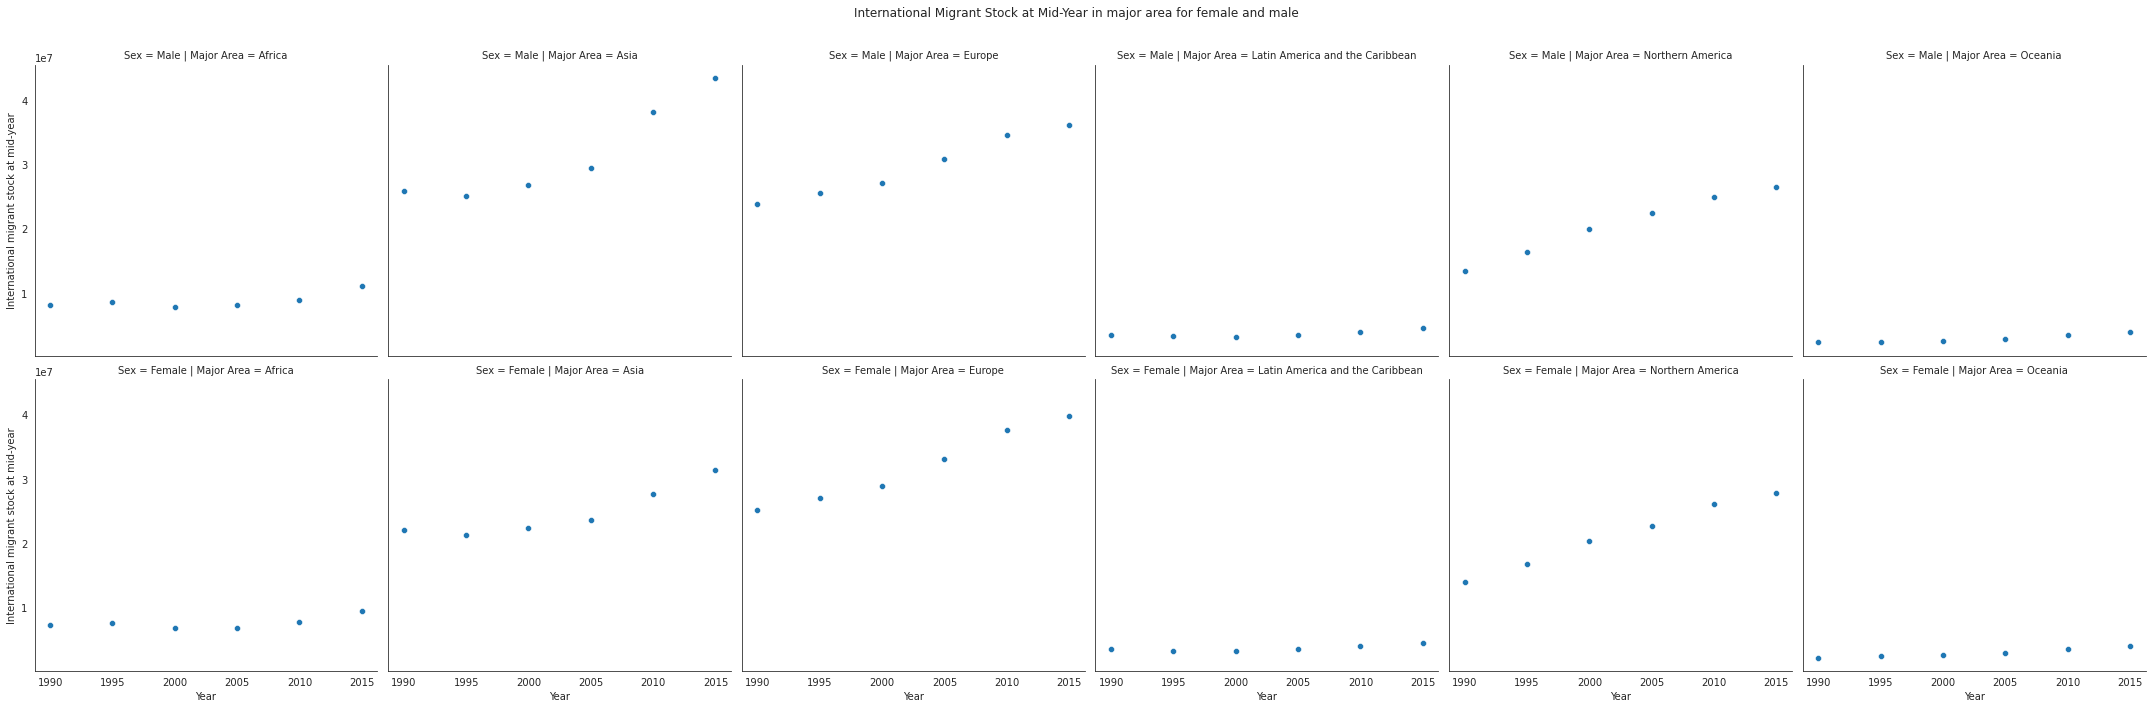

In [431]:
#seaborn.FacetGrid scatterplot -- International Migrant Stock at Mid-Year in major area for female and male
df1 = sns.FacetGrid(tidy_gender_maj_area1,col='Major Area',row='Sex', height=5)
df1.map_dataframe(sns.scatterplot, x='Year', y='International migrant stock at mid-year')
df1.set_axis_labels('Year','International migrant stock at mid-year');
df1.fig.subplots_adjust(top=0.9)
df1.fig.suptitle('International Migrant Stock at Mid-Year in major area for female and male')




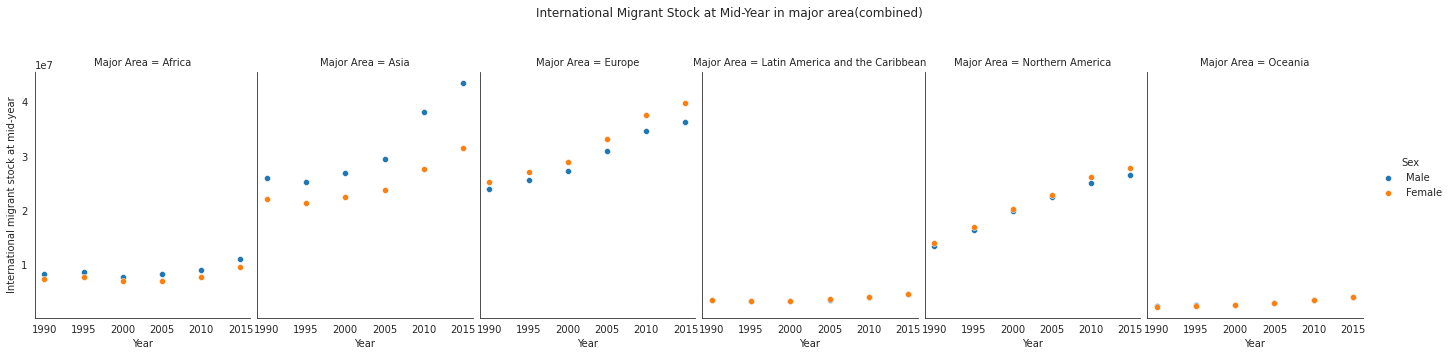

In [432]:
##seaborn.FacetGrid scatterplot -- International Migrant Stock at Mid-Year in major area for female and male (Combined)version
df1 = sns.FacetGrid(tidy_gender_maj_area1,col='Major Area', hue='Sex', height=5)
df1.map_dataframe(sns.scatterplot, x='Year', y='International migrant stock at mid-year')
df1.set_axis_labels('Year','International migrant stock at mid-year');


df1.fig.subplots_adjust(top=0.8)
df1.fig.suptitle('International Migrant Stock at Mid-Year in major area(combined)')
df1.figure.set_size_inches(19,5)
df1.add_legend()

In [433]:
#histogram -- International migrant stock at mid-year in major area for male and female
import plotly.express as px


fig = px.histogram(tidy_gender_maj_area1, x="Year", y="International migrant stock at mid-year", color="Sex", facet_col="Major Area",
       facet_col_wrap=3, width=1000, height=800,
       title="International migrant stock at mid-year in major area for male and female")


fig.show()

In [434]:
#apply Tufte's principle, the background is blue and we want to use least ink possible- minimalistic, so we change the background color 
#styling the fig
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.show()

Text(0.5, 1.0, 'International Migrant Stock at Mid-Year for male and female')

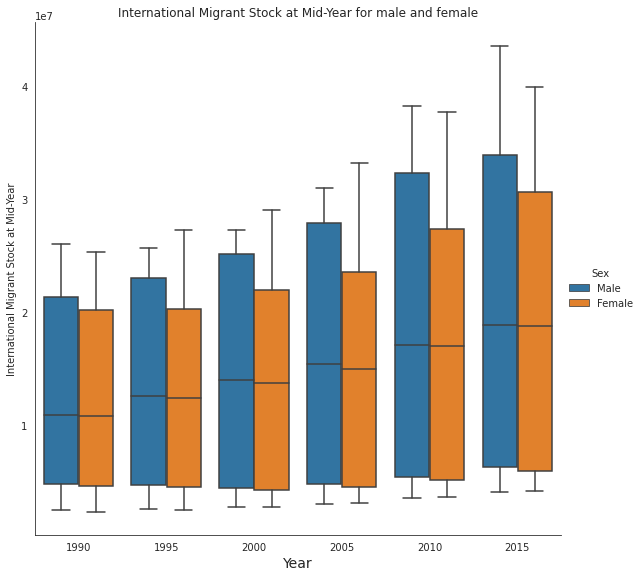

In [435]:
#Box plot for International Migrant Stock at Mid-Year for male and femle
sns.catplot(data=tidy_gender_maj_area1, kind="box", x="Year", y="International migrant stock at mid-year", hue="Sex", height=8)
plt.xlabel('Year', fontsize=14);
plt.ylabel('International Migrant Stock at Mid-Year', fontsize=10);
plt.title('International Migrant Stock at Mid-Year for male and female', fontsize=12)


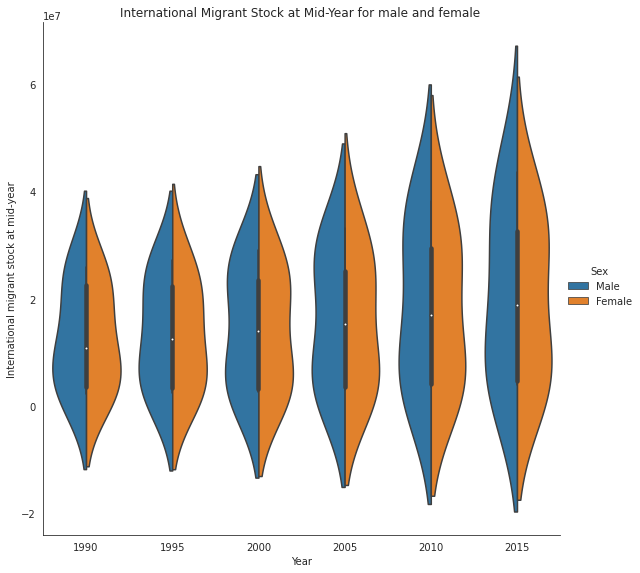

In [436]:
#Violin plot for International Migrant Stock at Mid-Year for male and femle

sns.set_style("white")
sns.catplot(data=tidy_gender_maj_area1, kind="violin",x="Year", y="International migrant stock at mid-year", hue="Sex", split= "True",height=8)
plt.title('International Migrant Stock at Mid-Year for male and female ', fontsize=12)
plt.show()

Text(0.5, 1.0, 'International Migrant Stock in major area for male and female from 1990-2015')

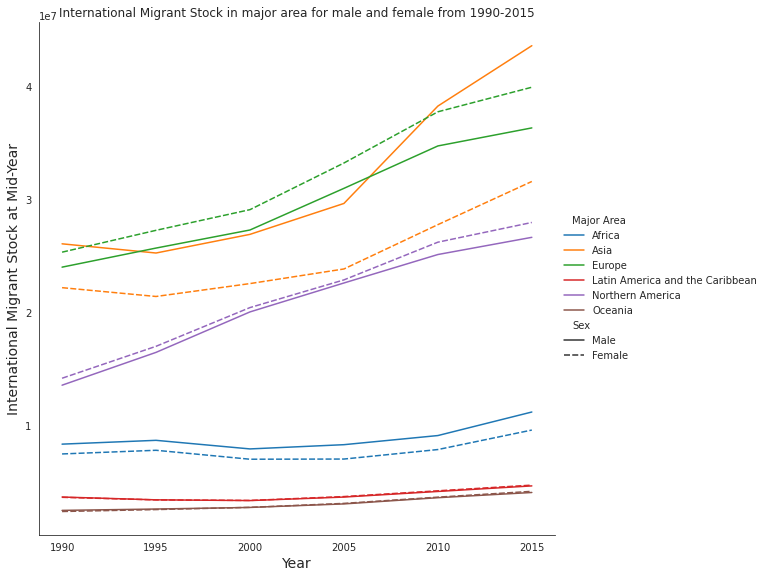

In [437]:
#Seaborn line graph -- International Migrant Stock at Mid-Year in major area for male and female

sns.relplot(data=tidy_gender_maj_area1, x="Year", y="International migrant stock at mid-year", 
            hue="Major Area", style = "Sex", kind="line", height=8)

plt.xlabel('Year', fontsize=14);
plt.ylabel('International Migrant Stock at Mid-Year', fontsize=14);
plt.title('International Migrant Stock in major area for male and female from 1990-2015', fontsize=12)


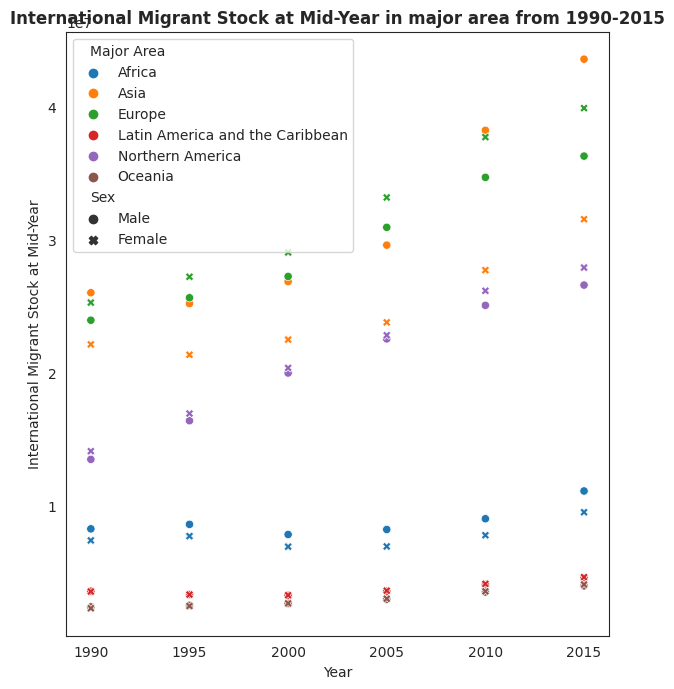

In [438]:
#Seaborn scatterplot graph -- International Migrant Stock at Mid-Year in major area for male and female
f11sex, ax = plt.subplots(figsize=(7,8),dpi=100)
ax.set_title('International Migrant Stock at Mid-Year in major area from 1990-2015',fontweight="bold")
ax.set_ylabel('International Migrant Stock at Mid-Year')
sns.scatterplot(y="International migrant stock at mid-year",x="Year", hue = "Major Area", style = "Sex", data=tidy_gender_maj_area1)



Table 1 - sex region

In [439]:
tidy_gender_region1.head(5)

Region Notes  Country Code  Year   Sex  \
1   Eastern Africa   NaN           910  1990  Male   
2    Middle Africa   NaN           911  1990  Male   
3  Northern Africa   NaN           912  1990  Male   
4  Southern Africa   NaN           913  1990  Male   
5   Western Africa   NaN           914  1990  Male   

   International migrant stock at mid-year  
1                                3071189.0  
2                                 744494.0  
3                                1230643.0  
4                                 840899.0  
5                                2392339.0

In [440]:
#create a new table that shows the top 5 regions with most international migrant stock for each year for both male and female
dtemp=tidy_gender_region1.sort_values(by='International migrant stock at mid-year', ascending=False)
data1=(dtemp[(dtemp.Year=="1990")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="1995")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2000")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2005")&(dtemp.Sex=="Male")].head (5))
data1=data1.append(dtemp[(dtemp.Year=="2010")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2015")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="1990")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="1995")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2000")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2005")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2010")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2015")&(dtemp.Sex=="Female")].head(5))
tidy_gender_r1=re_index(data1)


tidy_gender_r1.head(10)

Region Notes  Country Code  Year   Sex  \
1   Northern America   NaN           905  1990  Male   
2      Southern Asia   NaN          5501  1990  Male   
3     Eastern Europe   NaN           923  1990  Male   
4       Western Asia   NaN           922  1990  Male   
5     Western Europe   NaN           926  1990  Male   
6   Northern America   NaN           905  1995  Male   
7     Eastern Europe   NaN           923  1995  Male   
8       Western Asia   NaN           922  1995  Male   
9     Western Europe   NaN           926  1995  Male   
10     Southern Asia   NaN          5501  1995  Male   

    International migrant stock at mid-year  
1                                13497319.0  
2                                10601061.0  
3                                10201263.0  
4                                 8921324.0  
5                                 8506178.0  
6                                16402001.0  
7                                10022332.0  
8                                 9996494.0  
9                                 9352448.0  
10                                8382298.0

In [441]:
#bar chart for top 5 international migrant stock in regions for male/female from 1990-2015
import plotly.express as px

fig= px.bar(tidy_gender_r1, x="Year", y="International migrant stock at mid-year", color="Sex", barmode="group", facet_col="Region",
       facet_col_wrap=3, width=1000, height=800,
       title="International migrant stock at mid-year in regions for male and female")

fig.show()



In [442]:
#apply Tufte's principle, the background is blue and we want to use least ink possible- minimalistic, so we change the background color 
#styling the fig
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
#tufte's principle, redundent names"region"
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

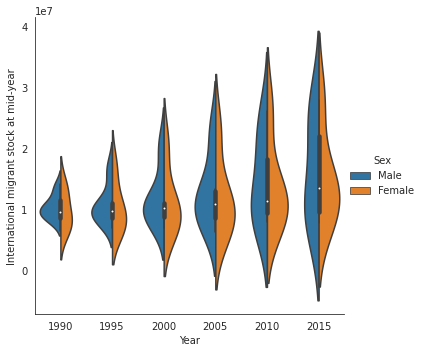

In [443]:
import matplotlib.pyplot as plt

sns.set_style("white")
sns.catplot(data=tidy_gender_r1, kind="violin",x="Year", y="International migrant stock at mid-year", hue="Sex", split= "True")
plt.show()

Table 1- sex country

In [444]:
tidy_gender_country1.head(5)

Country Notes  Country Code Type of data(a)  Year   Sex  \
1   Burundi   NaN           108             B R  1990  Male   
2   Comoros   NaN           174               B  1990  Male   
3  Djibouti   NaN           262             B R  1990  Male   
4   Eritrea   NaN           232               I  1990  Male   
5  Ethiopia   NaN           231             B R  1990  Male   

   International migrant stock at mid-year  
1                                 163267.0  
2                                   6717.0  
3                                  64242.0  
4                                   6228.0  
5                                 607284.0

In [445]:
#create a new table that shows the top 8 countries with most international migrant stock for each year for both male and female
dtemp=tidy_gender_country1.sort_values(by='International migrant stock at mid-year', ascending=False)
data1=(dtemp[(dtemp.Year=="1990")&(dtemp.Sex=="Male")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="1995")&(dtemp.Sex=="Male")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2000")&(dtemp.Sex=="Male")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2005")&(dtemp.Sex=="Male")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2010")&(dtemp.Sex=="Male")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2015")&(dtemp.Sex=="Male")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="1990")&(dtemp.Sex=="Female")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="1995")&(dtemp.Sex=="Female")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2000")&(dtemp.Sex=="Female")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2005")&(dtemp.Sex=="Female")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2010")&(dtemp.Sex=="Female")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2015")&(dtemp.Sex=="Female")].head(8))
tidy_gender_c1=re_index(data1)


tidy_gender_c1.head(10)

Country Notes  Country Code Type of data(a)  Year   Sex  \
1   United States of America   NaN           840               B  1990  Male   
2         Russian Federation   NaN           643               B  1990  Male   
3                      India   NaN           356             B R  1990  Male   
4               Saudi Arabia   NaN           682             C R  1990  Male   
5                    Germany   NaN           276               B  1990  Male   
6                   Pakistan   NaN           586             B R  1990  Male   
7                     France   NaN           250               B  1990  Male   
8                    Ukraine   NaN           804               B  1990  Male   
9   United States of America   NaN           840               B  1995  Male   
10        Russian Federation   NaN           643               B  1995  Male   

    International migrant stock at mid-year  
1                                11372985.0  
2                                 5655422.0  
3                                 3914396.0  
4                                 3324873.0  
5                                 3293128.0  
6                                 3264380.0  
7                                 2999376.0  
8                                 2953603.0  
9                                14032159.0  
10                                5925452.0

In [446]:

fig = px.bar(tidy_gender_c1, x="Year", y="International migrant stock at mid-year", facet_col="Country", color="Sex", barmode="group", facet_col_wrap=3,height=1600,
              title="International migrant stock at mid-year in Top 8 countries for male and female")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_yaxes(matches=None)
#apply Tufte's principle, the background is blue and we want to use least ink possible- minimalistic, so we change the background color 
#styling the fig
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.show()

Both sexes

In [447]:
tidy_both_area1.head(10)

Major Area Notes Country Code  Year  \
1                            Africa   NaN          903  1990   
2                              Asia   NaN          935  1990   
3                            Europe   NaN          908  1990   
4   Latin America and the Caribbean   NaN          904  1990   
5                  Northern America   NaN          905  1990   
6                           Oceania   NaN          909  1990   
7                            Africa   NaN          903  1995   
8                              Asia   NaN          935  1995   
9                            Europe   NaN          908  1995   
10  Latin America and the Caribbean   NaN          904  1995   

   International migrant stock at mid-year (both sexes)  
1                                            15690623    
2                                            48142261    
3                                            49219200    
4                                             7169728    
5                                            27610542    
6                                             4730858    
7                                          16352814.0    
8                                          46548225.0    
9                                          52842663.0    
10                                          6694640.0

Text(0.5, 1.0, 'International Migrant Stock at Mid-Year(both sexes)in major area')

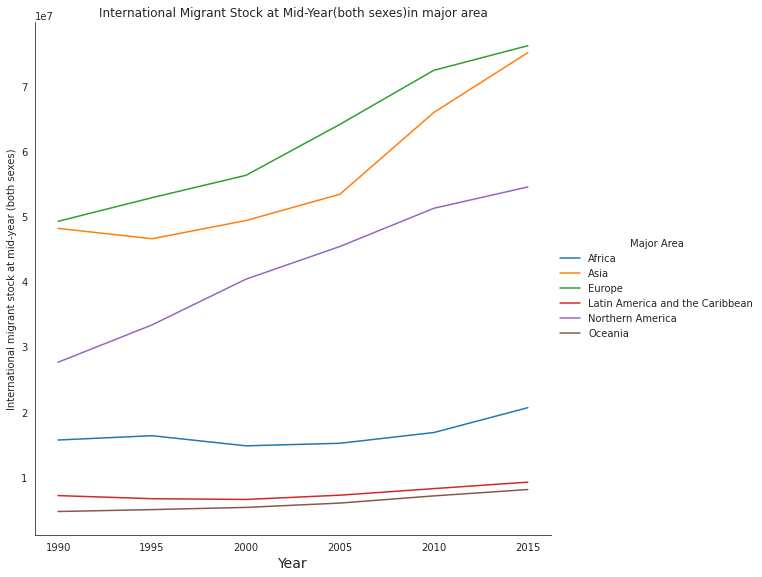

In [448]:
sns.relplot(data=tidy_both_area1, x="Year", y="International migrant stock at mid-year (both sexes)", hue="Major Area", kind="line", height=8)


plt.xlabel('Year', fontsize=14);
plt.ylabel('International migrant stock at mid-year (both sexes)', fontsize=10);
plt.title('International Migrant Stock at Mid-Year(both sexes)in major area', fontsize=12)

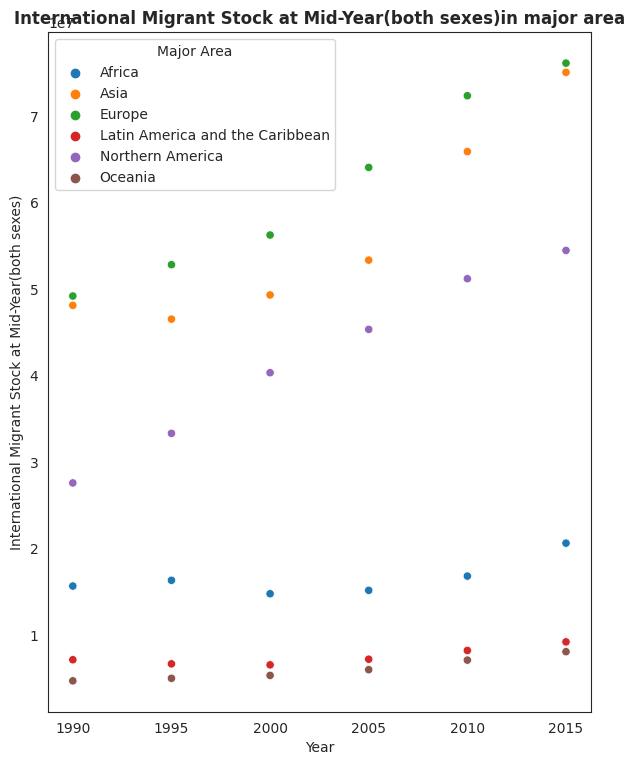

In [449]:
f11both, ax = plt.subplots(figsize=(7,9),dpi=100)
ax.set_title('International Migrant Stock at Mid-Year(both sexes)in major area',fontweight="bold")
ax.set_ylabel('International Migrant Stock at Mid-Year(both sexes)')
sns.scatterplot(y="International migrant stock at mid-year (both sexes)", hue = "Major Area",x="Year", data=tidy_both_area1)

Text(0.5, 0.98, 'International Migrant Stock at Mid-Year(both sexes)in major area')

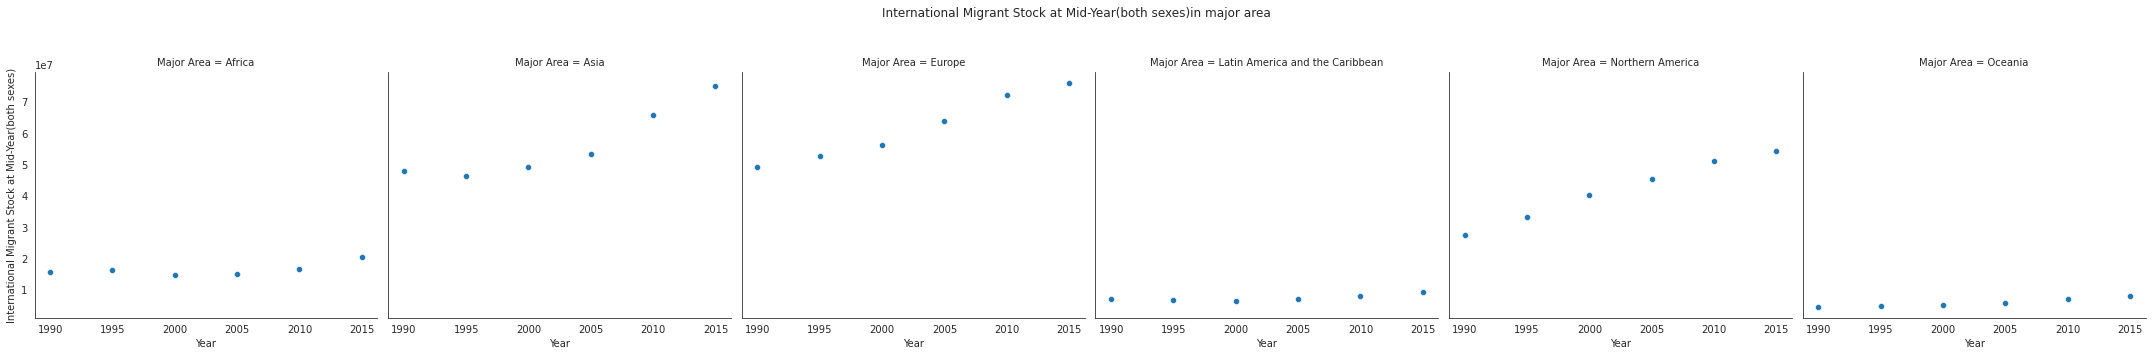

In [450]:
import plotly.express as px

df11 = sns.FacetGrid(tidy_both_area1,col='Major Area', height=5)
df11.map_dataframe(sns.scatterplot, x='Year', y='International migrant stock at mid-year (both sexes)')
df11.set_axis_labels('Year','International Migrant Stock at Mid-Year(both sexes)');
df11.fig.subplots_adjust(top=0.8)
df11.fig.suptitle('International Migrant Stock at Mid-Year(both sexes)in major area')

In [451]:

import plotly.graph_objects as go
import plotly.express as px
fig = go.Figure(px.scatter(
        tidy_both_area1, x="Year", y="International migrant stock at mid-year (both sexes)", height=600,width=800,
        color="Major Area", title="Playing with Fonts"))
fig.show()

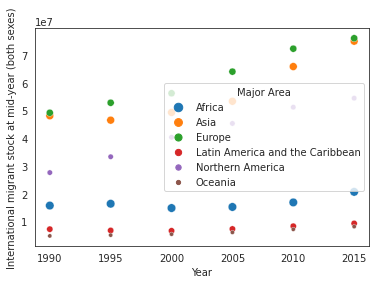

In [452]:
sns.scatterplot(data=tidy_both_area1, x="Year", y="International migrant stock at mid-year (both sexes)", hue="Major Area", size="Major Area",legend="full")


In [453]:
tidy_both_region1.head(10)

Region Notes Country Code  Year  \
1       Eastern Africa   NaN          910  1990   
2        Middle Africa   NaN          911  1990   
3      Northern Africa   NaN          912  1990   
4      Southern Africa   NaN          913  1990   
5       Western Africa   NaN          914  1990   
6         Central Asia   NaN         5500  1990   
7         Eastern Asia   NaN          906  1990   
8   South-Eastern Asia   NaN          920  1990   
9        Southern Asia   NaN         5501  1990   
10        Western Asia   NaN          922  1990   

   International migrant stock at mid-year (both sexes)  
1                                             5964031    
2                                             1460530    
3                                             2403200    
4                                             1392359    
5                                             4470503    
6                                             6630683    
7                                             3959345    
8                                             2876616    
9                                            19436343    
10                                           15239274

In [454]:
#create a new table that shows the top 5 regions with most international migrant stock for each year for both male and female
dtemp=tidy_both_region1.sort_values(by='International migrant stock at mid-year (both sexes)', ascending=False)
data1=dtemp[dtemp.Year=="1990"].head(5)
data1=data1.append(dtemp[dtemp.Year=="1995"].head(5))
data1=data1.append(dtemp[dtemp.Year=="2000"].head(5))
data1=data1.append(dtemp[dtemp.Year=="2005"].head (5))
data1=data1.append(dtemp[dtemp.Year=="2010"].head(5))
data1=data1.append(dtemp[dtemp.Year=="2015"].head(5))
tidy_both_r1=re_index(data1)


tidy_both_r1.head(10)

Region Notes Country Code  Year  \
1   Northern America   NaN          905  1990   
2     Eastern Europe   NaN          923  1990   
3      Southern Asia   NaN         5501  1990   
4     Western Europe   NaN          926  1990   
5       Western Asia   NaN          922  1990   
6   Northern America   NaN          905  1995   
7     Eastern Europe   NaN          923  1995   
8     Western Europe   NaN          926  1995   
9       Western Asia   NaN          922  1995   
10     Southern Asia   NaN         5501  1995   

   International migrant stock at mid-year (both sexes)  
1                                            27610542    
2                                            21995312    
3                                            19436343    
4                                            16237829    
5                                            15239274    
6                                          33341147.0    
7                                          21344124.0    
8                                          18318040.0    
9                                          16956639.0    
10                                         15343019.0

In [455]:
fig = px.box(tidy_both_r1,x='Year', y='International migrant stock at mid-year (both sexes)', facet_col="Region",
             points='all')
fig.show()

In [456]:
tidy_both_country1.head(10)

Country Notes Country Code Type of data(a)  Year  \
1      Burundi   NaN          108             B R  1990   
2      Comoros   NaN          174               B  1990   
3     Djibouti   NaN          262             B R  1990   
4      Eritrea   NaN          232               I  1990   
5     Ethiopia   NaN          231             B R  1990   
6        Kenya   NaN          404             B R  1990   
7   Madagascar   NaN          450               C  1990   
8       Malawi   NaN          454             B R  1990   
9    Mauritius   (1)          480               C  1990   
10     Mayotte   NaN          175               B  1990   

   International migrant stock at mid-year (both sexes)  
1                                              333110    
2                                               14079    
3                                              122221    
4                                               11848    
5                                             1155390    
6                                              297292    
7                                               23917    
8                                             1127724    
9                                                3613    
10                                              15229

# Table 2

> male/female



In [457]:
tidy_gender_maj_area22.head(10)

Major Area Notes Country Code  Year   Sex  \
1                            Africa   NaN          903  1990  Male   
2                              Asia   NaN          935  1990  Male   
3                            Europe   NaN          908  1990  Male   
4   Latin America and the Caribbean   NaN          904  1990  Male   
5                  Northern America   NaN          905  1990  Male   
6                           Oceania   NaN          909  1990  Male   
7                            Africa   NaN          903  1995  Male   
8                              Asia   NaN          935  1995  Male   
9                            Europe   NaN          908  1995  Male   
10  Latin America and the Caribbean   NaN          904  1995  Male   

   Total population at mid-year (thousands)  
1                                315071.378  
2                               1634734.677  
3                                347356.281  
4                                221989.776  
5                                137757.875  
6                                 13513.714  
7                                359408.818  
8                               1774573.634  
9                                350900.684  
10                               241691.088

Text(0.5, 1.0, 'Total population at mid-year (thousands) in major area from 1990-2015')

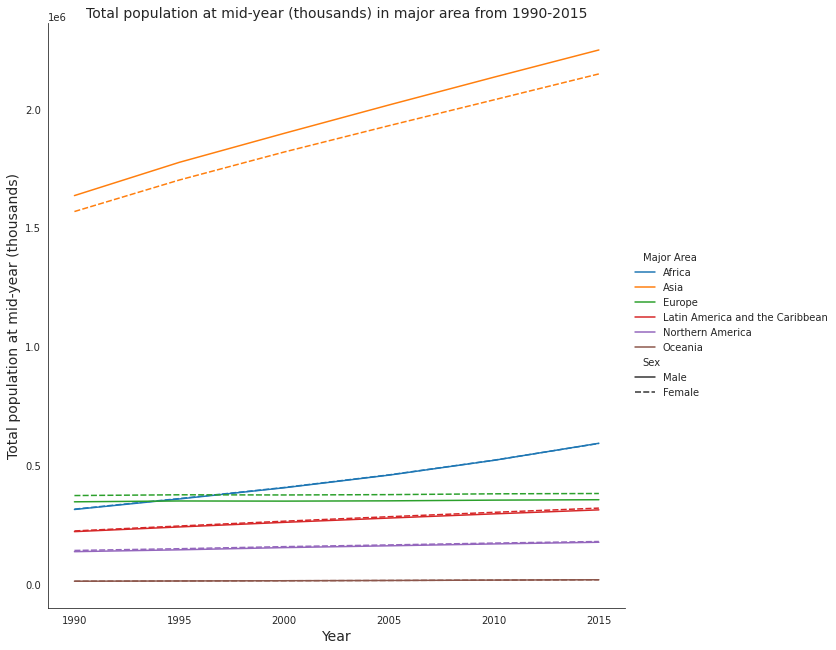

In [458]:
#Seaborn line graph -- Total population at mid-year (thousands) in major area for male and female

sns.relplot(data=tidy_gender_maj_area22, x="Year", y="Total population at mid-year (thousands)", hue="Major Area", style = "Sex", kind="line", height=9)


plt.xlabel('Year', fontsize=14);
plt.ylabel('Total population at mid-year (thousands)', fontsize=14);
plt.title('Total population at mid-year (thousands) in major area from 1990-2015', fontsize=14)

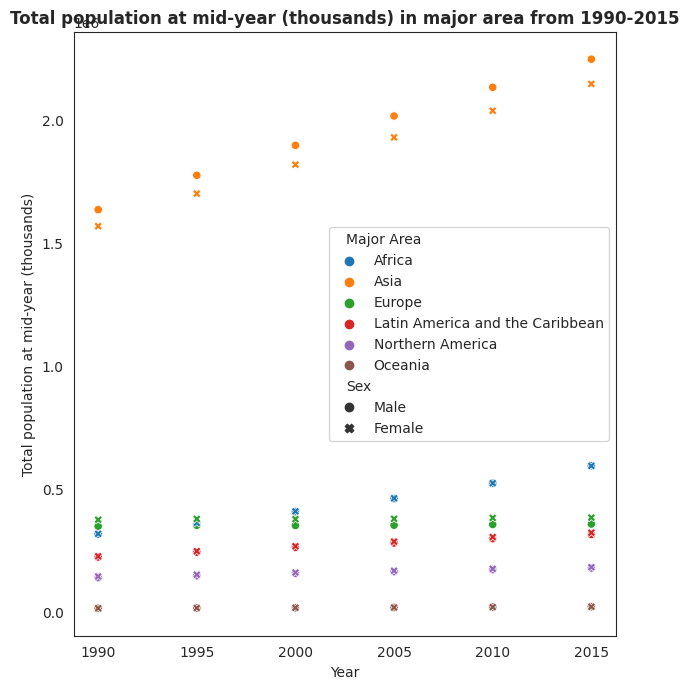

In [459]:
#Seaborn scatterplot graph -- Total population at mid-year (thousands) in major area for male and female
f22sex, ax = plt.subplots(figsize=(7,8),dpi=100)
ax.set_title('Total population at mid-year (thousands) in major area from 1990-2015',fontweight="bold")
ax.set_ylabel('Total population at mid-year (thousands)')
sns.scatterplot(y="Total population at mid-year (thousands)",x="Year", hue = "Major Area", style = "Sex", data=tidy_gender_maj_area22)

Text(0.5, 1.0, 'Total population at mid-year (thousands) in major area')

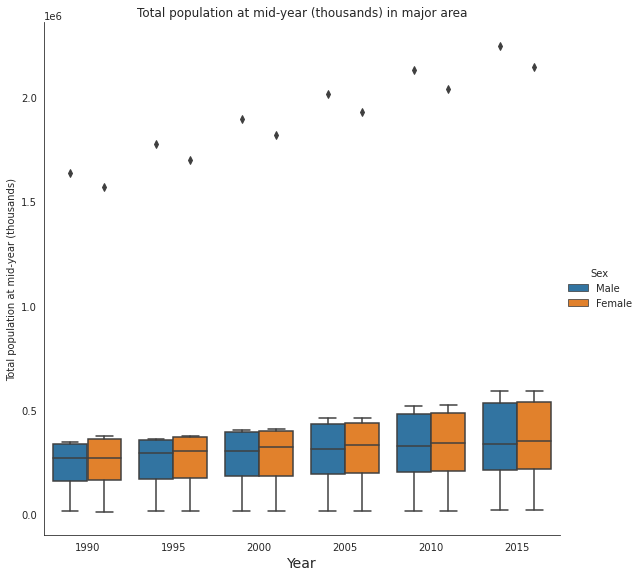

In [460]:
#Box plot for Total population at mid-year (thousands)in major area for male and femle
sns.catplot(data=tidy_gender_maj_area22, kind="box", x="Year", y="Total population at mid-year (thousands)", hue="Sex", height=8)
plt.xlabel('Year', fontsize=14);
plt.ylabel('Total population at mid-year (thousands)', fontsize=10);
plt.title('Total population at mid-year (thousands) in major area', fontsize=12)

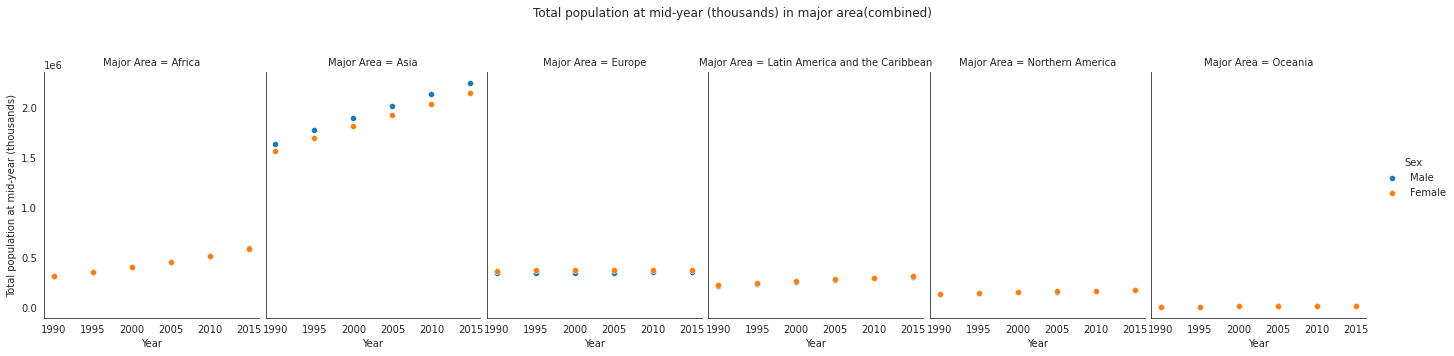

In [461]:

##seaborn.FacetGrid scatterplot -- Total population at mid-year (thousands) in major area for female and male (Combined)version
df1 = sns.FacetGrid(tidy_gender_maj_area22,col='Major Area', hue='Sex', height=5)
df1.map_dataframe(sns.scatterplot, x='Year', y='Total population at mid-year (thousands)')
df1.set_axis_labels('Year','Total population at mid-year (thousands)');

df1.fig.subplots_adjust(top=0.8)
df1.fig.suptitle('Total population at mid-year (thousands) in major area(combined)')
df1.figure.set_size_inches(19,5)
df1.add_legend()

Text(0.5, 0.98, 'Total population at mid-year (thousands) in major area for female and male')

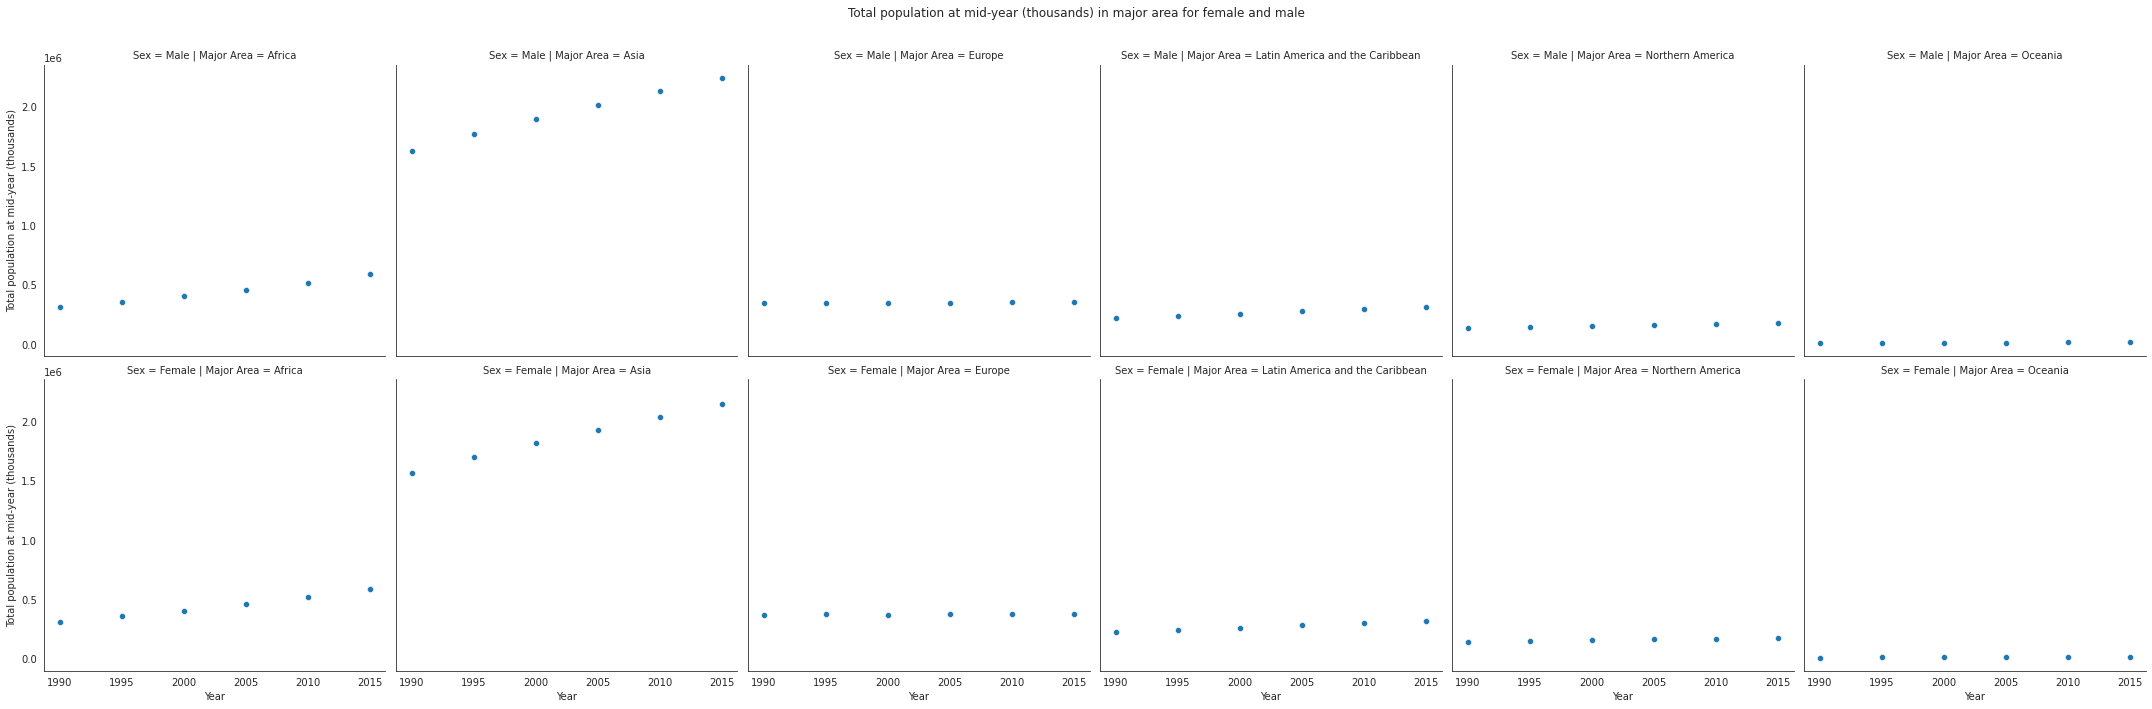

In [462]:
#seaborn.FacetGrid scatterplot -- Total population at mid-year (thousands) in major area for female and male
df1 = sns.FacetGrid(tidy_gender_maj_area22,col='Major Area',row='Sex', height=5)
df1.map_dataframe(sns.scatterplot, x='Year', y='Total population at mid-year (thousands)')
df1.set_axis_labels('Year','Total population at mid-year (thousands)');
df1.fig.subplots_adjust(top=0.9)
df1.fig.suptitle('Total population at mid-year (thousands) in major area for female and male')


In [463]:
#histogram -- Total population at mid-year (thousands) in major area for male and female
import plotly.express as px

fig = px.histogram(tidy_gender_maj_area22, x="Year", y="Total population at mid-year (thousands)", color="Sex", facet_col="Major Area",
       facet_col_wrap=3, width=1000, height=800, color_discrete_sequence=["green", "blue"],
       title="Total population at mid-year (thousands) in major area for male and female")


fig.show()

#apply Tufte's principle, the background is blue and we want to use least ink possible- minimalistic, so we change the background color 
#styling the fig
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')

fig.show()

In [464]:
tidy2_gender_region.head(10)

Region Notes Country Code  Year   Sex  \
1       Eastern Africa   NaN          910  1990  Male   
2        Middle Africa   NaN          911  1990  Male   
3      Northern Africa   NaN          912  1990  Male   
4      Southern Africa   NaN          913  1990  Male   
5       Western Africa   NaN          914  1990  Male   
6         Central Asia   NaN         5500  1990  Male   
7         Eastern Asia   NaN          906  1990  Male   
8   South-Eastern Asia   NaN          920  1990  Male   
9        Southern Asia   NaN         5501  1990  Male   
10        Western Asia   NaN          922  1990  Male   

   Total population at mid-year (thousands)  
1                                 98208.646  
2                                 35035.128  
3                                 70480.841  
4                                   20760.4  
5                                 90586.363  
6                                 24731.701  
7                                  698498.4  
8                                222338.082  
9                                613752.446  
10                                75414.048

In [465]:
#create a new table that shows the top 5 regions with most international migrant stock for each year for both male and female
dtemp=tidy2_gender_region.sort_values(by='Total population at mid-year (thousands)', ascending=False)
data1=(dtemp[(dtemp.Year=="1990")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="1995")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2000")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2005")&(dtemp.Sex=="Male")].head (5))
data1=data1.append(dtemp[(dtemp.Year=="2010")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2015")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="1990")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="1995")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2000")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2005")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2010")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2015")&(dtemp.Sex=="Female")].head(5))
tidy_gender_r2=re_index(data1)

tidy_gender_r2.head(10)

Region Notes Country Code  Year   Sex  \
1         Eastern Asia   NaN          906  1990  Male   
2        Southern Asia   NaN         5501  1990  Male   
3   South-Eastern Asia   NaN          920  1990  Male   
4        South America   NaN          931  1990  Male   
5       Eastern Europe   NaN          923  1990  Male   
6         Eastern Asia   NaN          906  1995  Male   
7        Southern Asia   NaN         5501  1995  Male   
8   South-Eastern Asia   NaN          920  1995  Male   
9        South America   NaN          931  1995  Male   
10      Eastern Europe   NaN          923  1995  Male   

   Total population at mid-year (thousands)  
1                                  698498.4  
2                                613752.446  
3                                222338.082  
4                                147875.572  
5                                146931.214  
6                                739842.908  
7                                680956.361  
8                                242676.271  
9                                160578.132  
10                               146776.861

In [466]:
#Histogram of top 5 regions with most total population for male/female from 1990-2015
import plotly.express as px

fig= px.histogram(tidy_gender_r2, x="Year", y="Total population at mid-year (thousands)", color="Sex", barmode="group", facet_col="Region",
       facet_col_wrap=3, width=1000, height=1200, color_discrete_sequence=["green", "blue"],
       title="Regions with highest total population at mid-year (thousands) for male and female")
fig.update_yaxes(matches=None)
fig.show()

#apply Tufte's principle, the background is blue and we want to use least ink possible- minimalistic, so we change the background color 
#styling the fig
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
#tufte's principle, redundent names"region"
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

In [467]:
tidy_gender_country22.head(10)

Country Notes Country Code  Year   Sex  \
1      Burundi   NaN          108  1990  Male   
2      Comoros   NaN          174  1990  Male   
3     Djibouti   NaN          262  1990  Male   
4      Eritrea   NaN          232  1990  Male   
5     Ethiopia   NaN          231  1990  Male   
6        Kenya   NaN          404  1990  Male   
7   Madagascar   NaN          450  1990  Male   
8       Malawi   NaN          454  1990  Male   
9    Mauritius   (1)          480  1990  Male   
10     Mayotte   NaN          175  1990  Male   

   Total population at mid-year (thousands)  
1                                  2755.028  
2                                   208.212  
3                                   295.933  
4                                  1558.486  
5                                 23965.647  
6                                  11678.27  
7                                  5764.586  
8                                  4623.172  
9                                   526.544  
10                                   48.455

In [468]:
#create a new table that shows the top 8 countries with most total population for each year for both male and female
dtemp=tidy_gender_country22.sort_values(by='Total population at mid-year (thousands)', ascending=False)
data1=(dtemp[(dtemp.Year=="1990")&(dtemp.Sex=="Male")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="1995")&(dtemp.Sex=="Male")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2000")&(dtemp.Sex=="Male")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2005")&(dtemp.Sex=="Male")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2010")&(dtemp.Sex=="Male")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2015")&(dtemp.Sex=="Male")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="1990")&(dtemp.Sex=="Female")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="1995")&(dtemp.Sex=="Female")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2000")&(dtemp.Sex=="Female")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2005")&(dtemp.Sex=="Female")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2010")&(dtemp.Sex=="Female")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2015")&(dtemp.Sex=="Female")].head(8))
tidy_gender_c2=re_index(data1)

tidy_gender_c2.head(10)

Country Notes Country Code  Year   Sex  \
1                      China   (5)          156  1990  Male   
2                      India   NaN          356  1990  Male   
3   United States of America   NaN          840  1990  Male   
4                  Indonesia   NaN          360  1990  Male   
5                     Brazil   NaN           76  1990  Male   
6         Russian Federation   NaN          643  1990  Male   
7                      Japan   NaN          392  1990  Male   
8                   Pakistan   NaN          586  1990  Male   
9                      China   (5)          156  1995  Male   
10                     India   NaN          356  1995  Male   

   Total population at mid-year (thousands)  
1                                592506.399  
2                                450559.907  
3                                 123979.49  
4                                  91116.02  
5                                 74584.941  
6                                 69087.063  
7                                 59943.424  
8                                 55779.101  
9                                630560.501  
10                               497499.178

In [469]:
#Histogram of top 8 countries with most total population for male/female from 1990-2015
fig = px.histogram(tidy_gender_c2, x="Country", y="Total population at mid-year (thousands)", facet_col="Year", color="Sex", barmode="group", facet_col_wrap=3,height=900,
                   color_discrete_sequence=["green", "blue"],
              title="Total population at mid-year (thousands) in Top 8 countries for male and female")

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_yaxes(matches=None)
#apply Tufte's principle, the background is blue and we want to use least ink possible- minimalistic, so we change the background color 
#styling the fig
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')

fig.show()

Table 2-- Both sexes

In [470]:
tidy_both_area22.head(10)

Major Area Notes Country Code  Year  \
1                            Africa   NaN          903  1990   
2                              Asia   NaN          935  1990   
3                            Europe   NaN          908  1990   
4   Latin America and the Caribbean   NaN          904  1990   
5                  Northern America   NaN          905  1990   
6                           Oceania   NaN          909  1990   
7                            Africa   NaN          903  1995   
8                              Asia   NaN          935  1995   
9                            Europe   NaN          908  1995   
10  Latin America and the Caribbean   NaN          904  1995   

   Total population of both sexes at mid-year (thousands)  
1                                          631614.304      
2                                         3202474.692      
3                                          721086.311      
4                                          446888.767      
5                                          280633.063      
6                                           26970.562      
7                                          720416.386      
8                                         3474848.677      
9                                           727778.44      
10                                         487325.927

Text(0.5, 1.0, 'Total population of both sexes at mid-year (thousands)')

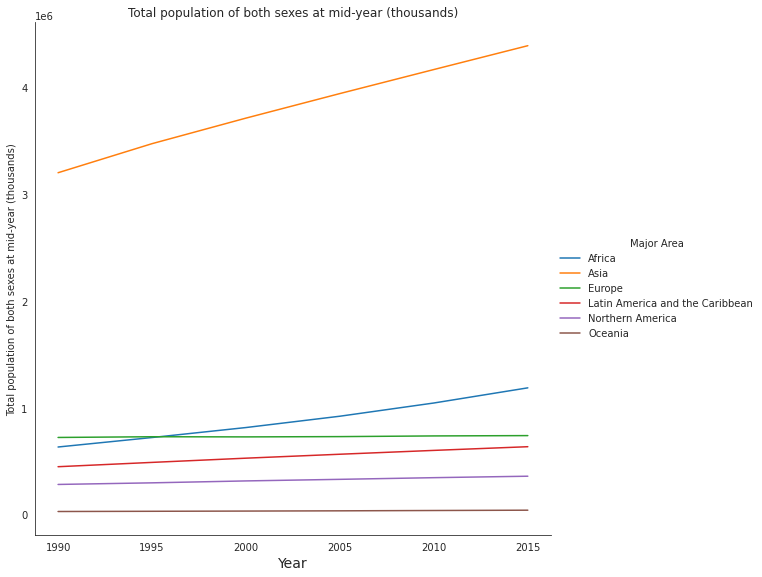

In [471]:
#Seaborn line graph -- Total population of both sexes at mid-year (thousands) at Mid-Year in major area for male and female
sns.relplot(data=tidy_both_area22, x="Year", y="Total population of both sexes at mid-year (thousands)", hue="Major Area", kind="line", height=8)


plt.xlabel('Year', fontsize=14);
plt.ylabel('Total population of both sexes at mid-year (thousands)', fontsize=10);
plt.title('Total population of both sexes at mid-year (thousands)', fontsize=12)


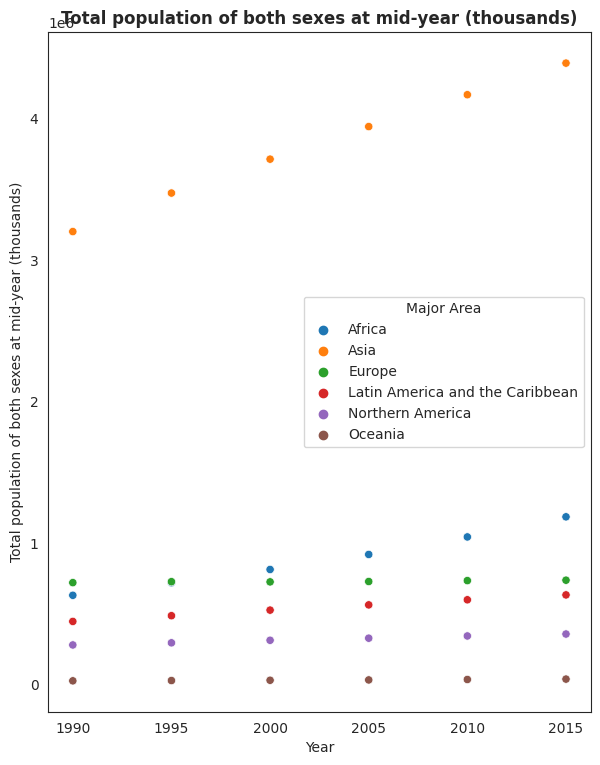

In [472]:
#Seaborn scatterplot graph -- Total population of both sexes at mid-year (thousands) at Mid-Year in major area
f22both, ax = plt.subplots(figsize=(7,9),dpi=100)
ax.set_title('Total population of both sexes at mid-year (thousands)',fontweight="bold")
ax.set_ylabel('Total population of both sexes at mid-year (thousands)')
sns.scatterplot(y="Total population of both sexes at mid-year (thousands)", hue = "Major Area",x="Year", data=tidy_both_area22)

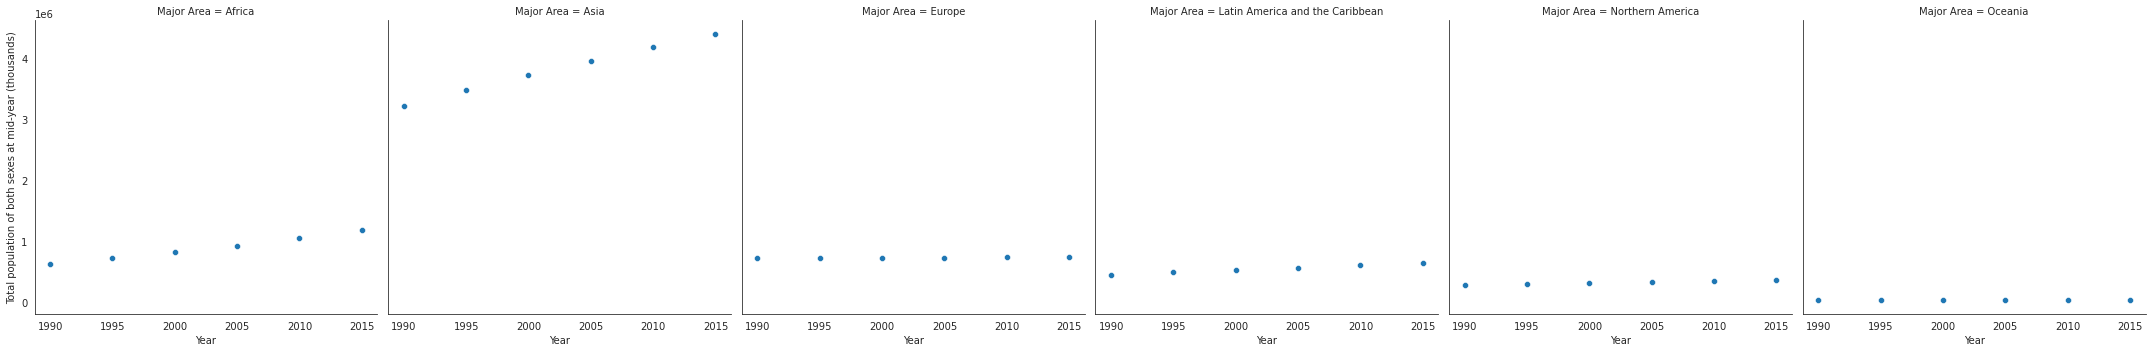

In [473]:
##seaborn.FacetGrid scatterplot -- International Migrant Stock at Mid-Year in major area for female and male (Combined)version
df1 = sns.FacetGrid(data=tidy_both_area22,col='Major Area', height=5)
df1.map_dataframe(sns.scatterplot, x='Year', y='Total population of both sexes at mid-year (thousands)')
df1.set_axis_labels('Year','Total population of both sexes at mid-year (thousands)');

Text(0.5, 1.0, 'Total population at mid-year (thousands)')

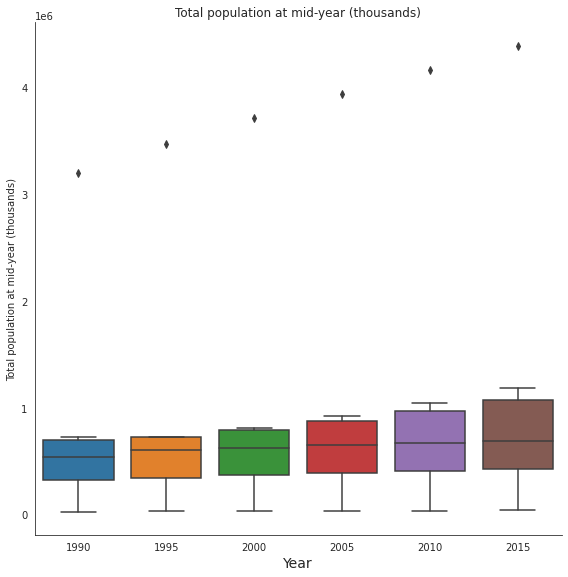

In [474]:
import matplotlib.pyplot as plt
#Box plot for International Migrant Stock at Mid-Year in major area for male and femle
sns.catplot(data=tidy_both_area22, kind="box", y="Total population of both sexes at mid-year (thousands)", x="Year", height=8)
plt.xlabel('Year', fontsize=14);
plt.ylabel('Total population at mid-year (thousands)', fontsize=10);
plt.title('Total population at mid-year (thousands)', fontsize=12)



In [475]:
tidy_both_region22.head(10)

Region Notes Country Code  Year  \
1       Eastern Africa   NaN          910  1990   
2        Middle Africa   NaN          911  1990   
3      Northern Africa   NaN          912  1990   
4      Southern Africa   NaN          913  1990   
5       Western Africa   NaN          914  1990   
6         Central Asia   NaN         5500  1990   
7         Eastern Asia   NaN          906  1990   
8   South-Eastern Asia   NaN          920  1990   
9        Southern Asia   NaN         5501  1990   
10        Western Asia   NaN          922  1990   

   Total population of both sexes at mid-year (thousands)  
1                                          198231.687      
2                                           70886.433      
3                                          140116.613      
4                                           42049.013      
5                                          180330.558      
6                                           50405.063      
7                                         1368591.934      
8                                           445665.26      
9                                         1189260.506      
10                                         148551.929

In [476]:
tidy_both_country22.head(10)

Country Notes Country Code  Year  \
1      Burundi   NaN          108  1990   
2      Comoros   NaN          174  1990   
3     Djibouti   NaN          262  1990   
4      Eritrea   NaN          232  1990   
5     Ethiopia   NaN          231  1990   
6        Kenya   NaN          404  1990   
7   Madagascar   NaN          450  1990   
8       Malawi   NaN          454  1990   
9    Mauritius   (1)          480  1990   
10     Mayotte   NaN          175  1990   

   Total population of both sexes at mid-year (thousands)  
1                                            5613.141      
2                                             415.144      
3                                             588.356      
4                                            3139.083      
5                                           48057.094      
6                                           23446.229      
7                                           11545.782      
8                                            9408.998      
9                                            1055.865      
10                                              94.78

In [477]:
#create a new table that shows the top 8 regions with the most population for each year 
dtemp=tidy_both_country22.sort_values(by='Total population of both sexes at mid-year (thousands)', ascending=False)
data1=dtemp[dtemp.Year=="1990"].head(8)
data1=data1.append(dtemp[dtemp.Year=="1995"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2000"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2005"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2010"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2015"].head(8))
tidy_both_c2=re_index(data1)

tidy_both_c2.head(10)

Country Notes Country Code  Year  \
1                      China   (5)          156  1990   
2                      India   NaN          356  1990   
3   United States of America   NaN          840  1990   
4                  Indonesia   NaN          360  1990   
5                     Brazil   NaN           76  1990   
6         Russian Federation   NaN          643  1990   
7                      Japan   NaN          392  1990   
8                   Pakistan   NaN          586  1990   
9                      China   (5)          156  1995   
10                     India   NaN          356  1995   

   Total population of both sexes at mid-year (thousands)  
1                                         1154605.773      
2                                          870601.776      
3                                           252847.81      
4                                          181436.821      
5                                          150393.143      
6                                          147568.552      
7                                          122249.285      
8                                          107607.639      
9                                         1227841.281      
10                                         960874.982

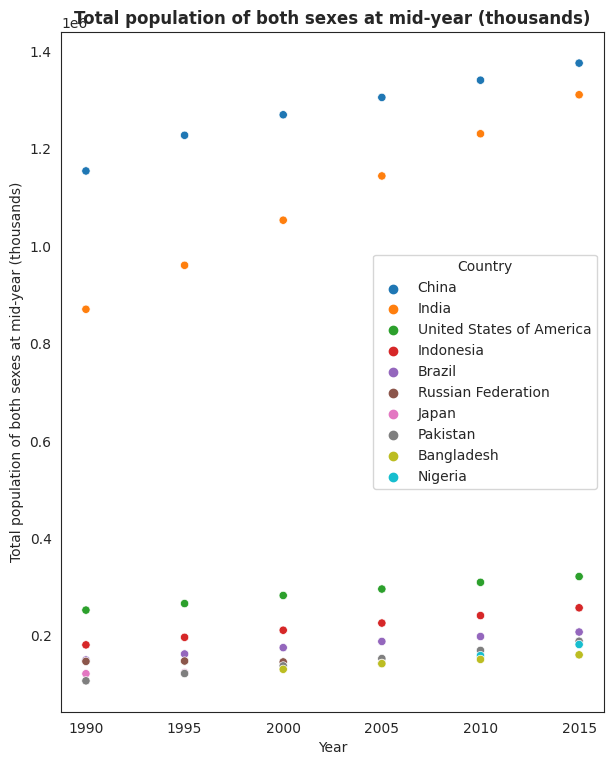

In [478]:
#Scatterplot for total population in top 8 countries each year (Both sexes)
f22cboth, ax = plt.subplots(figsize=(7,9),dpi=100)
ax.set_title('Total population of both sexes at mid-year (thousands)',fontweight="bold")
ax.set_ylabel('Total population of both sexes at mid-year (thousands)')
sns.scatterplot(y="Total population of both sexes at mid-year (thousands)", hue = "Country",x="Year", data=tidy_both_c2)

Text(0.5, 1.0, 'Total population of both sexes at mid-year (thousands)')

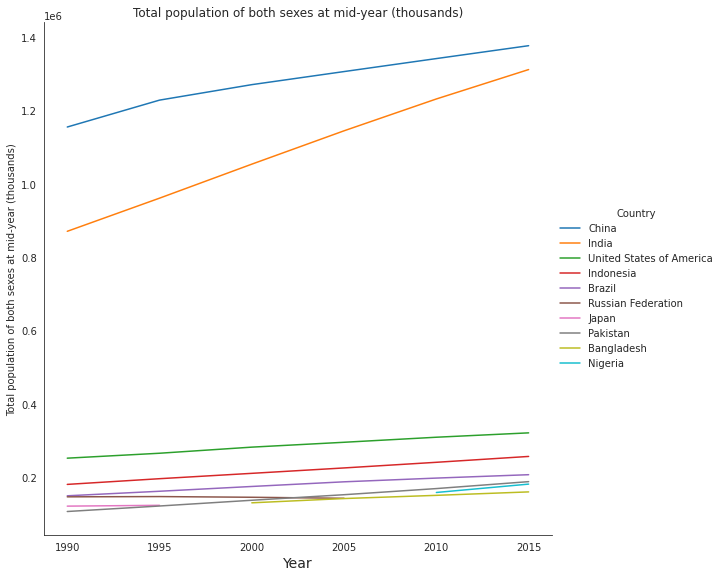

In [479]:
#Seaborn line graph -- Total population of both sexes at mid-year (thousands) at Mid-Year in major area for male and female
sns.relplot(data=tidy_both_c2, x="Year", y="Total population of both sexes at mid-year (thousands)", hue="Country", kind="line", height=8)


plt.xlabel('Year', fontsize=14);
plt.ylabel('Total population of both sexes at mid-year (thousands)', fontsize=10);
plt.title('Total population of both sexes at mid-year (thousands)', fontsize=12)

In [480]:
#Small Multiple line chart-- Total population of countries with the most total population from 1990-2015 (both sexes)
import plotly.express as px

fig = px.line(tidy_both_c2, x="Year", y="Total population of both sexes at mid-year (thousands)",facet_col="Country", facet_col_wrap=4,
              height=1300, width=1600,
              title="Countries with most Total Population from 1990-2015 ")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_yaxes(showticklabels=True)

fig.show()

#apply Tufte's principle, the background is blue and we want to use least ink possible- minimalistic, so we change the background color 
#styling the fig
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    linecolor='black')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.show()

Text(0.5, 1.0, 'Total population of countries with the most total population from 1990-2015 (both sexes)')

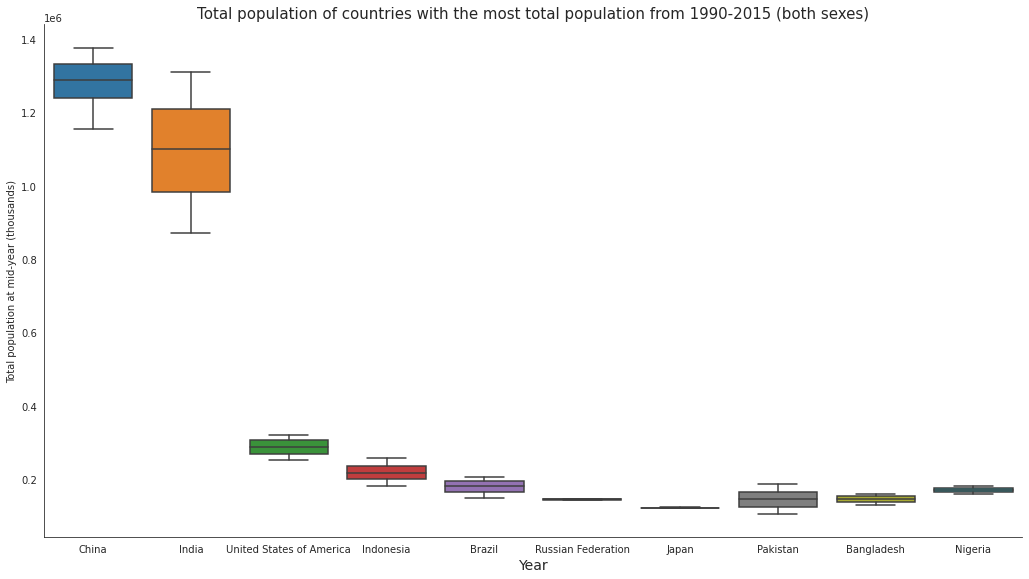

In [481]:
#Small multiple Box plot-- Total population of countries with the most total population from 1990-2015 (both sexes)
sns.catplot(data=tidy_both_c2, kind="box", y="Total population of both sexes at mid-year (thousands)", x="Country", height=8,aspect=1.8)
plt.xlabel('Year', fontsize=14);
plt.ylabel('Total population at mid-year (thousands)', fontsize=10);
plt.title('Total population of countries with the most total population from 1990-2015 (both sexes)', fontsize=15)



# Table 3


In [482]:
tidy3_gender_maj_area.head()

Major Area Notes Country Code  Year   Sex  \
1                           Africa   NaN          903  1990  Male   
2                             Asia   NaN          935  1990  Male   
3                           Europe   NaN          908  1990  Male   
4  Latin America and the Caribbean   NaN          904  1990  Male   
5                 Northern America   NaN          905  1990  Male   

  International migrant stock as a percentage of the total population  
1                                           2.627838                   
2                                           1.591199                   
3                                            6.89398                   
4                                           1.620362                   
5                                           9.797857

Text(0.5, 1.0, 'International migrant stock as a percentage of the total population in Major areas from 1990-2015')

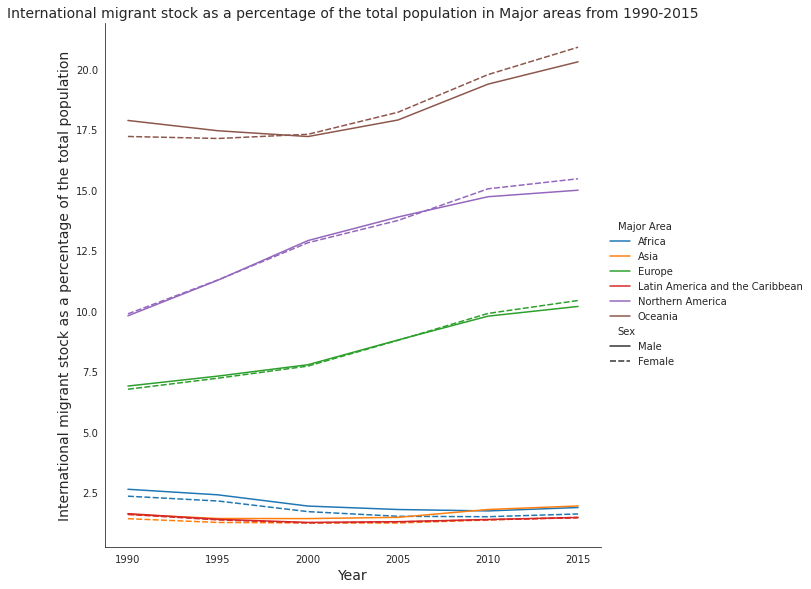

In [483]:
#Seaborn line graph -- International migrant stock as a percentage of the total population in major area for male and female

sns.relplot(data=tidy3_gender_maj_area, x="Year", y="International migrant stock as a percentage of the total population", hue="Major Area", style = "Sex", kind="line", height=8)


plt.xlabel('Year', fontsize=14);
plt.ylabel('International migrant stock as a percentage of the total population', fontsize=14);
plt.title('International migrant stock as a percentage of the total population in Major areas from 1990-2015', fontsize=14)

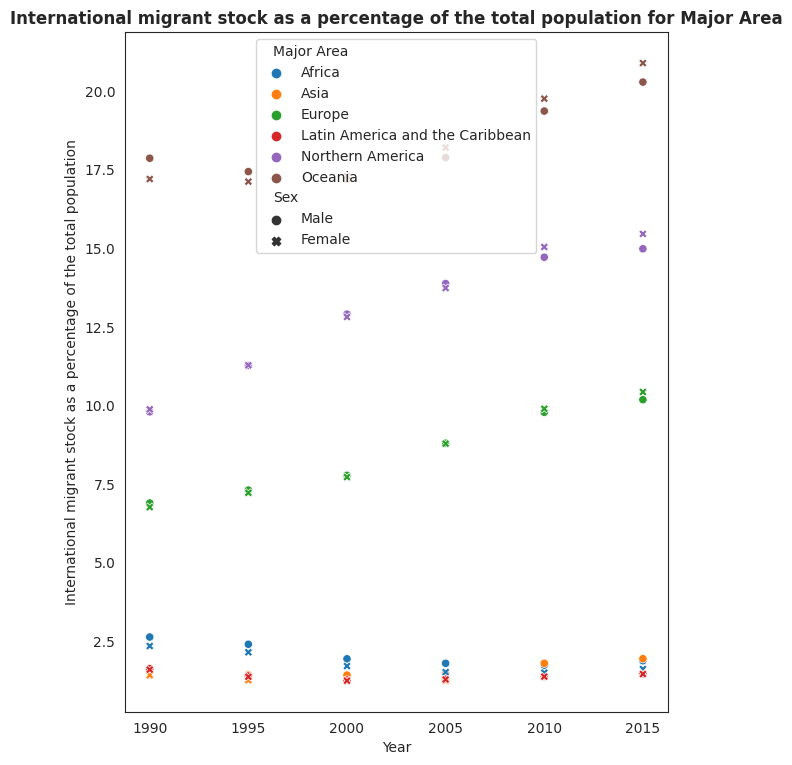

In [484]:
#Seaborn scatterplot graph -- International migrant stock as a percentage of the total population in major area for male and female
f33sex, ax = plt.subplots(figsize=(7,9),dpi=100)
ax.set_title('International migrant stock as a percentage of the total population for Major Area',fontweight="bold")
ax.set_ylabel('International migrant stock as a percentage of the total population')
sns.scatterplot(y="International migrant stock as a percentage of the total population",x="Year", hue = "Major Area", style = "Sex", data=tidy3_gender_maj_area)

Text(0.5, 1.0, 'International migrant stock as a percentage of the total population for Major Area')

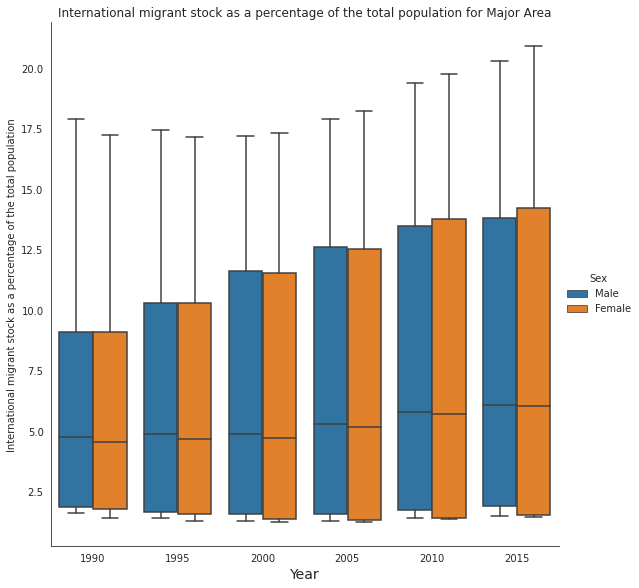

In [485]:
#Box plot for Total population at mid-year (thousands)in major area for male and femle
sns.catplot(data=tidy3_gender_maj_area, kind="box", x="Year", y="International migrant stock as a percentage of the total population", hue="Sex", height=8)
plt.xlabel('Year', fontsize=14);
plt.ylabel('International migrant stock as a percentage of the total population', fontsize=10);
plt.title('International migrant stock as a percentage of the total population for Major Area', fontsize=12)

In [486]:
#histogram -- International migrant stock as a percentage of the total populationn in major area for male and female
import plotly.express as px

fig = px.histogram(tidy3_gender_maj_area, x="Year", y="International migrant stock as a percentage of the total population",
                    color="Sex", facet_col="Major Area", color_discrete_sequence=["green", "Brown"],
       facet_col_wrap=3, width=1000, height=800,
       title="International migrant stock as a percentage of the total populationn in major area for male and female")

fig.update_layout(
    xaxis_title="Year",
    yaxis_title=" ")

fig.show()


In [487]:
#apply Tufte's principle, the background is blue and we want to use least ink possible- minimalistic, so we change the background color 
#styling the fig
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')

#tufte's principle, redundent names"region"
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

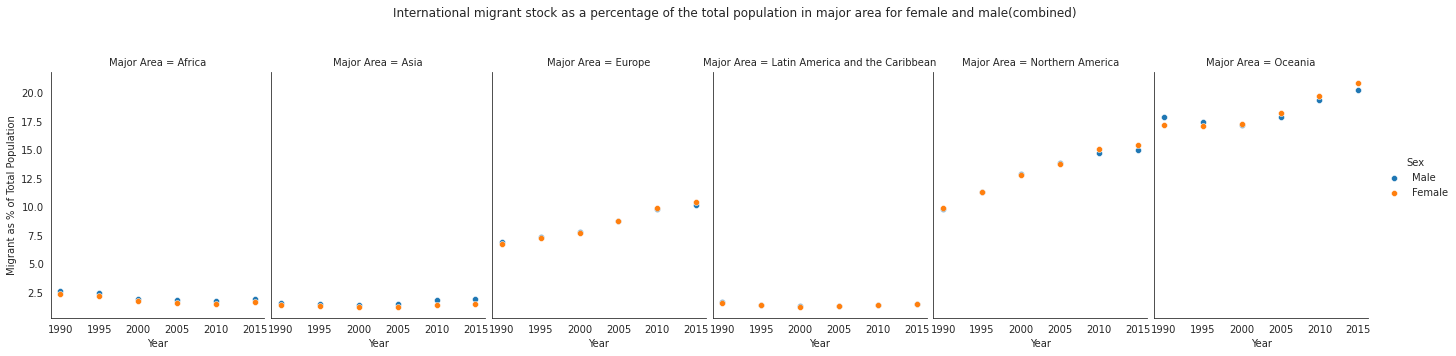

In [488]:
##seaborn.FacetGrid scatterplot -- Total population at mid-year (thousands) in major area for female and male (Combined)version
df3 = sns.FacetGrid(tidy3_gender_maj_area,col='Major Area', hue='Sex', height=5)
df3.map_dataframe(sns.scatterplot, x='Year', y='International migrant stock as a percentage of the total population')
df3.set_axis_labels('Year','Migrant as % of Total Population');

df3.fig.subplots_adjust(top=0.8)
df3.fig.suptitle('International migrant stock as a percentage of the total population in major area for female and male(combined)')
df3.figure.set_size_inches(19,5)
df3.add_legend()

Text(0.5, 0.98, 'International migrant stock as a percentage of the total population in major area for female and male')

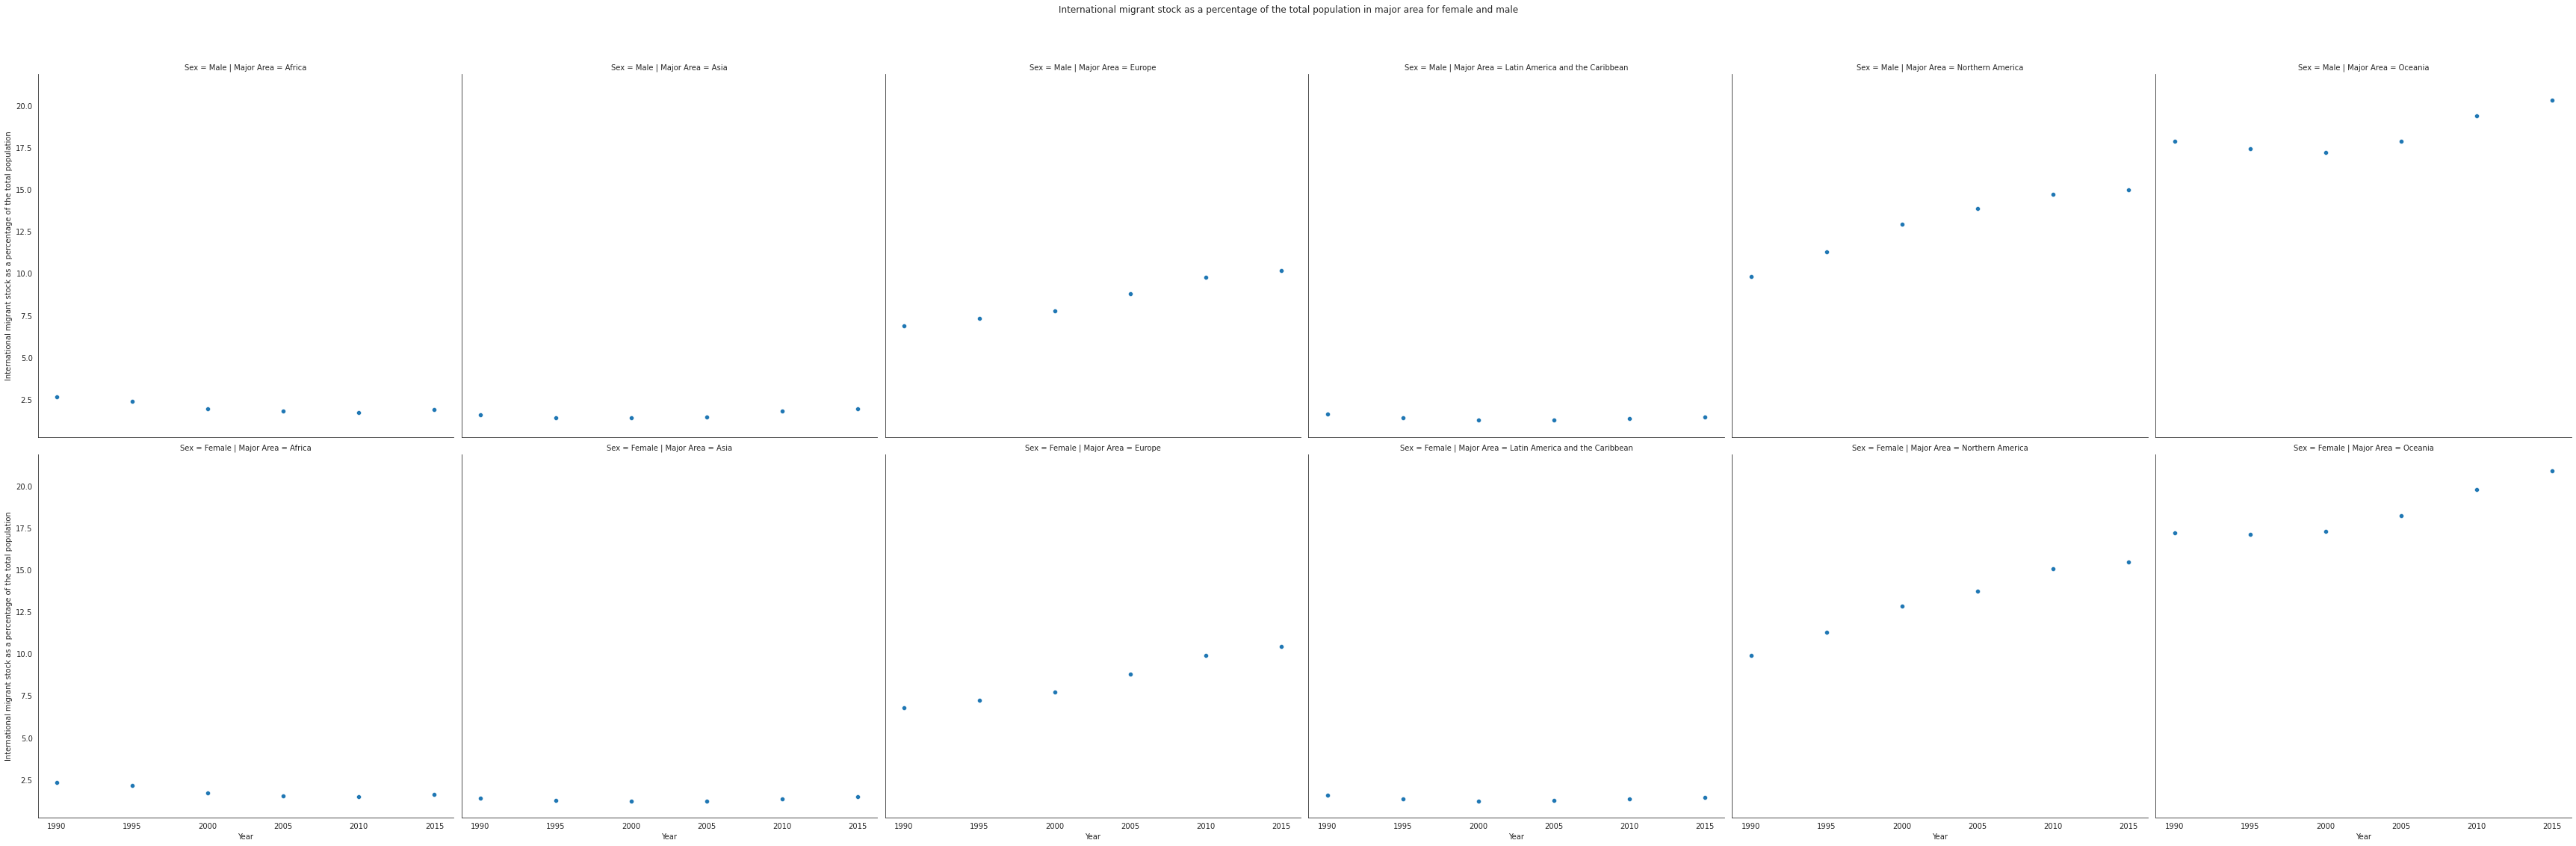

In [489]:
#seaborn.FacetGrid scatterplot -- Total population at mid-year (thousands) in major area for female and male
df1 = sns.FacetGrid(tidy3_gender_maj_area,col='Major Area',row='Sex', height=8)
df1.map_dataframe(sns.scatterplot, x='Year', y='International migrant stock as a percentage of the total population')
df1.set_axis_labels('Year','International migrant stock as a percentage of the total population');
df1.fig.subplots_adjust(top=0.9)
df3.figure.set_size_inches(19,5)
df1.fig.suptitle('International migrant stock as a percentage of the total population in major area for female and male')

Table 3- Sex- Region

In [490]:
tidy3_gender_region.head()

Region Notes Country Code  Year   Sex  \
1   Eastern Africa   NaN          910  1990  Male   
2    Middle Africa   NaN          911  1990  Male   
3  Northern Africa   NaN          912  1990  Male   
4  Southern Africa   NaN          913  1990  Male   
5   Western Africa   NaN          914  1990  Male   

  International migrant stock as a percentage of the total population  
1                                           3.127208                   
2                                           2.124993                   
3                                           1.746067                   
4                                           4.050495                   
5                                           2.640948

In [491]:
#create a new table that shows the top 5 regions with most international migrant stock for each year for both male and female
dtemp=tidy3_gender_region.sort_values(by='International migrant stock as a percentage of the total population', ascending=False)
data1=(dtemp[(dtemp.Year=="1990")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="1995")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2000")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2005")&(dtemp.Sex=="Male")].head (5))
data1=data1.append(dtemp[(dtemp.Year=="2010")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2015")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="1990")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="1995")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2000")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2005")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2010")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2015")&(dtemp.Sex=="Female")].head(5))
tidy_gender_r3=re_index(data1)

tidy_gender_r3.rename(columns={"International migrant stock as a percentage of the total population": "Migrant as % of the total population"},inplace=True)
tidy_gender_r3.head()

Region Notes Country Code  Year   Sex  \
1                 Micronesia   NaN          954  1990  Male   
2  Australia and New Zealand   NaN          927  1990  Male   
3               Central Asia   NaN         5500  1990  Male   
4               Western Asia   NaN          922  1990  Male   
5                  Polynesia   NaN          957  1990  Male   

  Migrant as % of the total population  
1                            28.343618  
2                            22.273081  
3                            12.018987  
4                            11.829791  
5                            11.529571

In [492]:
#Histogram of top 5 regions with highest percentage of migrant as a % of the total population from 1990-2015
import plotly.express as px

fig= px.histogram(tidy_gender_r3, x="Year", y="Migrant as % of the total population", color="Sex", barmode="group", facet_col="Region",
       facet_col_wrap=4, width=900, height=950, color_discrete_sequence=["green", "Brown"],
       title="Regions with highest percentage of migrant as a % of the total population from 1990-2015")

fig.show()


In [493]:

#apply Tufte's principle, the background is blue and we want to use least ink possible- minimalistic, so we change the background color 
#styling the fig
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
#tufte's principle, redundent names"region"
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

In [494]:
tidy_gender_country33.head(10)

Country Notes Country Code Type of data(a)  Year   Sex  \
1      Burundi   NaN          108             B R  1990  Male   
2      Comoros   NaN          174               B  1990  Male   
3     Djibouti   NaN          262             B R  1990  Male   
4      Eritrea   NaN          232               I  1990  Male   
5     Ethiopia   NaN          231             B R  1990  Male   
6        Kenya   NaN          404             B R  1990  Male   
7   Madagascar   NaN          450               C  1990  Male   
8       Malawi   NaN          454             B R  1990  Male   
9    Mauritius   (1)          480               C  1990  Male   
10     Mayotte   NaN          175               B  1990  Male   

   International migrant stock as a percentage of the total population  
1                                            5.926147                   
2                                            3.226039                   
3                                           21.708292                   
4                                            0.399619                   
5                                            2.533977                   
6                                            1.377362                   
7                                            0.231552                   
8                                           11.821321                   
9                                            0.334825                   
10                                          18.119905

In [495]:
#create a new table that shows the top 8 countries with most total population for each year for both male and female
dtemp=tidy_gender_country33.sort_values(by='International migrant stock as a percentage of the total population', ascending=False)
data1=(dtemp[(dtemp.Year=="1990")&(dtemp.Sex=="Male")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="1995")&(dtemp.Sex=="Male")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2000")&(dtemp.Sex=="Male")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2005")&(dtemp.Sex=="Male")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2010")&(dtemp.Sex=="Male")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2015")&(dtemp.Sex=="Male")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="1990")&(dtemp.Sex=="Female")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="1995")&(dtemp.Sex=="Female")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2000")&(dtemp.Sex=="Female")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2005")&(dtemp.Sex=="Female")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2010")&(dtemp.Sex=="Female")].head(8))
data1=data1.append(dtemp[(dtemp.Year=="2015")&(dtemp.Sex=="Female")].head(8))
tidy_gender_c3=re_index(data1)
tidy_gender_c3.rename(columns={"International migrant stock as a percentage of the total population": "Migrant Percentage"},inplace=True)
tidy_gender_c3.head(10)

Country Notes Country Code  \
1                         United Arab Emirates   NaN          784   
2                                        Qatar   NaN          634   
3                                       Kuwait   NaN          414   
4                                French Guiana   NaN          254   
5                                         Guam   NaN          316   
6   China, Macao Special Administrative Region   (7)          446   
7                 United States Virgin Islands   NaN          850   
8                                      Bahrain   NaN           48   
9                         United Arab Emirates   NaN          784   
10                                       Qatar   NaN          634   

   Type of data(a)  Year   Sex Migrant Percentage  
1              C R  1990  Male          78.220652  
2                C  1990  Male          70.824856  
3              C R  1990  Male          59.639818  
4                B  1990  Male          57.757849  
5                B  1990  Male          56.550159  
6                B  1990  Male          55.055153  
7                B  1990  Male          49.639065  
8                C  1990  Male          42.886945  
9              C R  1995  Male          83.627765  
10               C  1995  Male          81.775748

In [496]:
#Histogram for top 8 countries with highest percentage of migrant as a % of the total population for male/female from 1990-2015
fig = px.histogram(tidy_gender_c3, x="Year", y="Migrant Percentage", 
                   facet_col="Country", color="Sex", barmode="group", facet_col_wrap=3,height=1100,
                   color_discrete_sequence=["green", "Brown"],
                  title="Countries with highest % of migrant as a percentage of the total population for male/female from 1990-2015")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_yaxes(matches=None)
#apply Tufte's principle, the background is blue and we want to use least ink possible- minimalistic, so we change the background color 
#styling the fig
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')

fig.show()

Both Sexes(sum)

In [497]:
tidy3_both_area.head()

Major Area Notes Country Code  Year  \
1                           Africa   NaN          903  1990   
2                             Asia   NaN          935  1990   
3                           Europe   NaN          908  1990   
4  Latin America and the Caribbean   NaN          904  1990   
5                 Northern America   NaN          905  1990   

  International migrant stock as a percentage of the total population(both sexes)  
1                                            2.48421                               
2                                           1.503283                               
3                                           6.825702                               
4                                           1.604365                               
5                                           9.838663

Text(0.5, 1.0, 'Box plot for Total population at mid-year (thousands)in major area for male and femle')

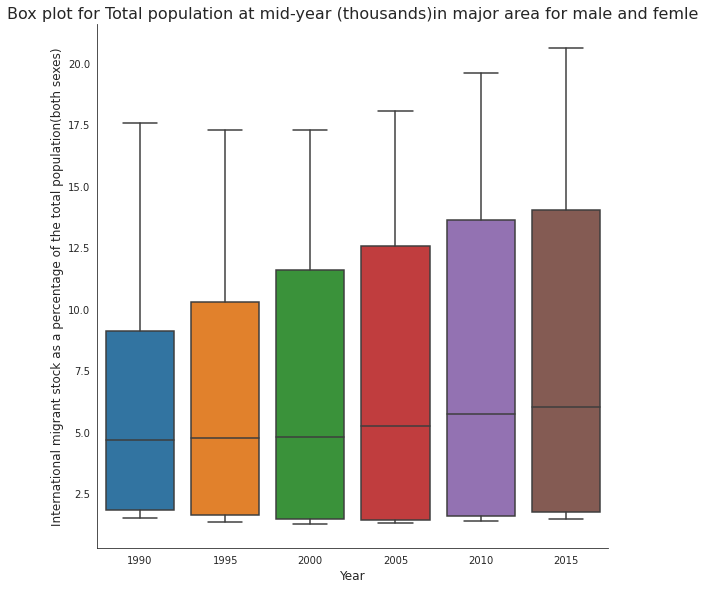

In [498]:
#Box plot for Total population at mid-year (thousands)in major area for male and femle
sns.catplot(data=tidy3_both_area, kind="box", x="Year", y="International migrant stock as a percentage of the total population(both sexes)", height=8)
plt.xlabel('Year', fontsize=12);
plt.ylabel('International migrant stock as a percentage of the total population(both sexes)', fontsize=12);
plt.title('Box plot for Total population at mid-year (thousands)in major area for male and femle', fontsize=16)



In [499]:
tidy_both_country33.head(10)

Country Notes Country Code Type of data(a)  Year  \
1      Burundi   NaN          108             B R  1990   
2      Comoros   NaN          174               B  1990   
3     Djibouti   NaN          262             B R  1990   
4      Eritrea   NaN          232               I  1990   
5     Ethiopia   NaN          231             B R  1990   
6        Kenya   NaN          404             B R  1990   
7   Madagascar   NaN          450               C  1990   
8       Malawi   NaN          454             B R  1990   
9    Mauritius   (1)          480               C  1990   
10     Mayotte   NaN          175               B  1990   

   International migrant stock as a percentage of the total population(both sexes)  
1                                            5.934467                               
2                                            3.391353                               
3                                           20.773307                               
4                                            0.377435                               
5                                            2.404203                               
6                                            1.267974                               
7                                            0.207149                               
8                                           11.985591                               
9                                            0.342184                               
10                                          16.067736

In [500]:
#create a new table that shows the top 8 regions with the most population for each year 
dtemp=tidy_both_country33.sort_values(by='International migrant stock as a percentage of the total population(both sexes)', ascending=False)
data1=dtemp[dtemp.Year=="1990"].head(8)
data1=data1.append(dtemp[dtemp.Year=="1995"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2000"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2005"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2010"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2015"].head(8))
tidy_both_c3=re_index(data1)
tidy_both_c3.rename(columns={"International migrant stock as a percentage of the total population(both sexes)": "Migrant Percentage"}, inplace=True)
tidy_both_c3.head(10)

Country Notes Country Code  \
1                                     Holy See  (17)          336   
2                         United Arab Emirates   NaN          784   
3                                      Andorra   NaN           20   
4                                       Monaco   NaN          492   
5                                        Qatar   NaN          634   
6                     Northern Mariana Islands   NaN          580   
7   China, Macao Special Administrative Region   (7)          446   
8                                French Guiana   NaN          254   
9                                     Holy See  (17)          336   
10                        United Arab Emirates   NaN          784   

   Type of data(a)  Year Migrant Percentage  
1                I  1990                100  
2              C R  1990          72.128308  
3                C  1990          71.369081  
4                B  1990           69.15891  
5                C  1990          65.008878  
6                B  1990          60.477122  
7                B  1990          56.999458  
8                B  1990          54.941183  
9                I  1995          99.743918  
10             C R  1995          77.615701

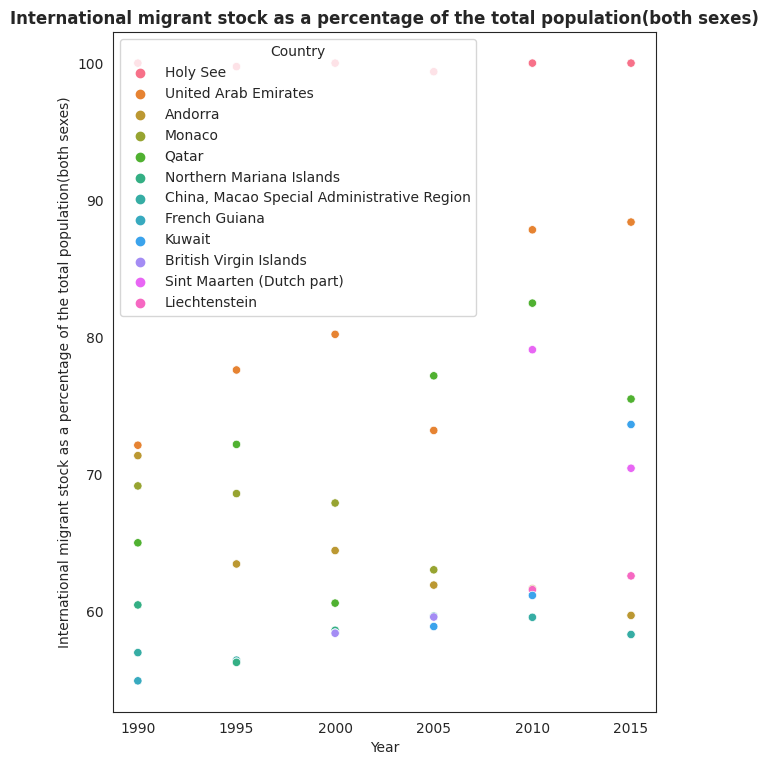

In [501]:
#Scatterplot for countries with highest percentage of migrant each year
f33cboth, ax = plt.subplots(figsize=(7,9),dpi=100)
ax.set_title('International migrant stock as a percentage of the total population(both sexes)',fontweight="bold")
ax.set_ylabel('International migrant stock as a percentage of the total population(both sexes)')
sns.scatterplot(y="Migrant Percentage", hue = "Country",x="Year", data=tidy_both_c3)

Text(0.5, 1.0, 'Countries with highest % of migrant over total population from 1990-2015')

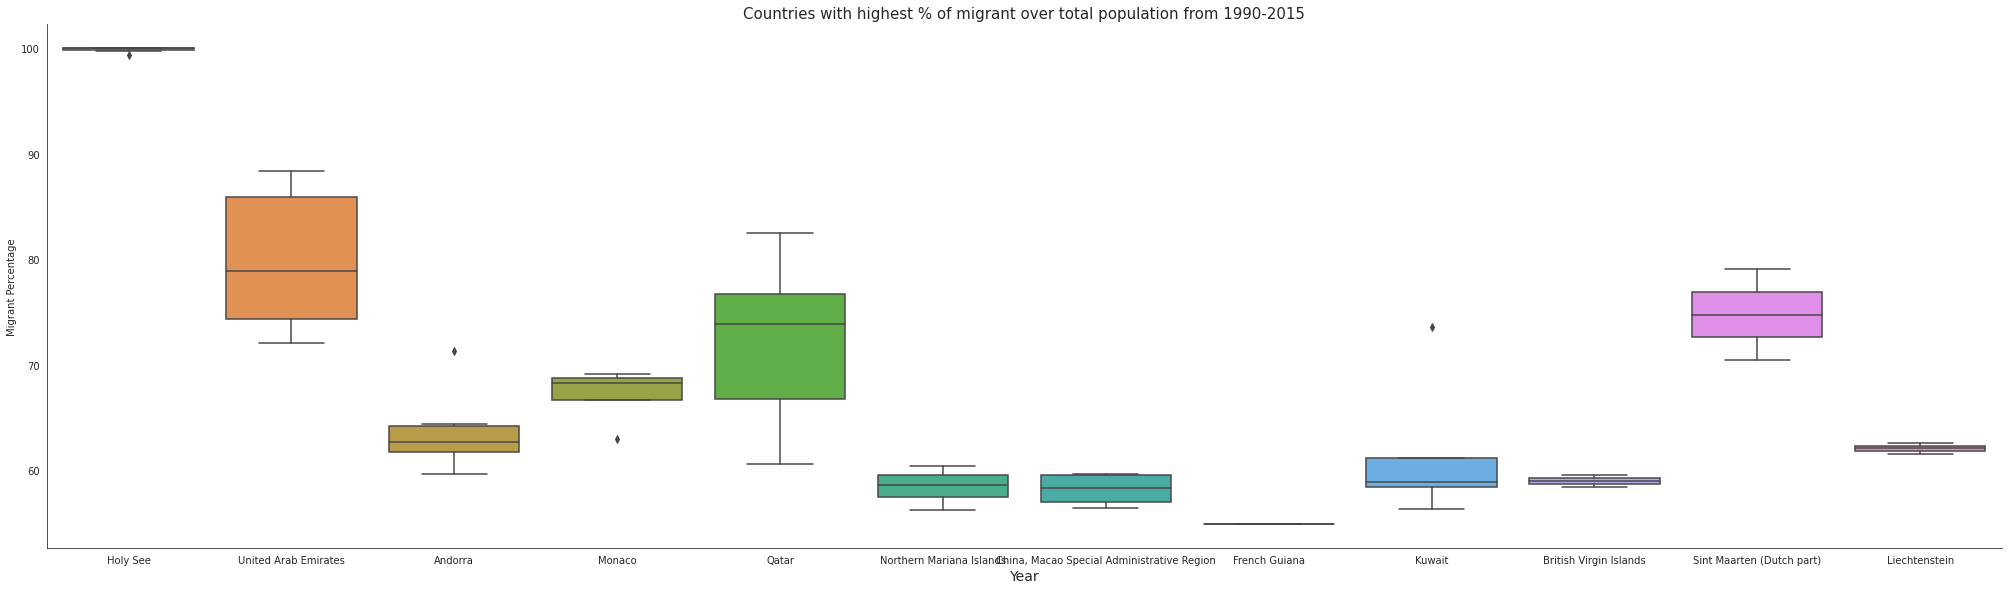

In [502]:
#Box plot-- Countries with highest % of migrant over total population from 1990-2015 (both sexes)
sns.catplot(data=tidy_both_c3, kind="box", y="Migrant Percentage", x="Country", height=8,aspect=3.5)
plt.xlabel('Year', fontsize=14);
plt.ylabel('Migrant Percentage', fontsize=10);
plt.title('Countries with highest % of migrant over total population from 1990-2015', fontsize=15)

In [503]:
#Seaborn-Small Multiple line chart-- Total population of countries with the most total population from 1990-2015 (both sexes)
import plotly.express as px

fig = px.line(tidy_both_c3, x="Year", y="Migrant Percentage",facet_col="Country", facet_col_wrap=4,
              height=900, width=1500,
              title="Countries with highest % of migrant over total population from 1990-2015")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_yaxes(showticklabels=True)
fig.show()

In [504]:

#Histogram for top 8 countries with highest percentage of migrant as a % of the total population for male/female from 1990-2015
fig = px.histogram(tidy_both_c3, x="Year", y="Migrant Percentage", 
                   facet_col="Country", barmode="group", facet_col_wrap=3,height=1100,
                   color_discrete_sequence=["green", "Brown"],
                  title="Countries with highest % of migrant as a percentage of the total population from 1990-2015")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_yaxes(matches=None)

#apply Tufte's principle, the background is blue and we want to use least ink possible- minimalistic, so we change the background color 
#styling the fig
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')

fig.show()

#Table 4

In [505]:
tidy_female_area44.head()

Major Area Notes Country Code  Year  \
1                           Africa   NaN          903  1990   
2                             Asia   NaN          935  1990   
3                           Europe   NaN          908  1990   
4  Latin America and the Caribbean   NaN          904  1990   
5                 Northern America   NaN          905  1990   

  Female migrants as a percentage of the international migrant stock  
1                                          47.232408                  
2                                           45.96873                  
3                                          51.346887                  
4                                          49.830217                  
5                                          51.115342

Text(0.5, 1.0, 'Female migrants as a percentage of the international migrant stock in Major Area')

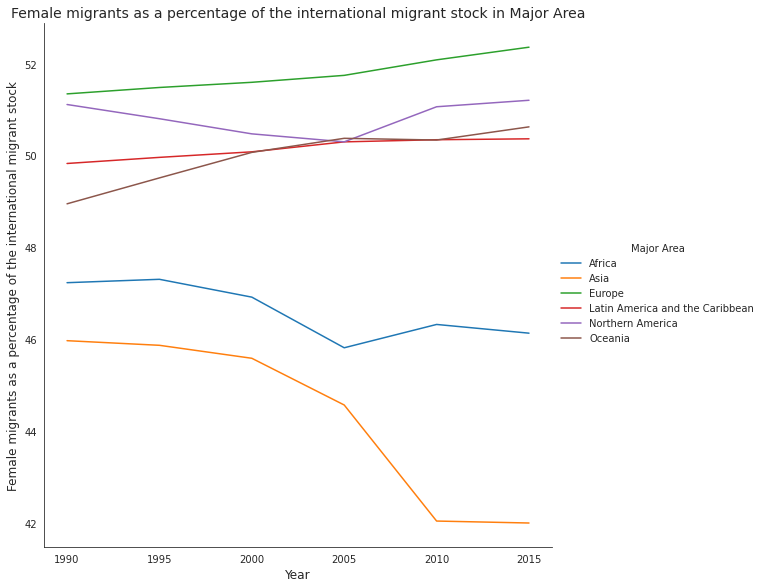

In [506]:
#Seaborn line graph -- Female migrants as a percentage of the international migrant stock in Major Area

sns.relplot(data=tidy_female_area44, x="Year", y="Female migrants as a percentage of the international migrant stock", hue="Major Area", kind="line", height=8)


plt.xlabel('Year', fontsize=12);
plt.ylabel('Female migrants as a percentage of the international migrant stock', fontsize=12);
plt.title('Female migrants as a percentage of the international migrant stock in Major Area', fontsize=14)

Text(0.5, 1.0, 'Female migrants as a percentage of the international migrant stock in Major Area')

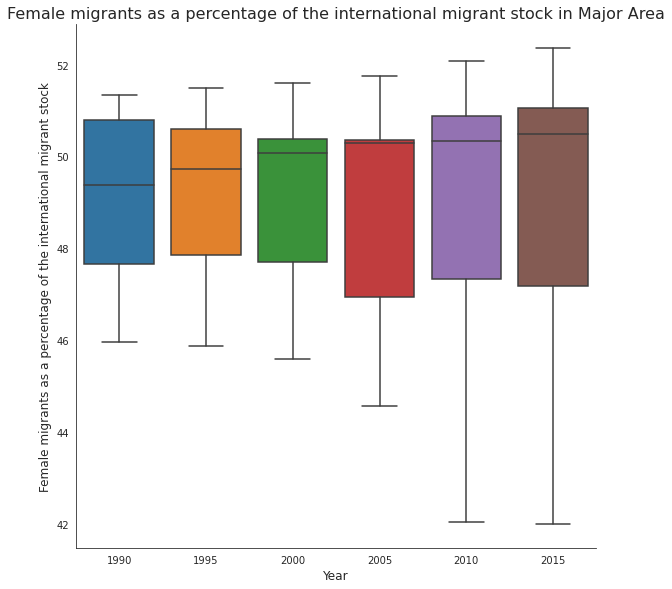

In [507]:
#Box plot for Total population at mid-year (thousands)in major area for male and femle
sns.catplot(data=tidy_female_area44, kind="box", x="Year", y="Female migrants as a percentage of the international migrant stock", height=8)
plt.xlabel('Year', fontsize=12);
plt.ylabel('Female migrants as a percentage of the international migrant stock', fontsize=12);
plt.title('Female migrants as a percentage of the international migrant stock in Major Area', fontsize=16)

In [508]:
tidy_female_country44.head(10)

Country Notes Country Code Type of data(a)  Year  \
1      Burundi   NaN          108             B R  1990   
2      Comoros   NaN          174               B  1990   
3     Djibouti   NaN          262             B R  1990   
4      Eritrea   NaN          232               I  1990   
5     Ethiopia   NaN          231             B R  1990   
6        Kenya   NaN          404             B R  1990   
7   Madagascar   NaN          450               C  1990   
8       Malawi   NaN          454             B R  1990   
9    Mauritius   (1)          480               C  1990   
10     Mayotte   NaN          175               B  1990   

   Female migrants as a percentage of the international migrant stock  
1                                           50.987061                  
2                                           52.290646                  
3                                           47.437838                  
4                                           47.434166                  
5                                           47.439047                  
6                                           45.894272                  
7                                           44.190325                  
8                                           51.537788                  
9                                           51.203986                  
10                                          42.346838

In [509]:
#create a new table that shows the top 8 regions with the most population for each year 
dtemp=tidy_female_country44.sort_values(by='Female migrants as a percentage of the international migrant stock', ascending=False)
data1=dtemp[dtemp.Year=="1990"].head(8)
data1=data1.append(dtemp[dtemp.Year=="1995"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2000"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2005"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2010"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2015"].head(8))
tidy_c4=re_index(data1)
tidy_c4.rename(columns={"Female migrants as a percentage of the international migrant stock": "Female Migrant%"},inplace=True)

tidy_c4.head(10)

Country Notes Country Code  \
1                                       Nepal   NaN          524   
2                                     Armenia   NaN           51   
3   The former Yugoslav Republic of Macedonia   NaN          807   
4                                  Kyrgyzstan   NaN          417   
5                                    Barbados   NaN           52   
6                                    Bulgaria   NaN          100   
7                                     Romania   NaN          642   
8                                   Guatemala   NaN          320   
9                                       Nepal   NaN          524   
10                                    Armenia   NaN           51   

   Type of data(a)  Year Female Migrant%  
1              B R  1990        70.70381  
2              B R  1990         58.9345  
3                B  1990       58.313889  
4                B  1990       58.205247  
5                B  1990       58.104396  
6                B  1990       57.940493  
7                B  1990       57.591754  
8              B R  1990       57.384289  
9              B R  1995       68.548227  
10             B R  1995       58.934379

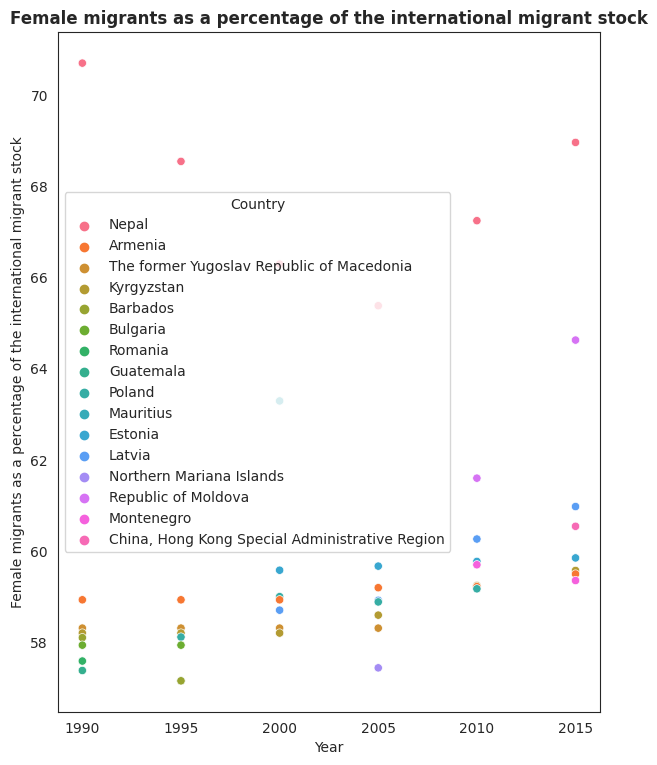

In [510]:
#Scatterplot for total population in top 8 countries each year
f44cboth, ax = plt.subplots(figsize=(7,9),dpi=100)
ax.set_title('Female migrants as a percentage of the international migrant stock',fontweight="bold")
ax.set_ylabel('Female migrants as a percentage of the international migrant stock')
sns.scatterplot(y="Female Migrant%", hue = "Country",x="Year", data=tidy_c4)

In [511]:
#histogram -- Total population at mid-year (thousands) in major area for male and female
import plotly.express as px

fig = px.histogram(tidy_c4, x="Year", y="Female Migrant%", facet_col="Country", color_discrete_sequence=["purple"],
       facet_col_wrap=3, width=1000, height=1200,
       title="Countries with highest percentage of Female migrants as a % of the international migrant stock from 1990-2015")

fig.show()

# Table 5


Major Area - Male/Female

In [512]:
tidy_gender_maj_area55.head()

Major Area Notes Country Code       Year   Sex  \
1                           Africa   NaN          903  1990-1995  Male   
2                             Asia   NaN          935  1990-1995  Male   
3                           Europe   NaN          908  1990-1995  Male   
4  Latin America and the Caribbean   NaN          904  1990-1995  Male   
5                 Northern America   NaN          905  1990-1995  Male   

  Annual rate of change of the migrant stock  
1                                   0.798774  
2                                   -0.63615  
3                                   1.363213  
4                                  -1.424381  
5                                   3.898245

Text(0.5, 1.0, 'Annual rate of change of the migrant stock in major area for male and female')

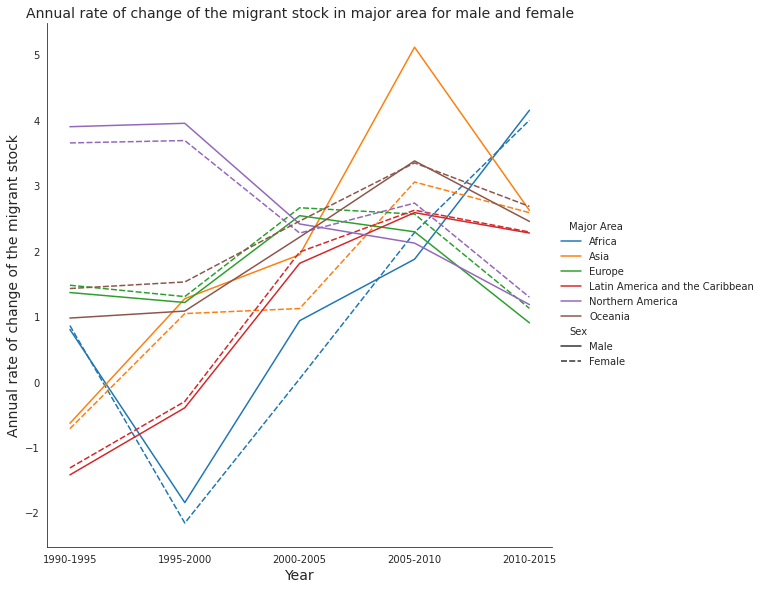

In [513]:
#Seaborn line graph -- Annual rate of change of the migrant stock in major area for male and female

sns.relplot(data=tidy_gender_maj_area55, x="Year", y="Annual rate of change of the migrant stock", hue="Major Area", style = "Sex", kind="line", height=8)


plt.xlabel('Year', fontsize=14);
plt.ylabel('Annual rate of change of the migrant stock', fontsize=14);
plt.title('Annual rate of change of the migrant stock in major area for male and female', fontsize=14)

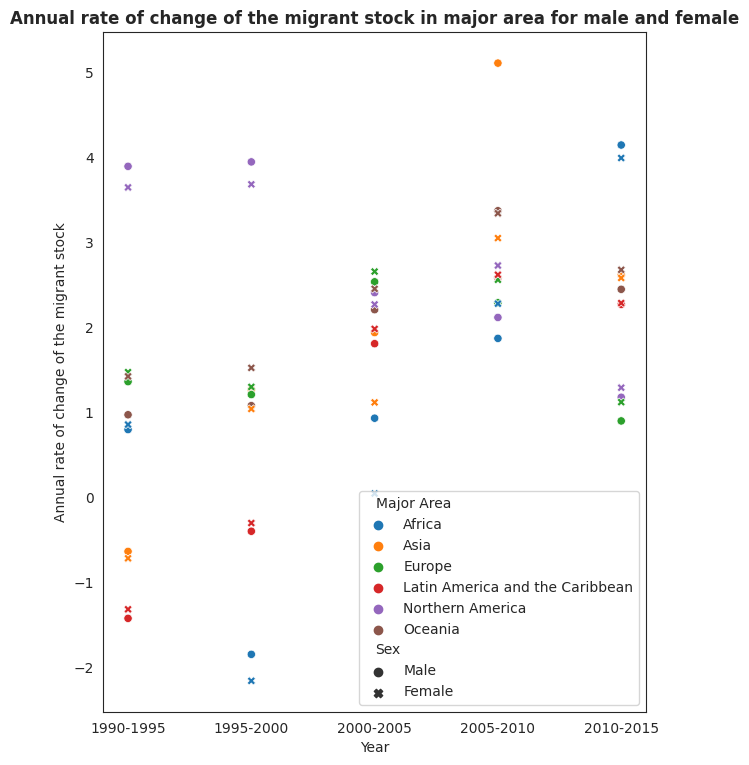

In [514]:
#Seaborn scatterplot graph -- Annual rate of change of the migrant stock in major area for male and female
f33sex, ax = plt.subplots(figsize=(7,9),dpi=100)
ax.set_title('Annual rate of change of the migrant stock in major area for male and female',fontweight="bold")
ax.set_ylabel('Annual rate of change of the migrant stock')
sns.scatterplot(y="Annual rate of change of the migrant stock",x="Year", hue = "Major Area", style = "Sex", data=tidy_gender_maj_area55)

Text(0.5, 1.0, 'Annual rate of change of the migrant stock in major area for male and female')

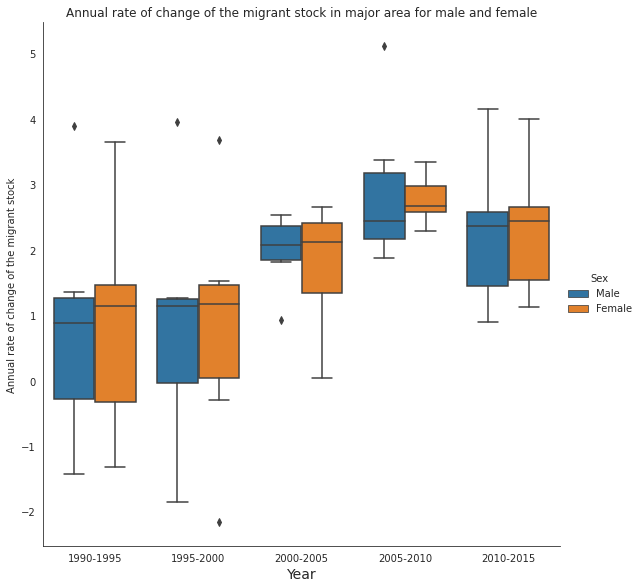

In [515]:
##Box plot for Annual rate of change of the migrant stock in major area for male and female
sns.catplot(data=tidy_gender_maj_area55, kind="box", x="Year", y="Annual rate of change of the migrant stock", hue="Sex", height=8)
plt.xlabel('Year', fontsize=14);
plt.ylabel('Annual rate of change of the migrant stock', fontsize=10);
plt.title('Annual rate of change of the migrant stock in major area for male and female', fontsize=12)

In [516]:
#histogram -- Annual rate of change of the migrant stock in major area for male and female
import plotly.express as px

fig = px.histogram(tidy_gender_maj_area55, x="Year", y="Annual rate of change of the migrant stock",
                    color="Sex", facet_col="Major Area", color_discrete_sequence=["yellow", "green"],
       facet_col_wrap=3, width=1000, height=900,
       title="Annual rate of change of the migrant stock in major area for male and female")


fig.show()

In [517]:
#apply Tufte's principle, the background is blue and we want to use least ink possible- minimalistic, so we change the background color 
#styling the fig
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')

fig.show()

In [518]:
tidy_gender_region55.head()

Region Notes Country Code       Year   Sex  \
1   Eastern Africa   NaN          910  1990-1995  Male   
2    Middle Africa   NaN          911  1990-1995  Male   
3  Northern Africa   NaN          912  1990-1995  Male   
4  Southern Africa   NaN          913  1990-1995  Male   
5   Western Africa   NaN          914  1990-1995  Male   

  Annual rate of change of the migrant stock  
1                                  -3.446375  
2                                  11.845106  
3                                   -2.13921  
4                                  -3.266338  
5                                   3.611415

In [519]:
#create a new table that shows the regions with the highest positive annual rate of change of migrant stock for each year for both male and female
dtemp=tidy_gender_region55.sort_values(by='Annual rate of change of the migrant stock', ascending=False)
data1=(dtemp[(dtemp.Year=="1990-1995")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="1995-2000")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2000-2005")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2005-2010")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2010-2015")&(dtemp.Sex=="Male")].head(5))

data1=data1.append(dtemp[(dtemp.Year=="1990-1995")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="1995-2000")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2000-2005")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2005-2010")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2010-2015")&(dtemp.Sex=="Female")].head(5))

tidy_gender_r5=re_index(data1)

tidy_gender_r5.head()

Region Notes Country Code       Year   Sex  \
1       Middle Africa   NaN          911  1990-1995  Male   
2     Southern Europe   NaN          925  1990-1995  Male   
3  South-Eastern Asia   NaN          920  1990-1995  Male   
4    Northern America   NaN          905  1990-1995  Male   
5      Western Africa   NaN          914  1990-1995  Male   

  Annual rate of change of the migrant stock  
1                                  11.845106  
2                                   6.513014  
3                                   4.754454  
4                                   3.898245  
5                                   3.611415

In [520]:
#Histogram of top 5 regions with highest percentage of migrant as a % of the total population from 1990-2015
import plotly.express as px

fig= px.histogram(tidy_gender_r5, x="Year", y="Annual rate of change of the migrant stock", color="Sex", barmode="group", facet_col="Region",
       facet_col_wrap=5, width=1200, height=1200, color_discrete_sequence=["yellow", "green"],
       title="Regions with the highest positive annual rate of change of migrant stock for each year for both male and female")

fig.show()

In [521]:
#apply Tufte's principle, the background is blue and we want to use least ink possible- minimalistic, so we change the background color 
#styling the fig
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
#tufte's principle, redundent names"region"
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

In [522]:
#create a new table that shows the regions with the highest negative annual rate of change of migrant stock for each year for both male and female
dtemp=tidy_gender_region55.sort_values(by='Annual rate of change of the migrant stock', ascending=True)
data1=(dtemp[(dtemp.Year=="1990-1995")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="1995-2000")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2000-2005")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2005-2010")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2010-2015")&(dtemp.Sex=="Male")].head(5))

data1=data1.append(dtemp[(dtemp.Year=="1990-1995")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="1995-2000")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2000-2005")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2005-2010")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2010-2015")&(dtemp.Sex=="Female")].head(5))

tidy_gender_r5t=re_index(data1)

tidy_gender_r5t.head(10)

Region Notes Country Code       Year   Sex  \
1   Central America   NaN          916  1990-1995  Male   
2     Southern Asia   NaN         5501  1990-1995  Male   
3    Eastern Africa   NaN          910  1990-1995  Male   
4   Southern Africa   NaN          913  1990-1995  Male   
5      Central Asia   NaN         5500  1990-1995  Male   
6     Middle Africa   NaN          911  1995-2000  Male   
7   Central America   NaN          916  1995-2000  Male   
8      Central Asia   NaN         5500  1995-2000  Male   
9    Western Africa   NaN          914  1995-2000  Male   
10  Northern Africa   NaN          912  1995-2000  Male   

   Annual rate of change of the migrant stock  
1                                   -6.791343  
2                                    -4.69664  
3                                   -3.446375  
4                                   -3.266338  
5                                   -2.405971  
6                                   -7.960934  
7                                   -2.955229  
8                                   -2.586275  
9                                   -1.184923  
10                                  -1.055656

In [523]:
#Histogram of top 5 regions with the highest negative annual rate of change of migrant stock for each year for both male and female
import plotly.express as px

fig= px.histogram(tidy_gender_r5t, x="Year", y="Annual rate of change of the migrant stock", color="Sex", barmode="group", facet_col="Region",
       facet_col_wrap=5, width=1200, height=1200, color_discrete_sequence=["yellow", "green"],
       title="Regions with the highest negative annual rate of change of migrant stock for each year for both male and female")

fig.show()

In [524]:
#apply Tufte's principle, the background is blue and we want to use least ink possible- minimalistic, so we change the background color 
#styling the fig
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')

#tufte's principle, redundent names"region"
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

Country- Sex -Male/female

In [525]:
tidy_gender_country55.head()

Country Notes Country Code Type of data(a)       Year   Sex  \
1   Burundi   NaN          108             B R  1990-1995  Male   
2   Comoros   NaN          174               B  1990-1995  Male   
3  Djibouti   NaN          262             B R  1990-1995  Male   
4   Eritrea   NaN          232               I  1990-1995  Male   
5  Ethiopia   NaN          231             B R  1990-1995  Male   

  Annual rate of change of the migrant stock  
1                                  -5.475511  
2                                   -0.30906  
3                                  -4.046026  
4                                   0.983754  
5                                  -7.179744

In [526]:
#create a new table that shows the top 5 regions with the highest positive annual rate of change of migrant stock for each year for both male and female
dtemp=tidy_gender_country55.sort_values(by='Annual rate of change of the migrant stock', ascending=False)
data1=(dtemp[(dtemp.Year=="1990-1995")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="1995-2000")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2000-2005")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2005-2010")&(dtemp.Sex=="Male")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2010-2015")&(dtemp.Sex=="Male")].head(5))

data1=data1.append(dtemp[(dtemp.Year=="1990-1995")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="1995-2000")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2000-2005")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2005-2010")&(dtemp.Sex=="Female")].head(5))
data1=data1.append(dtemp[(dtemp.Year=="2010-2015")&(dtemp.Sex=="Female")].head(5))

tidy_gender_c5=re_index(data1)

tidy_gender_c5.head(10)

Country Notes Country Code Type of data(a)  \
1                             Serbia  (18)          688               B   
2                  Republic of Korea   NaN          410               C   
3   Democratic Republic of the Congo   NaN          180             B R   
4                           Cambodia   NaN          116               B   
5                            Liberia   NaN          430               B   
6                  Republic of Korea   NaN          410               C   
7                          Mauritius   (1)          480               C   
8                              Spain  (19)          724               B   
9                           Slovakia   NaN          703               B   
10                          Maldives   NaN          462             C R   

         Year   Sex Annual rate of change of the migrant stock  
1   1990-1995  Male                                  36.486193  
2   1990-1995  Male                                  21.449171  
3   1990-1995  Male                                  18.184014  
4   1990-1995  Male                                  17.316048  
5   1990-1995  Male                                  14.555329  
6   1995-2000  Male                                  14.096879  
7   1995-2000  Male                                  11.389605  
8   1995-2000  Male                                  10.365056  
9   1995-2000  Male                                  10.360632  
10  1995-2000  Male                                   9.559288

In [527]:
#Histogram of top 8 Countries with the highest positive annual rate of change of migrant stock for each year for both male and female
import plotly.express as px

fig= px.histogram(tidy_gender_c5, x="Year", y="Annual rate of change of the migrant stock", color="Sex", barmode="group", facet_col="Country",
       facet_col_wrap=5, width=1200, height=1200, color_discrete_sequence=["yellow", "green"],
       title="Countries with the highest positive annual rate of change of migrant stock for each year for both male and female")

fig.show()

Both Sexes(sum)
Region

In [528]:
tidy_both_area55.head()

Major Area Notes Country Code       Year  \
1                           Africa   NaN          903  1990-1995   
2                             Asia   NaN          935  1990-1995   
3                           Europe   NaN          908  1990-1995   
4  Latin America and the Caribbean   NaN          904  1990-1995   
5                 Northern America   NaN          905  1990-1995   

  Annual rate of change of the migrant stock (both sexes)  
1                                           0.826734       
2                                          -0.673431       
3                                           1.420702       
4                                           -1.37121       
5                                           3.771892

Text(0.5, 1.0, 'Annual rate of change of the migrant stock (both sexes) in major area')

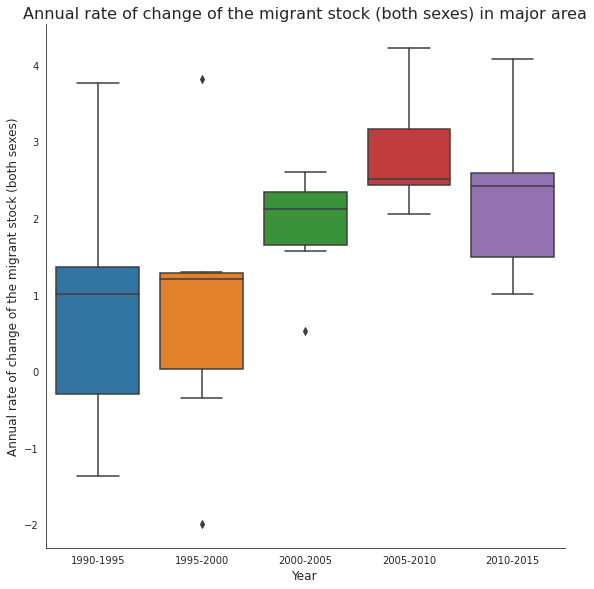

In [529]:
#Box plot for Annual rate of change of the migrant stock (both sexes) in major area
sns.catplot(data=tidy_both_area55, kind="box", x="Year", y="Annual rate of change of the migrant stock (both sexes)", height=8)
plt.xlabel('Year', fontsize=12);
plt.ylabel('Annual rate of change of the migrant stock (both sexes)', fontsize=12);
plt.title('Annual rate of change of the migrant stock (both sexes) in major area', fontsize=16)

In [530]:
tidy_both_country55.head(10)

Country Notes Country Code Type of data(a)       Year  \
1      Burundi   NaN          108             B R  1990-1995   
2      Comoros   NaN          174               B  1990-1995   
3     Djibouti   NaN          262             B R  1990-1995   
4      Eritrea   NaN          232               I  1990-1995   
5     Ethiopia   NaN          231             B R  1990-1995   
6        Kenya   NaN          404             B R  1990-1995   
7   Madagascar   NaN          450               C  1990-1995   
8       Malawi   NaN          454             B R  1990-1995   
9    Mauritius   (1)          480               C  1990-1995   
10     Mayotte   NaN          175               B  1990-1995   

   Annual rate of change of the migrant stock (both sexes)  
1                                           -5.355717       
2                                           -0.199873       
3                                           -4.058465       
4                                            0.910748       
5                                           -7.179771       
6                                           14.659568       
7                                           -2.433476       
8                                          -30.811478       
9                                           14.588616       
10                                          10.939512

In [531]:
#create a new table that shows the top 8 countries with the most population for each year 
dtemp=tidy_both_country55.sort_values(by='Annual rate of change of the migrant stock (both sexes)', ascending=False)
data1=dtemp[dtemp.Year=="1990-1995"].head(8)
data1=data1.append(dtemp[dtemp.Year=="1995-2000"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2000-2005"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2005-2010"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2010-2015"].head(8))
tidy_both_c5=re_index(data1)

tidy_both_c5.head(10)

Country Notes Country Code Type of data(a)  \
1                             Serbia  (18)          688               B   
2                  Republic of Korea   NaN          410               C   
3   Democratic Republic of the Congo   NaN          180             B R   
4                           Cambodia   NaN          116               B   
5                               Iraq   NaN          368             C R   
6                            Liberia   NaN          430               B   
7                           Maldives   NaN          462             C R   
8                              Kenya   NaN          404             B R   
9                          Mauritius   (1)          480               C   
10                 Republic of Korea   NaN          410               C   

         Year Annual rate of change of the migrant stock (both sexes)  
1   1990-1995                                          36.964744       
2   1990-1995                                          21.155328       
3   1990-1995                                          17.585442       
4   1990-1995                                          17.537585       
5   1990-1995                                          17.382315       
6   1990-1995                                          15.734866       
7   1990-1995                                          15.125065       
8   1990-1995                                          14.659568       
9   1995-2000                                          14.592823       
10  1995-2000                                          13.570714

In [532]:
##Seaborn-Small Multiple line chart-- Countries with highest % of Annual rate of change of the migrant from 1990-2015 (both sexes)
import plotly.express as px

fig = px.line(tidy_both_c5, x="Year", y="Annual rate of change of the migrant stock (both sexes)",facet_col="Country", facet_col_wrap=4,
              height=900, width=1500,
              title="Countries with highest % of Annual rate of change of the migrant from 1990-2015 (both sexes)")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_yaxes(showticklabels=True)
fig.show()

# Table 6

##Estimated refugee stock(both sexes)


In [533]:
tidy_both_area66.head(10)

Major Area Notes Country Code  Year  \
1                            Africa   NaN          903  1990   
2                              Asia   NaN          935  1990   
3                            Europe   NaN          908  1990   
4   Latin America and the Caribbean   NaN          904  1990   
5                  Northern America   NaN          905  1990   
6                           Oceania   NaN          909  1990   
7                            Africa   NaN          903  1995   
8                              Asia   NaN          935  1995   
9                            Europe   NaN          908  1995   
10  Latin America and the Caribbean   NaN          904  1995   

   Estimated refugee stock at mid-year (both sexes)  
1                                           5687352  
2                                           9937007  
3                                           1321884  
4                                           1197198  
5                                            583450  
6                                            109680  
7                                         5949953.0  
8                                         7937682.0  
9                                         2746090.0  
10                                         352256.0

Text(0.5, 1.0, 'Estimated refugee stock at mid-year (both sexes) in Major Area')

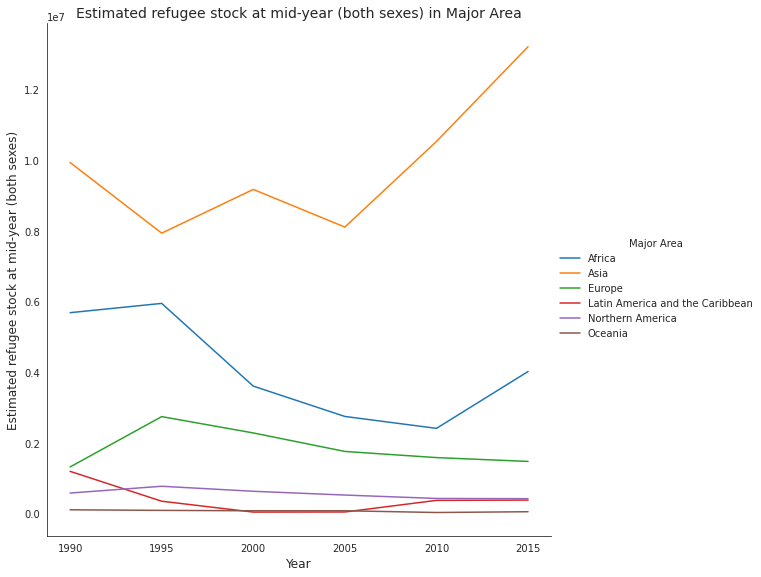

In [534]:
#Seaborn line graph -- Estimated refugee stock at mid-year (both sexes) in major area

sns.relplot(data=tidy_both_area66, x="Year", y="Estimated refugee stock at mid-year (both sexes)", hue="Major Area", kind="line", height=8)


plt.xlabel('Year', fontsize=12);
plt.ylabel('Estimated refugee stock at mid-year (both sexes)', fontsize=12);
plt.title('Estimated refugee stock at mid-year (both sexes) in Major Area', fontsize=14)

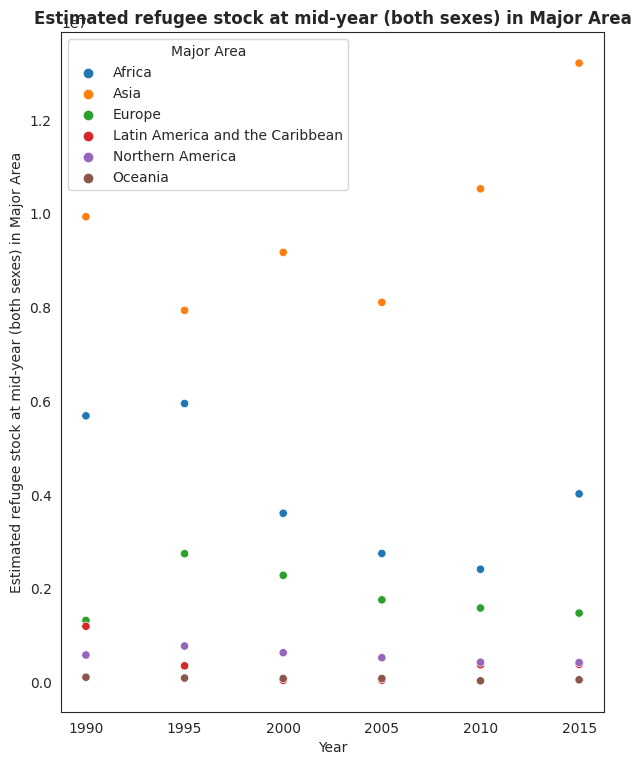

In [535]:
#Seaborn scatterplot graph -- Estimated refugee stock at mid-year (both sexes) in Major Area
f33sex, ax = plt.subplots(figsize=(7,9),dpi=100)
ax.set_title('Estimated refugee stock at mid-year (both sexes) in Major Area',fontweight="bold")
ax.set_ylabel('Estimated refugee stock at mid-year (both sexes) in Major Area')
sns.scatterplot(y="Estimated refugee stock at mid-year (both sexes)",x="Year", hue = "Major Area", data=tidy_both_area66)

Text(0.5, 1.0, 'Estimated refugee stock at mid-year (both sexes) in Major Area')

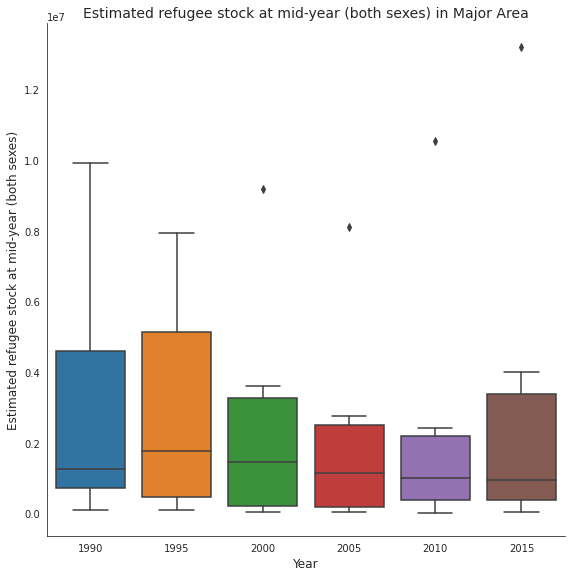

In [536]:
#Box plot for Estimated refugee stock at mid-year (both sexes) in Major Area
sns.catplot(data=tidy_both_area66, kind="box", x="Year", y="Estimated refugee stock at mid-year (both sexes)", height=8)
plt.xlabel('Year', fontsize=12);
plt.ylabel('Estimated refugee stock at mid-year (both sexes)', fontsize=12);
plt.title('Estimated refugee stock at mid-year (both sexes) in Major Area', fontsize=14)


In [537]:
#histogram -- Estimated refugee stock at mid-year (both sexes) in Major Area
import plotly.express as px

fig = px.histogram(tidy_both_area66, x="Year", y="Estimated refugee stock at mid-year (both sexes)",
                    facet_col="Major Area", color_discrete_sequence=["orange"],
       facet_col_wrap=3, width=1000, height=950,
       title="Estimated refugee stock at mid-year (both sexes) in Major Area")


fig.show()

In [538]:
#apply Tufte's principle, the background is blue and we want to use least ink possible- minimalistic, so we change the background color 
#styling the fig
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')

fig.show()

In [539]:
tidy_both_region66.head()

Region Notes Country Code  Year  \
1   Eastern Africa   NaN          910  1990   
2    Middle Africa   NaN          911  1990   
3  Northern Africa   NaN          912  1990   
4  Southern Africa   NaN          913  1990   
5   Western Africa   NaN          914  1990   

  Estimated refugee stock at mid-year (both sexes)  
1                                          3168001  
2                                           446609  
3                                          1202360  
4                                           135525  
5                                           734857

In [540]:
#create a new table that shows the top 5 regions with most Estimated refugee stock at mid-year (both sexes) from 1990-2015
dtemp=tidy_both_region66.sort_values(by='Estimated refugee stock at mid-year (both sexes)', ascending=False)

data1=dtemp[dtemp.Year=="1990"].head(5)
data1=data1.append(dtemp[dtemp.Year=="1995"].head(5))
data1=data1.append(dtemp[dtemp.Year=="2000"].head(5))
data1=data1.append(dtemp[dtemp.Year=="2005"].head(5))
data1=data1.append(dtemp[dtemp.Year=="2010"].head(5))
data1=data1.append(dtemp[dtemp.Year=="2015"].head(5))

tidy_gender_r6=re_index(data1)

tidy_gender_r6.rename(columns={"Estimated refugee stock at mid-year (both sexes)": "Estimated refugee stock"},inplace=True)
tidy_gender_r6.head()

Region Notes Country Code  Year Estimated refugee stock
1    Southern Asia   NaN         5501  1990                 6906630
2   Eastern Africa   NaN          910  1990                 3168001
3     Western Asia   NaN          922  1990                 2566871
4  Northern Africa   NaN          912  1990                 1202360
5  Central America   NaN          916  1990                 1162216

In [541]:
#Histogram of top 5 regions with most estimated refugee stock from 1990-2015
import plotly.express as px

fig= px.histogram(tidy_gender_r6, x="Year", y="Estimated refugee stock", barmode="group", facet_col="Region",
       facet_col_wrap=4, width=900, height=950, color_discrete_sequence=["orange"],
       title="Regions with most estimated refugee stock from 1990-2015")

fig.show()

In [542]:
#apply Tufte's principle, the background is blue and we want to use least ink possible- minimalistic, so we change the background color 
#styling the fig
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
#tufte's principle, redundent names"region"
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

Refugee-Country

In [543]:
tidy_both_country66.head(10)

Country Notes Country Code Type of data(a)  Year  \
1      Burundi   NaN          108             B R  1990   
2      Comoros   NaN          174               B  1990   
3     Djibouti   NaN          262             B R  1990   
4      Eritrea   NaN          232               I  1990   
5     Ethiopia   NaN          231             B R  1990   
6        Kenya   NaN          404             B R  1990   
7   Madagascar   NaN          450               C  1990   
8       Malawi   NaN          454             B R  1990   
9    Mauritius   (1)          480               C  1990   
10     Mayotte   NaN          175               B  1990   

   Estimated refugee stock at mid-year (both sexes)  
1                                            267929  
2                                                 0  
3                                             54508  
4                                                 0  
5                                            741965  
6                                             13452  
7                                                 0  
8                                            874614  
9                                                 0  
10                                                0

In [544]:
#create a new table that shows the top 8 countries with most Estimated refugee stock at mid-year (both sexes) from 1990-2015
dtemp=tidy_both_country66.sort_values(by='Estimated refugee stock at mid-year (both sexes)', ascending=False)

data1=dtemp[dtemp.Year=="1990"].head(8)
data1=data1.append(dtemp[dtemp.Year=="1995"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2000"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2005"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2010"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2015"].head(8))

tidy_gender_c6=re_index(data1)

tidy_gender_c6.rename(columns={"Estimated refugee stock at mid-year (both sexes)": "Estimated refugee stock"},inplace=True)
tidy_gender_c6.head()

Country Notes Country Code Type of data(a)  Year  \
1  Iran (Islamic Republic of)   NaN          364             B R  1990   
2                    Pakistan   NaN          586             B R  1990   
3                       Sudan   (3)          729             B R  1990   
4                      Jordan   NaN          400             C R  1990   
5          State of Palestine  (12)          275               B  1990   

  Estimated refugee stock  
1                 3512201  
2                 3265845  
3                 1031050  
4                  929482  
5                  910637

In [545]:
#Seaborn-Small Multiple line chart-- top 8 Countries with highest Estimated refugee stock from 1990-2015 from 1990-2015 (both sexes)
import plotly.express as px

fig = px.line(tidy_gender_c6, x="Year", y="Estimated refugee stock",facet_col="Country", facet_col_wrap=4,
              height=850, width=1200,
              title="Countries with highest Estimated refugee stock from 1990-2015")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()

In [546]:
#apply Tufte's principle, the background is blue and we want to use least ink possible- minimalistic, so we change the background color 
#styling the fig
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')

fig.show()

##Refugee as percentage of international migrant stock

In [547]:
tidy_pst_area66.head()

Major Area Notes Country Code  Year  \
1                           Africa   NaN          903  1990   
2                             Asia   NaN          935  1990   
3                           Europe   NaN          908  1990   
4  Latin America and the Caribbean   NaN          904  1990   
5                 Northern America   NaN          905  1990   

  Refugees as a percentage of the international migrant stock  
1                                          36.246821           
2                                          20.640923           
3                                           2.685708           
4                                          16.697956           
5                                           2.113142

Text(0.5, 1.0, 'Refugees as a percentage of the international migrant stock')

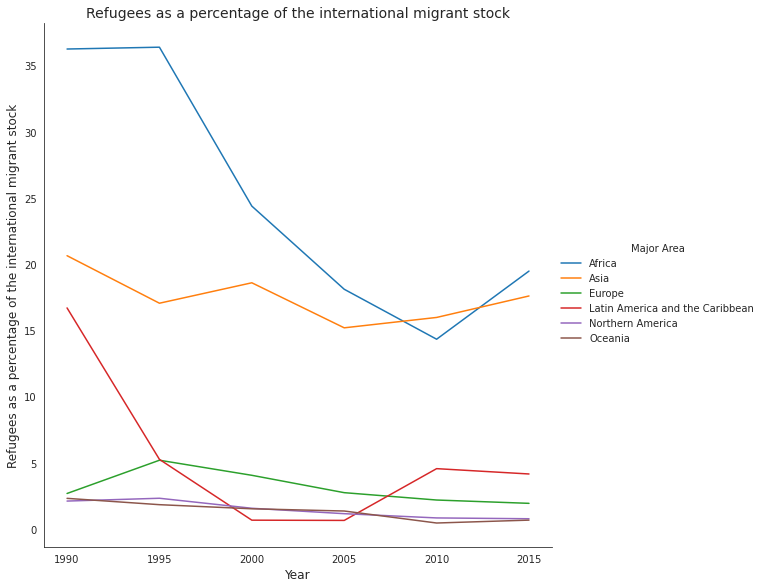

In [548]:
#Seaborn line graph -- Refugees as a percentage of the international migrant stock in major area

sns.relplot(data=tidy_pst_area66, x="Year", y="Refugees as a percentage of the international migrant stock", hue="Major Area", kind="line", height=8)


plt.xlabel('Year', fontsize=12);
plt.ylabel('Refugees as a percentage of the international migrant stock', fontsize=12);
plt.title('Refugees as a percentage of the international migrant stock', fontsize=14)

Text(0.5, 1.0, 'Refugees as a percentage of the international migrant stock in Major Area')

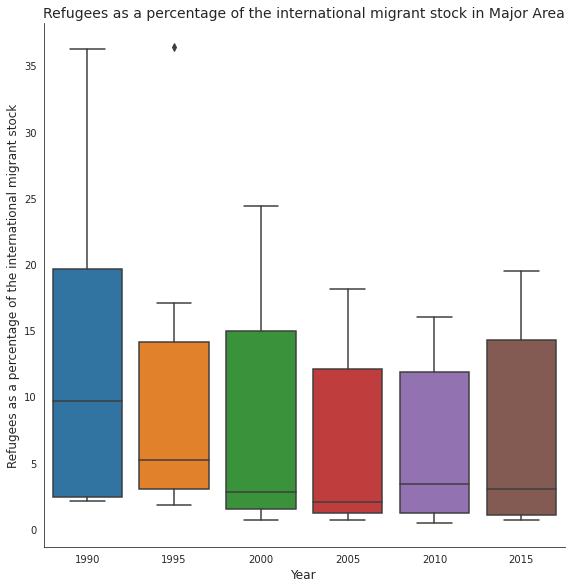

In [549]:
#Box plot for Refugees as a percentage of the international migrant stock in Major Area
sns.catplot(data=tidy_pst_area66, kind="box", x="Year", y="Refugees as a percentage of the international migrant stock", height=8)
plt.xlabel('Year', fontsize=12);
plt.ylabel('Refugees as a percentage of the international migrant stock', fontsize=12);
plt.title('Refugees as a percentage of the international migrant stock in Major Area', fontsize=14)

In [550]:
tidy_pst_area66.rename(columns={"Refugees as a percentage of the international migrant stock": "Refugees %"},inplace=True)
tidy_pst_area66.head()

Major Area Notes Country Code  Year Refugees %
1                           Africa   NaN          903  1990  36.246821
2                             Asia   NaN          935  1990  20.640923
3                           Europe   NaN          908  1990   2.685708
4  Latin America and the Caribbean   NaN          904  1990  16.697956
5                 Northern America   NaN          905  1990   2.113142

In [551]:
#histogram -- Refugees as a percentage of the international migrant stock in Major Area
import plotly.express as px

fig = px.histogram(tidy_pst_area66, x="Year", y="Refugees %",
                    facet_col="Major Area", color_discrete_sequence=["orange"],
       facet_col_wrap=3, width=1000, height=950,
       title="Refugees as a percentage of the international migrant stock")


fig.show()

In [552]:
#apply Tufte's principle, the background is blue and we want to use least ink possible- minimalistic, so we change the background color 
#styling the fig
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
#tufte's principle, redundent names"region"
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()

In [553]:
tidy6_pst_region.head()

Region Notes Country Code  Year  \
1   Eastern Africa   NaN          910  1990   
2    Middle Africa   NaN          911  1990   
3  Northern Africa   NaN          912  1990   
4  Southern Africa   NaN          913  1990   
5   Western Africa   NaN          914  1990   

  Refugees as a percentage of the international migrant stock  
1                                          53.118453           
2                                          30.578557           
3                                          50.031625           
4                                           9.733481           
5                                          16.437904

In [554]:
#create a new table that shows the top 5 regions with most Estimated refugee stock at mid-year (both sexes) from 1990-2015
dtemp=tidy6_pst_region.sort_values(by='Refugees as a percentage of the international migrant stock', ascending=False)

data1=dtemp[dtemp.Year=="1990"].head(5)
data1=data1.append(dtemp[dtemp.Year=="1995"].head(5))
data1=data1.append(dtemp[dtemp.Year=="2000"].head(5))
data1=data1.append(dtemp[dtemp.Year=="2005"].head(5))
data1=data1.append(dtemp[dtemp.Year=="2010"].head(5))
data1=data1.append(dtemp[dtemp.Year=="2015"].head(5))

tidy6_pst_region=re_index(data1)

tidy6_pst_region.rename(columns={"Refugees as a percentage of the international migrant stock": "Refugees% of Total"},inplace=True)
tidy6_pst_region.head()

Region Notes Country Code  Year Refugees% of Total
1  Central America   NaN          916  1990           63.51216
2   Eastern Africa   NaN          910  1990          53.118453
3  Northern Africa   NaN          912  1990          50.031625
4    Southern Asia   NaN         5501  1990          35.534617
5    Middle Africa   NaN          911  1990          30.578557

In [570]:
#Histogram of top 5 regions with highest percentage of Refugees as a percentage of the international migrant from 1990-2015
import plotly.express as px

fig= px.histogram(tidy6_pst_region, x="Year", y="Refugees% of Total", barmode="group", facet_col="Region",
       facet_col_wrap=4, width=900, height=950, color_discrete_sequence=["orange"],
       title="Regions with highest percentage of Refugees as a percentage of the international migrant")

fig.show()

In [571]:
#apply Tufte's principle, the background is blue and we want to use least ink possible- minimalistic, so we change the background color 
#styling the fig
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
#tufte's principle, redundent names"region"
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

Country

In [557]:
tidy_pst_country66.head(10)

Country Notes Country Code Type of data(a)  Year  \
1      Burundi   NaN          108             B R  1990   
2      Comoros   NaN          174               B  1990   
3     Djibouti   NaN          262             B R  1990   
4      Eritrea   NaN          232               I  1990   
5     Ethiopia   NaN          231             B R  1990   
6        Kenya   NaN          404             B R  1990   
7   Madagascar   NaN          450               C  1990   
8       Malawi   NaN          454             B R  1990   
9    Mauritius   (1)          480               C  1990   
10     Mayotte   NaN          175               B  1990   

   Refugees as a percentage of the international migrant stock  
1                                            80.43259           
2                                                   0           
3                                           44.597901           
4                                                   0           
5                                            64.21771           
6                                            4.524844           
7                                                   0           
8                                           77.555679           
9                                                   0           
10                                                  0

In [558]:
#create a new table that shows the top 8 countries with highest percentage of Refugees as a percentage of the international migrant from 1990-2015
dtemp=tidy_pst_country66.sort_values(by='Refugees as a percentage of the international migrant stock', ascending=False)

data1=dtemp[dtemp.Year=="1990"].head(8)
data1=data1.append(dtemp[dtemp.Year=="1995"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2000"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2005"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2010"].head(8))
data1=data1.append(dtemp[dtemp.Year=="2015"].head(8))

tidy__c6=re_index(data1)

tidy__c6.rename(columns={"Refugees as a percentage of the international migrant stock": "Refugees% of Total"},inplace=True)
tidy__c6.head()

Country Notes Country Code Type of data(a)  Year  \
1  State of Palestine  (12)          275               B  1990   
2              Belize   NaN           84            B R   1990   
3             Somalia   NaN          706             I R  1990   
4            Honduras   NaN          340             B R  1990   
5           Guatemala   NaN          320             B R  1990   

  Refugees% of Total  
1         315.829322  
2                100  
3          96.175156  
4          87.693724  
5          84.477989

In [559]:
#Seaborn-Small Multiple line chart-- top 8 Countries with highest Estimated refugee stock from 1990-2015 from 1990-2015 (both sexes)
import plotly.express as px

fig = px.line(tidy__c6, x="Year", y="Refugees% of Total",facet_col="Country", facet_col_wrap=4,
              height=850, width=1200,
              title="countries with highest percentage of Refugees as a percentage of the international migrant from 1990-2015")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()

##Annual rate of change of the refugee stock

In [560]:
tidy_rate_area66.head()

Major Area Notes Country Code       Year  \
1                           Africa   NaN          903  1990-1995   
2                             Asia   NaN          935  1990-1995   
3                           Europe   NaN          908  1990-1995   
4  Latin America and the Caribbean   NaN          904  1990-1995   
5                 Northern America   NaN          905  1990-1995   

  Annual rate of change of the refugee stock  
1                                   0.076037  
2                                  -3.819461  
3                                    13.2017  
4                                 -23.096408  
5                                   1.917003

Text(0.5, 1.0, 'Annual rate of change of the refugee stock in Major Area')

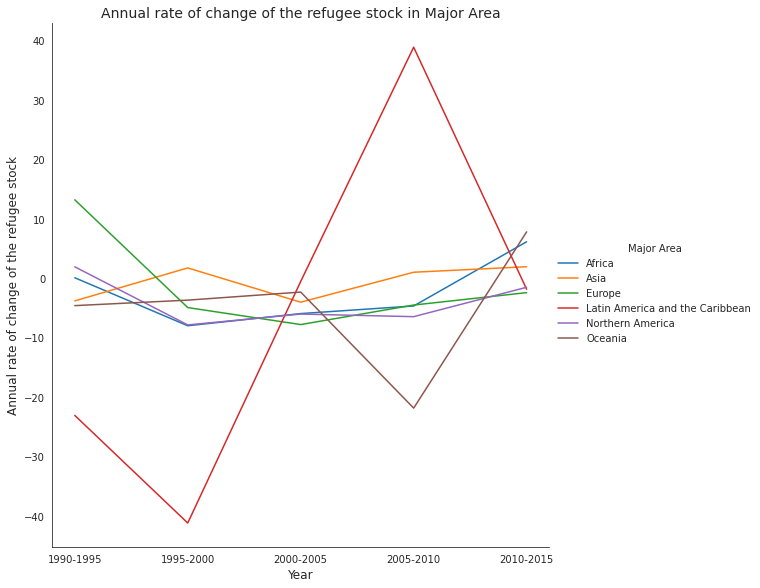

In [561]:
#Seaborn line graph -- Annual rate of change of the refugee stock in major area

sns.relplot(data=tidy_rate_area66, x="Year", y="Annual rate of change of the refugee stock", hue="Major Area", kind="line", height=8)


plt.xlabel('Year', fontsize=12);
plt.ylabel('Annual rate of change of the refugee stock', fontsize=12);
plt.title('Annual rate of change of the refugee stock in Major Area', fontsize=14)


Text(0.5, 1.0, 'Annual rate of change of the refugee stock in Major Area')

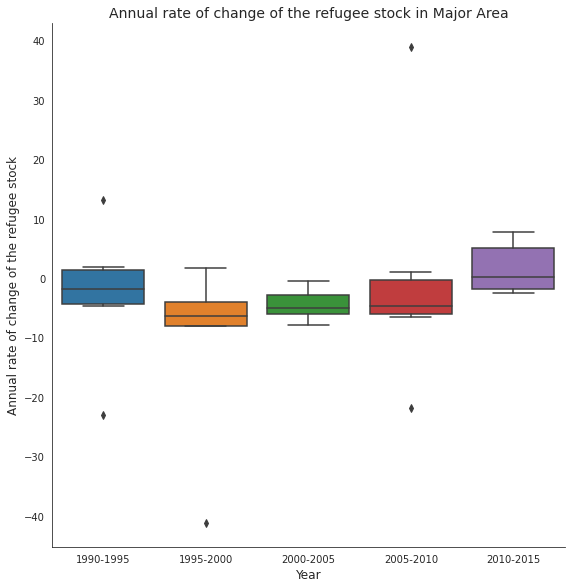

In [562]:
#Box plot for Annual rate of change of the refugee stock in Major Area
sns.catplot(data=tidy_rate_area66, kind="box", x="Year", y="Annual rate of change of the refugee stock", height=8)
plt.xlabel('Year', fontsize=12);
plt.ylabel('Annual rate of change of the refugee stock', fontsize=12);
plt.title('Annual rate of change of the refugee stock in Major Area', fontsize=14)

In [563]:
#histogram -- Annual rate of change of the refugee stock in Major Area
import plotly.express as px

fig = px.histogram(tidy_rate_area66, x="Year", y="Annual rate of change of the refugee stock",
                    facet_col="Major Area", color_discrete_sequence=["orange"],
       facet_col_wrap=3, width=1000, height=950,
       title="Annual rate of change of the refugee stock in Major Area")


fig.show()

In [564]:
#apply Tufte's principle, the background is blue and we want to use least ink possible- minimalistic, so we change the background color 
#styling the fig
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')

fig.show()

Region

In [565]:
tidy_rate_region66.head()

Region Notes Country Code       Year  \
1   Eastern Africa   NaN          910  1990-1995   
2    Middle Africa   NaN          911  1990-1995   
3  Northern Africa   NaN          912  1990-1995   
4  Southern Africa   NaN          913  1990-1995   
5   Western Africa   NaN          914  1990-1995   

  Annual rate of change of the refugee stock  
1                                   -5.30801  
2                                  12.964162  
3                                  -3.456178  
4                                  -1.954547  
5                                   8.717581

In [566]:
#create a new table that shows the top 5 regions with highest positive annual rate of change the refugee stock from 1990-2015
dtemp=tidy_rate_region66.sort_values(by='Annual rate of change of the refugee stock', ascending=False)

data1=dtemp[dtemp.Year=="1990-1995"].head(5)
data1=data1.append(dtemp[dtemp.Year=="1995-2000"].head(5))
data1=data1.append(dtemp[dtemp.Year=="2000-2005"].head(5))
data1=data1.append(dtemp[dtemp.Year=="2005-2010"].head(5))
data1=data1.append(dtemp[dtemp.Year=="2010-2015"].head(5))

tidy_ar6=re_index(data1)

tidy_ar6.head()

Region Notes Country Code       Year  \
1     Central Asia   NaN         5500  1990-1995   
2  Southern Europe   NaN          925  1990-1995   
3    Middle Africa   NaN          911  1990-1995   
4  Northern Europe   NaN          924  1990-1995   
5   Western Africa   NaN          914  1990-1995   

  Annual rate of change of the refugee stock  
1                                  54.559526  
2                                  53.352024  
3                                  12.964162  
4                                  10.016359  
5                                   8.717581

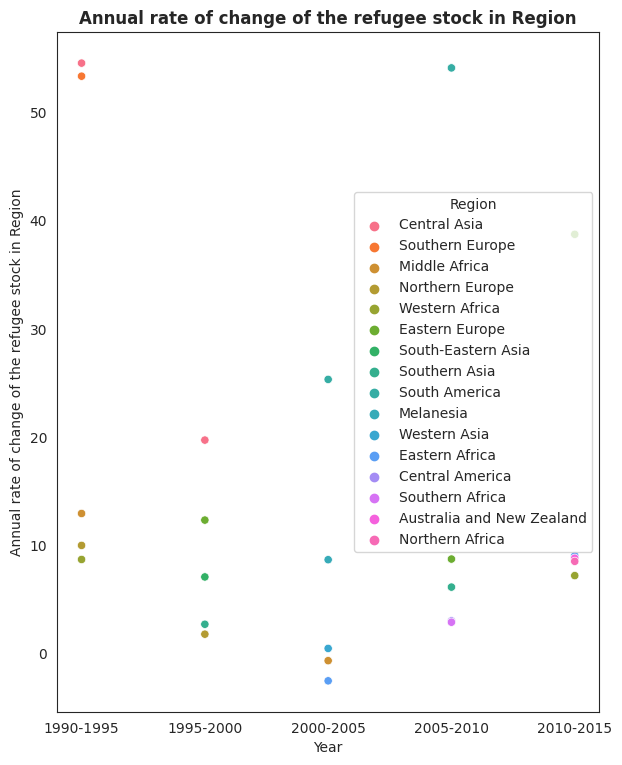

In [567]:
#Seaborn scatterplot graph -- Estimated refugee stock at mid-year (both sexes) in Major Area
f66r, ax = plt.subplots(figsize=(7,9),dpi=100)
ax.set_title('Annual rate of change of the refugee stock in Region',fontweight="bold")
ax.set_ylabel('Annual rate of change of the refugee stock in Region')
sns.scatterplot(y="Annual rate of change of the refugee stock",x="Year", hue = "Region", data=tidy_ar6)

In [568]:
#Histogram of top 5 regions with the highest positive annual rate of change of the refugee stock for both male and female
import plotly.express as px

fig= px.histogram(tidy_ar6, x="Year", y="Annual rate of change of the refugee stock", barmode="group", facet_col="Region",
       facet_col_wrap=6, width=1200, height=1200, color_discrete_sequence=["yellow", "green"],
       title="Regions with the highest positive annual rate of change of the refugee stock for both male and female")

fig.show()

In [569]:
#apply Tufte's principle, the background is blue and we want to use least ink possible- minimalistic, so we change the background color 
#styling the fig
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    linecolor='black')
#tufte's principle, redundent names"region"
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()